Text(0, 0.5, '$F_{xy}$')

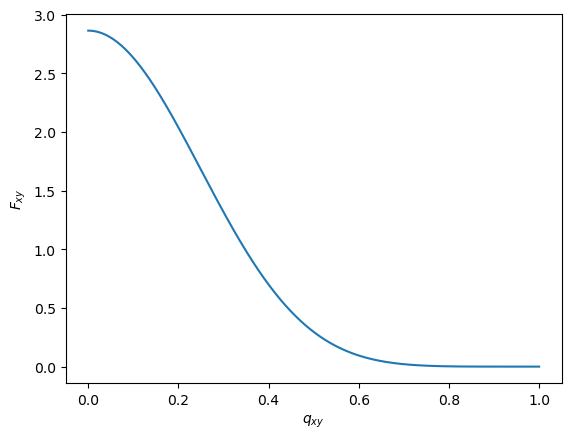

In [1]:
from cProfile import label
import numpy as np
import h5py
import matplotlib.pyplot as plt
import astropy
from astropy.io import ascii
import astropy.units as u
from matplotlib import units
from numpy import histogram2d
import matplotlib.colors as colors
import bisect
import math
from math import sin, cos, tan, atan
import time
import warnings
import sys
import os
from numpy import array, sqrt, sin, cos, tan
##################################
me = 9.1*10**-28
mH = 1.67*10**-24
solartog = 2.0*10**33
MpcTocm = 3.08567758*10**24
def M6(r,r0, h, D):
    import numpy as np
    from numpy import pi, sqrt, exp
    ##########D = dimension#######
    ##########h = smoothing length########
    d = np.sqrt((r-r0)**2)
    q = d/h
    V = [2.0, 2*pi*d, 4*pi*d**2]
    sigma = np.array([1.0/120*3, 7.0/(478.0*np.pi)*3**2, 1.0/(120*np.pi)*3**3])
    if q >= 0 and q < 1.0/3:
        w = (3.0)**5*(1.0 - q)**5 - 6*(3.0)**5*(2.0/3-q)**5+15*(3)**5*(1.0/3-q)**5
    elif q >= 1.0/3 and q < 2.0/3:
        w = (3.0)**5*(1.0 - q)**5 - 6*(3.0)**5*(2.0/3-q)**5
    elif q >= 2.0/3 and q < 1.0:
        w = (3.0)**5*(1.0 - q)**5
    else:
        w = 0
    W =  h**(-D)*sigma[D-1]*w
    return W



def W(qz,qxy,D):
    import numpy as np
    from numpy import pi, sqrt, exp
    ##########D = dimension#######
    ##########h = smoothing length########
    q = np.sqrt(qxy**2 + qz**2)
    sigma = np.array([1.0/120*3, 7.0/(478.0*np.pi)*3**2, 1.0/(120*np.pi)*3**3])
    if q >= 0 and q < 1.0/3:
        w = (3.0)**5*(1.0 - q)**5 - 6*(3.0)**5*(2.0/3-q)**5+15*(3)**5*(1.0/3-q)**5
    elif q >= 1.0/3 and q < 2.0/3:
        w = (3.0)**5*(1.0 - q)**5 - 6*(3.0)**5*(2.0/3-q)**5
    elif q >= 2.0/3 and q < 1.0:
        w = (3.0)**5*(1.0 - q)**5
    else:
        w = 0
    W =  sigma[D-1]*w
    return W

    

def Gauss(r, r0, h, D):
    from numpy import pi, sqrt, exp 
    d = sqrt((r-r0)**2)
    V = [2.0, 2*pi*d, 4*pi*d**2]
    sigma = [1/sqrt(pi), 1/pi, 1.0/(pi*sqrt(pi))]
    W = h**(-D)*sigma[D-1]*exp(-(r-r0)**2/h**2)
    W = W*V[D-1]
    return W



def F(qxy):
    from scipy import integrate
    v ,err = integrate.quad(W,  -np.sqrt(1-qxy**2), np.sqrt(1-qxy**2), args = (qxy,3))
    return v
qxy =np.linspace(0, 1, 1000)
Fxy = np.array(list(map(F, qxy)))

def F_xy(q):
    qxy =np.linspace(0, 1, 1000)
    q_xy = bisect.bisect(qxy, q) - 1 
    W = Fxy[q_xy]
    return W
plt.plot(qxy,Fxy)
plt.xlabel(r"$q_{xy}$")
plt.ylabel(r"$F_{xy}$")


In [ ]:

r = np.linspace(0, 20, 100)
MM = np.zeros(len(r))
for i in range(len(r)): 
    MM[i] = M6(r[i], 0.0, 1.5, 3)
plt.plot(r , MM)

print(M6(0,0,2,3))


In [2]:
#Omega_m = 0.3098
#Omega_Lamda = 0.6911
#Omega_b = 0.04560
#Y_H = 0.752
#Y_He = 0.248
from astropy.cosmology import Planck18 as cosmo
H0 = cosmo.H0
from astropy.constants import G, c, m_e, m_p
#print(H_mass_frac, He_mass_frac)
#c = 2.998*10**10     
#me = 9.109*10**(-28)
#mp = 1.67262192369*10**(-24)
f_IGM =  0.65
#DM = 3*c*H0*Omega_b*f_IGM/(8*np.pi*G*m_p)

In [4]:
#DM.to(u.pc/u.cm**3)
def O(z):
    W = 1/np.sqrt(Omega_0*(1+z)**3+Omega_Lamda)
    return W

def dc(z):
    from scipy import integrate
    v ,err = (c/H0).to(u.Mpc)*integrate.quad(O, 0, z)
    return v
dc(2)

UnitConversionError: 'Mpc s / km' (time) and 'Mpc' (length) are not convertible

In [3]:
import numpy as np
from scipy.integrate import quad
# 宇宙学参数
Omega_m = 0.31  # 物质密度参数
Omega_Lambda = 0.69  # 暗能量密度参数
H_0 = 67.66  # 哈勃常数，单位为 km/s/Mpc
c = 299792.458  # 光速，单位为 km/s

# 计算共动距离和尺度因子的函数
def comoving_distance(z):
    integrand = lambda zp: 1.0 / np.sqrt(Omega_m * (1.0+zp)**3 + Omega_Lambda)
    integral, _ = quad(integrand, 0, z)
    return c/H_0 * integral

def scale_factor(z):
    return 1.0 / (1.0 + z)

# 红移范围
z_arr = np.linspace(0, 2, 101)

# 计算共动距离和尺度因子
dC_arr = np.array([comoving_distance(z) for z in z_arr])
a_arr = np.array([scale_factor(z) for z in z_arr])

# 打印表格
print("z\t a\t        dC (Mpc)")
for i in range(len(z_arr)):
    print("{:.2f}\t{:.6f}\t{:.6f}".format(z_arr[i], a_arr[i], dC_arr[i]))

z	 a	        dC (Mpc)
0.00	1.000000	0.000000
0.02	0.980392	88.203649
0.04	0.961538	175.573785
0.06	0.943396	262.101975
0.08	0.925926	347.780799
0.10	0.909091	432.603839
0.12	0.892857	516.565660
0.14	0.877193	599.661787
0.16	0.862069	681.888683
0.18	0.847458	763.243719
0.20	0.833333	843.725146
0.22	0.819672	923.332062
0.24	0.806452	1002.064383
0.26	0.793651	1079.922800
0.28	0.781250	1156.908751
0.30	0.769231	1233.024381
0.32	0.757576	1308.272504
0.34	0.746269	1382.656571
0.36	0.735294	1456.180624
0.38	0.724638	1528.849268
0.40	0.714286	1600.667630
0.42	0.704225	1671.641323
0.44	0.694444	1741.776412
0.46	0.684932	1811.079378
0.48	0.675676	1879.557089
0.50	0.666667	1947.216762
0.52	0.657895	2014.065935
0.54	0.649351	2080.112438
0.56	0.641026	2145.364360
0.58	0.632911	2209.830027
0.60	0.625000	2273.517972
0.62	0.617284	2336.436911
0.64	0.609756	2398.595719
0.66	0.602410	2460.003410
0.68	0.595238	2520.669112
0.70	0.588235	2580.602049
0.72	0.581395	2639.811525
0.74	0.574713	2698.306902
0.76	

In [4]:
import numpy as np
from scipy.optimize import root_scalar

# 宇宙学参数
Omega_m = 0.31  # 物质密度参数
Omega_Lambda = 0.69  # 暗能量密度参数
H_0 = 67.66  # 哈勃常数，单位为 km/s/Mpc
c = 299792.458  # 光速，单位为 km/s

# 计算共动距离和尺度因子的函数
def comoving_distance(z):
    integrand = lambda zp: 1.0 / np.sqrt(Omega_m * (1.0+zp)**3 + Omega_Lambda)
    integral, _ = quad(integrand, 0, z)
    return c/H_0 * integral

def scale_factor(z):
    return 1.0 / (1.0 + z)

# 已知共动距离，求红移和尺度因子的函数
def find_redshift_and_scale_factor(dC):
    # 定义被求解的方程
    equation = lambda z: comoving_distance(z) - dC

    # 使用root_scalar函数求解方程
    sol = root_scalar(equation, bracket=[0, 10])

    # 检查解是否收敛，如果不收敛则返回None
    if not sol.converged:
        return None, None

    # 返回红移和尺度因子
    z = sol.root
    a = scale_factor(z)
    return z, a

# 假设共动距离为5330 Mpc
dC = 5330

# 求解红移和尺度因子
z, a = find_redshift_and_scale_factor(dC)

# 打印结果
if z is None:
    print("无法求解红移和尺度因子。")
else:
    print("共动距离 dC = {:.2f} Mpc 对应的红移为 z = {:.4f}，尺度因子为 a = {:.4f}".format(dC, z, a))

共动距离 dC = 5330.00 Mpc 对应的红移为 z = 2.0111，尺度因子为 a = 0.3321


In [ ]:
#######################旋转box##################
import numpy as np
from scipy.spatial.transform import Rotation

# 定义box的参数
bin_num = 100  # 每个方向上的bin数
box_size = 70  # 尺度大小，单位为Mpc

# 生成三个随机box
box1 = np.random.rand(bin_num, bin_num, bin_num)
box2 = np.random.rand(bin_num, bin_num, bin_num)
box3 = np.random.rand(bin_num, bin_num, bin_num)

# 将三个box旋转
rotations = [Rotation.random() for _ in range(3)]
box1_rotated = rotations[0].apply(box1)
box2_rotated = rotations[1].apply(box2)
box3_rotated = rotations[2].apply(box3)

# 将三个box拼接在一起
combined_box = np.concatenate((box1_rotated, box2_rotated, box3_rotated), axis=0)

# 验证拼接后的box的bin数和尺度大小是否与单个box相同
assert combined_box.shape == (3*bin_num, bin_num, bin_num)
assert np.isclose(combined_box.size**(1/3), box_size*3, rtol=1e-3)



In [ ]:
    NHII = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights= data[i]["n_HII"])[0]
    NHI = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=data[i]["n_HI"])[0]
    Ne = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=data[i]["n_e"])[0]
    NDI = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=data[i]["n_DI"])[0]
    NDII = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=data[i]["n_DII"])[0]
    NHeI = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=data[i]["n_HeI"])[0]
    NHeII = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=data[i]["n_HeII"])[0]
    NHeIII = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=data[i]["n_HeIII"])[0] 
    NH2I = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=data[i]["n_H2I"])[0]  
    NH2II = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=data[i]["n_H2II"])[0]   

In [ ]:
cosmo.luminosity_distance(0.017).to(u.Mpc).value
Ybins = np.linspace(min(data[i]["sphY"]), max(data[i]["sphY"]), 30)
z = np.linspace(0, 0.017, 30)

for i in range(len(snapfile)):
    NT = np.histogram(data[i]["sphY"], bins=Ybins,
                      weights=data[i]["u"] * u2t)[0]
    N = np.histogram(data[i]["sphlogr"], bins=Xbins)[0]
    profile[i]["temperature"] = NT / N


In [ ]:
from scipy import integrate
v ,err = integrate.quad(M6,  0.0, 10, args = (0.0,1.0,3))
print(v)



start reading data of /home/zhaozhang/local/work/L50N256/snapshot_020/snapshot_020...
This is cosmological run. Scaling code values to physical value.
a = 0.9999999999999996, h = 0.67742
Mass table: [0.         0.05398037 0.         0.         0.         0.        ]
Total number of particles: [16564032 16777216        0        0  1291761        0]

reading 0th file.
Number of particles in this file: [1264265 1227484       0       0   82460       0]
loading rho.
	multipling by a^-3.0 h^2.0 to get physical value
loading u.
	multipling by a^0.0 h^0.0 to get physical value
loading sphpos.
	multipling by a^1.0 h^-1.0 to get physical value
loading sphpos
loading dmpos.
	multipling by a^1.0 h^-1.0 to get physical value
loading dmpos
loading starpos.
	multipling by a^1.0 h^-1.0 to get physical value
loading starpos
loading smoothlen.
	multipling by a^1.0 h^-1.0 to get physical value
loading T.
	multipling by a^0 h^-0 to get physical value
loading sphmass.
	multipling by a^0 h^-1 to get physic

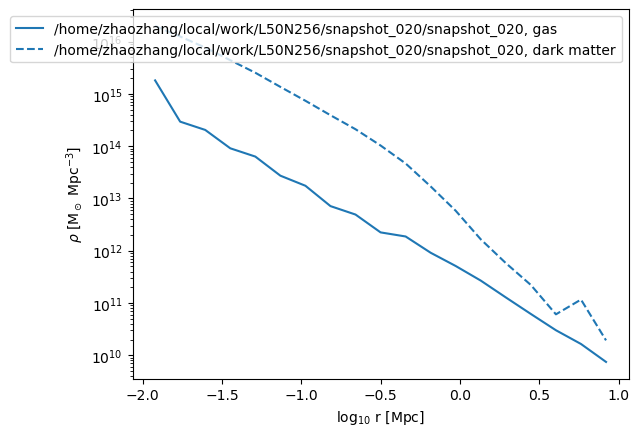

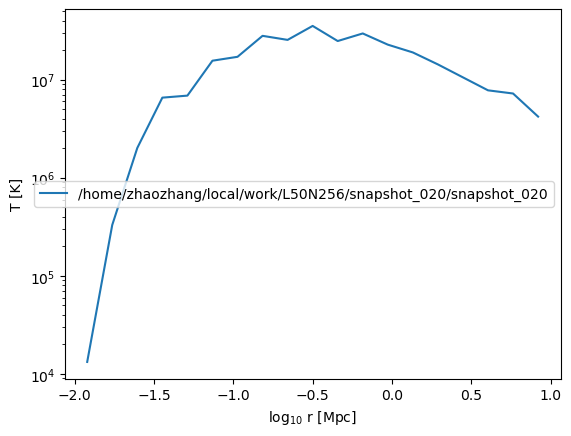

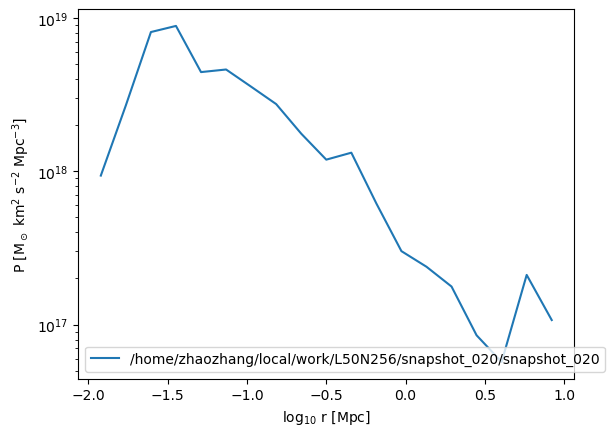

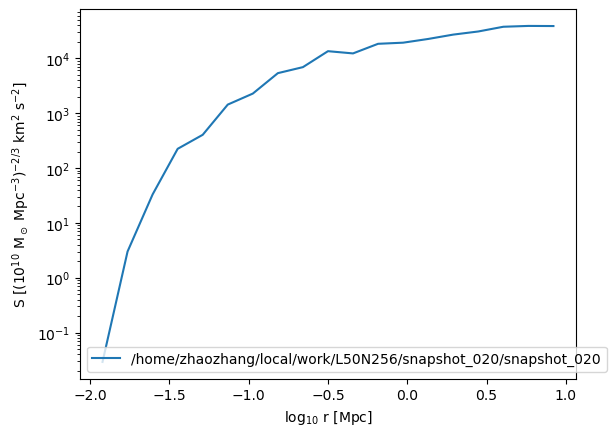

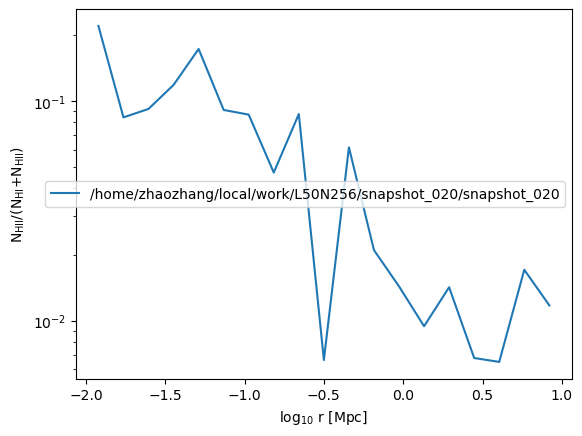

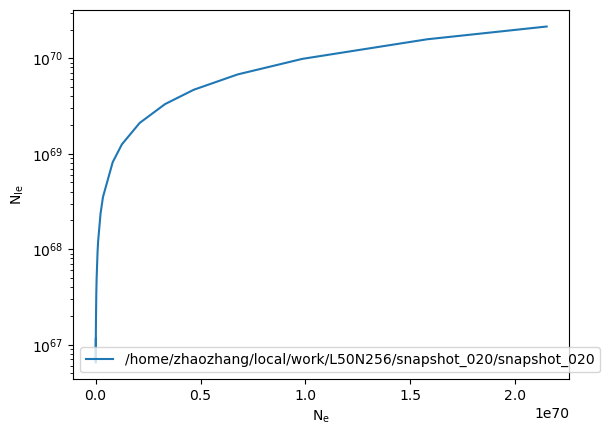

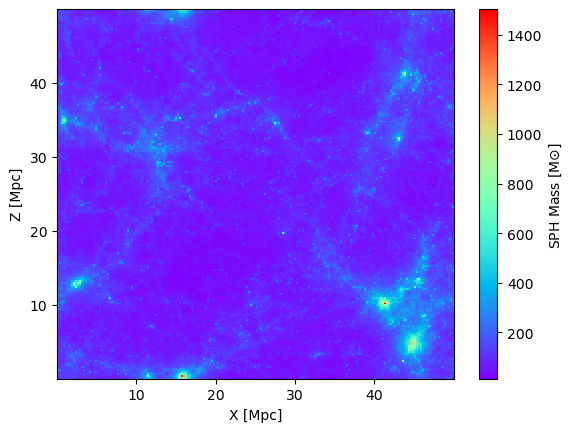

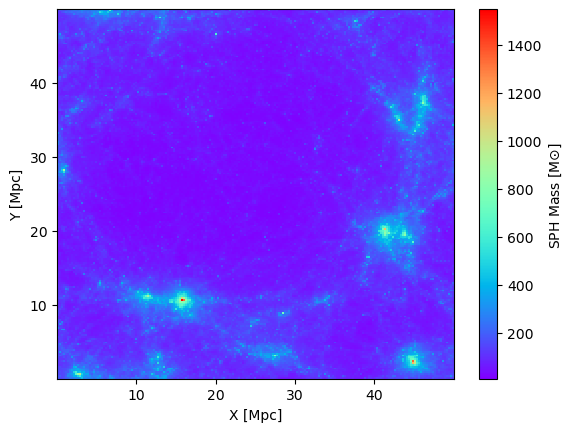

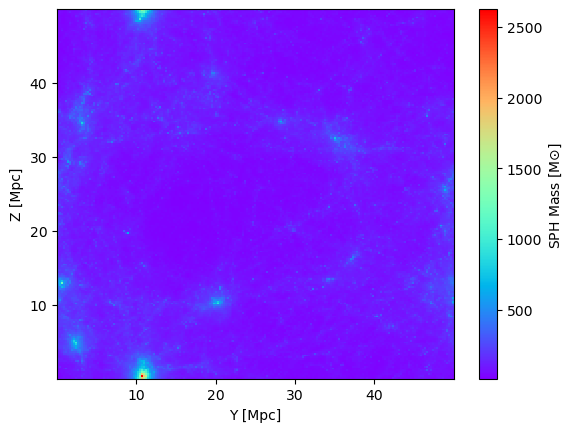

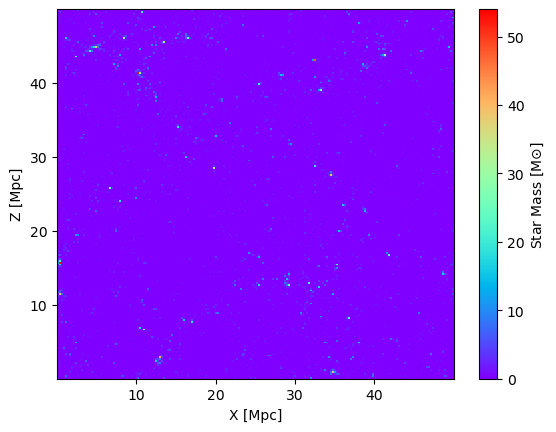

In [5]:
###############################L50
# sim name, snapshot file, FoF file.
snapfile = [["/home/zhaozhang/local/work/L50N256/snapshot_020/snapshot_020","/home/zhaozhang/local/work/L50N256/snapshot_020/groups_020/sub_020"]]
# set alias name
alias_snap = {
    "rho": "PartType0/Density",
    "u": "PartType0/InternalEnergy",
    "sphpos": "PartType0/Coordinates",
    "dmpos": "PartType1/Coordinates",
    "starpos": "PartType4/Coordinates",
    "smoothlen": "PartType0/SmoothingLength"
}

alias_frac = {    
    "n_HI": "PartType0/HI",
    "n_HII": "PartType0/HII",
    'n_DI': "PartType0/DI",
    'n_DII': "PartType0/DII",
    "n_e": "PartType0/ElectronAbundance",
    "n_HeI": "PartType0/HeI",
    "n_HeII": "PartType0/HeII",
    "n_HeIII": "PartType0/HeIII",
    "n_H2I": "PartType0/H2I",
    "n_H2II": "PartType0/H2II",
    
 }

alias_T = {
     "T": "PartType0/Temperature"
}  

alias_mass = {
    "sphmass": 0,
    "dmmass": 1,
    "starmass": 4
}
alias_fof = {
    "halomass": "Group/GroupMass",
    "halopos": "Group/GroupPos",
    "halonum": "Group/GroupNsubs",
    "halo0": "Group/GroupFirstSub",
    "halolen": "Group/GroupLen",
    "haloRV" : "Group/Group_R_Crit200",
    "haloMV": "Group/Group_M_Crit200"
}


alias_subfind = {
    "subhalopos": "Subhalo//SubhaloPos",
    "subhalomass": "Subhalo/SubhaloMass",
    "subhaloGrNr": "Subhalo/SubhaloGrNr",
    "subhaloparent": "Subhalo/SubhaloParent",
    "subhalolen" : "Subhalo/SubhaloLen"
    
}

# radial bin of log(r[Mpc])
Xbins = np.linspace(-2, 1, num=20)
Xpoints = (Xbins + np.roll(Xbins, -1))[0:-1] / 2
# ----------------------------------------#
# initialization
data = [{} for i in range(len(snapfile))]
for i in range(len(snapfile)):
    for key in alias_snap.keys():
        data[i][key] = np.empty((0, 3))
    for key in alias_mass.keys():
        data[i][key] = np.empty((0, 3))
    for key in alias_frac.keys():
        data[i][key] = np.empty((0, 3))
    for key in alias_T.keys():
        data[i][key] = np.empty((0, 3))
    for key in alias_fof.keys():
        data[i][key] = np.empty((0, 3))
    for key in alias_subfind.keys():
        data[i][key] = np.empty((0, 3))


#data_sub = 
for i in range(len(snapfile)):
    print("\nstart reading data of {}...".format(snapfile[i][0]))
    try:
        fname = "{}.hdf5".format(snapfile[i][0])
        f = h5py.File(fname, "r")
    except:
        fname = "{}.0.hdf5".format(snapfile[i][0])
        f = h5py.File(fname, "r")
    # load header
    a = f["Header"].attrs["Time"]
    z0 = f["Header"].attrs["Redshift"]
    h = f["Parameters"].attrs["HubbleParam"]
    Omega_b = f["Parameters"].attrs["OmegaBaryon"]
    Omega_0 = f["Parameters"].attrs["Omega0"]
    Omega_Lamda = f["Parameters"].attrs["OmegaLambda"]
    comoving = f["Parameters"].attrs["ComovingIntegrationOn"]
    if comoving == 1:
        print("This is cosmological run. Scaling code values to physical value.")
        print("a = {}, h = {}".format(a, h))
    else:
        print("This is non-cosmological run. Setting a = h = 1.")
        a = h = 1
    MassTable = f["Header"].attrs["MassTable"]
    print("Mass table: {}".format(MassTable))
    NumPart_Total = f["Header"].attrs["NumPart_Total"]
    Boxsize = f["Header"].attrs["BoxSize"]
    print("Total number of particles: {}".format(NumPart_Total))
    nfile = f["Header"].attrs["NumFilesPerSnapshot"]
    SPHdensitytocgs = f['PartType0']['Density'].attrs['to_cgs']
    SPHmasstocgs = f['PartType0']['Masses'].attrs['to_cgs']
    f.close()
    # load particle data
    for j in range(nfile):
        if nfile == 1:
            fname = "{}.hdf5".format(snapfile[i][0])
        else:
            fname = "{}.{}.hdf5".format(snapfile[i][0], j)
        f = h5py.File(fname, "r")
        #d[i] = f
        NumPart_ThisFile = f["Header"].attrs["NumPart_ThisFile"]
        print("\nreading {}th file.".format(j))
        print("Number of particles in this file: {}".format(NumPart_ThisFile))
        for key in alias_snap.keys():
            print("loading {}.\n\tmultipling by a^{} h^{} to get physical value".format(key,f[alias_snap[key]].attrs["a_scaling"], f[alias_snap[key]].attrs["h_scaling"]))
            array = np.array(f[alias_snap[key]])
            array *= a**f[alias_snap[key]].attrs["a_scaling"]
            array *= h**f[alias_snap[key]].attrs["h_scaling"]
            if len(np.shape(array)) == 1:
                # scalar value
                data[i][key] = np.append(data[i][key], array)
            else:
                # vector value
                data[i][key] = np.vstack((data[i][key], array))
                print("loading {}".format(key))
        for key in alias_frac.keys():
            array = np.array(f[alias_frac[key]])
            if len(np.shape(array)) == 1:
                array = np.array(f[alias_frac[key]])
                # scalar value
                data[i][key] = np.append(data[i][key], array)
            else:
                # vector value
                array = np.array(f[alias_frac[key]])
                data[i][key] = np.vstack((data[i][key], array))
        for key in alias_T.keys():
            print("loading {}.\n\tmultipling by a^0 h^-0 to get physical value".format(key))
                # load particle mass from particle data
            array = np.array(f["{}".format(alias_T[key])])
            data[i][key] = np.append(data[i][key], array)

        for key in alias_mass.keys():
            print(
                "loading {}.\n\tmultipling by a^0 h^-1 to get physical value".format(key))
            if MassTable[alias_mass[key]] == 0:
                # load particle mass from particle data
                array = np.array(f["PartType{}/Masses".format(alias_mass[key])])
                array *= h**-1
                data[i][key] = np.append(data[i][key], array)
            else:
                array = np.full(
                    NumPart_ThisFile[alias_mass[key]], MassTable[alias_mass[key]])
                data[i][key] = np.append(data[i][key], array)
        f.close()
    try:
        fname = "{}.hdf5".format(snapfile[i][1])
        f = h5py.File(fname, "r")
    except:
        fname = "{}.0.hdf5".format(snapfile[i][1])
        f = h5py.File(fname, "r")
    nfile = f["Header"].attrs["NumFilesPerSnapshot"]
    f.close()
    for j in range(nfile):
        if nfile == 1:
            fname = "{}.hdf5".format(snapfile[i][1])
        else:
            fname = "{}.{}.hdf5".format(snapfile[i][1], j)
        f = h5py.File(fname, "r")
        for key in alias_fof.keys():
            array = np.array(f[alias_fof[key]])
            if len(np.shape(array)) == 1:
                # scalar value
                data[i][key] = np.append(data[i][key], array)
            else:
                # vector value
                data[i][key] = np.vstack((data[i][key], array))
        for key in alias_subfind.keys():
            array = np.array(f[alias_subfind[key]])
            if len(np.shape(array)) == 1:
                # scalar value
                data[i][key] = np.append(data[i][key], array)
            else:
                # vector value
                data[i][key] = np.vstack((data[i][key], array))
    f.close()
    data[i]["halomass"] *= h**-1
    data[i]["halopos"] *= a * h**-1
    data[i]["halolen"] *= a * h**-1
    data[i]["subhalomass"] *= h**-1
    data[i]["subhalopos"] *= a * h**-1
    data[i]["subhalolen"] *= a * h**-1

        
   
# computing radial profiles
# log radius
for i in range(len(snapfile)):
    r2 \
        = (data[i]["sphpos"].T[0] - data[i]["halopos"][0][0])**2 \
        + (data[i]["sphpos"].T[1] - data[i]["halopos"][0][1])**2\
        + (data[i]["sphpos"].T[2] - data[i]["halopos"][0][2])**2
    data[i]["sphlogr"] = np.log10(np.sqrt(r2))
    data[i]["sphX"] = data[i]["sphpos"].T[0] 
    data[i]["sphY"] = data[i]["sphpos"].T[1] 
    data[i]["sphZ"] = data[i]["sphpos"].T[2] 
    r2 \
        = (data[i]["dmpos"].T[0] - data[i]["halopos"][0][0])**2 \
        + (data[i]["dmpos"].T[1] - data[i]["halopos"][0][1])**2\
        + (data[i]["dmpos"].T[2] - data[i]["halopos"][0][2])**2
    data[i]["dmlogr"] = np.log10(np.sqrt(r2))
    data[i]["starlogr"] = np.log10(np.sqrt(r2))
    data[i]["starX"] = data[i]["starpos"].T[0] 
    data[i]["starY"] = data[i]["starpos"].T[1] 
    data[i]["starZ"] = data[i]["starpos"].T[2] 



# initialize profile dictionary
profile = [{} for i in range(len(snapfile))]
# density profile
for i in range(len(snapfile)):
    # mass in shell
    mshell = np.histogram(data[i]["sphlogr"], bins=Xbins,
                          weights=1e10 * data[i]["sphmass"])[0]
    # volume of shell
    vshell = 4/3 * np.pi * (np.power(10, Xbins))**3
    vshell = (np.roll(vshell, -1) - vshell)[0:-1]
    profile[i]["sphrho"] = mshell / vshell
    # mass in shell
    mshell = np.histogram(data[i]["dmlogr"], bins=Xbins,
                          weights=1e10 * data[i]["dmmass"])[0]
    # volume of shell
    vshell = 4/3 * np.pi * (np.power(10, Xbins))**3
    vshell = (np.roll(vshell, -1) - vshell)[0:-1]
    profile[i]["dmrho"] = mshell / vshell
# temperature profile
# conversion factor from u[km^2/s^2] to T[K]
# T[K] = (gamma - 1) * mu * mp / kB * 1e10 * u[km^2/s^2]
u2t = 2/3*0.588*1.67e-24/1.38e-16 * 1e10
for i in range(len(snapfile)):
    NT = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=data[i]["u"] * u2t)[0]
    N = np.histogram(data[i]["sphlogr"], bins=Xbins)[0]
    profile[i]["temperature"] = NT / N

for i in range(len(snapfile)):
    NT = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=data[i]["T"])[0]
    N = np.histogram(data[i]["sphlogr"], bins=Xbins)[0]
    profile[i]["temperature"] = NT / N
# pressure profile
# P[Msun km^2/s^2 / Mpc^3] = (gamma - 1) * 1e10 * rho[10^10 Msun/Mpc^3] * u[km^2/s^2]
for i in range(len(snapfile)):
    NP = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=2/3 * 1e10 * data[i]["rho"] * data[i]["u"])[0]
    N = np.histogram(data[i]["sphlogr"], bins=Xbins)[0]
    profile[i]["pressure"] = NP / N
# entropy profile
# S = (gamma - 1) * rho^(1 - gamma) * u
for i in range(len(snapfile)):
    NS = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=2/3 * data[i]["rho"]**(-2/3) * data[i]["u"])[0]
    N = np.histogram(data[i]["sphlogr"], bins=Xbins)[0]
    profile[i]["entropy"] = NS / N
# %%
#ionization fraction profile
SPHmass_o = data[i]["sphmass"]
SPHmass_cgs = SPHmass_o*SPHmasstocgs
F_e = data[i]["n_e"]
F_HI = data[i]["n_HI"]
F_HII = data[i]["n_HII"]
F_DI = data[i]["n_DI"]
F_DII = data[i]["n_DII"]
F_H2I = data[i]["n_H2I"]
F_H2II = data[i]["n_H2II"]
F_HeI = data[i]["n_HeI"]
F_HeII = data[i]["n_HeII"]
F_HeIII = data[i]["n_HeIII"]
N_e = SPHmass_cgs*F_e/mH
N_HI = SPHmass_cgs*F_HI/mH
N_HII = SPHmass_cgs*F_HII/mH
N_DI = SPHmass_cgs*F_DI/mH
N_DII = SPHmass_cgs*F_DII/mH
N_H2I = SPHmass_cgs*F_H2I/mH
N_H2II = SPHmass_cgs*F_H2II/mH
N_HeI = SPHmass_cgs*F_HeI/(4*mH)
N_HeII = SPHmass_cgs*F_HeII/(4*mH)
N_HeIII = SPHmass_cgs*F_HeIII/(4*mH)
for i in range(len(snapfile)):
    NHII = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights= N_HII)[0]
    NHI = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=N_HI)[0]
    Ne = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=N_e )[0]
    NDI = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=N_DI)[0]
    NDII = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=N_DII)[0]
    NHeI = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=N_HeI)[0]
    NHeII = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=N_HeII )[0]
    NHeIII = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=N_HeIII)[0] 
    NH2I = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=N_H2I)[0]  
    NH2II = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=N_H2II)[0]                  
    profile[i]["ionization_H_atom"] = NHI / (NHI+NHII)
    profile[i]["Ne"] = Ne
    profile[i]['NI_e'] = NHII + NDII + NHeII + 2*NHeIII + 2*NH2II
    #profile[i]['NI_e'] = NHII + NHeII + 2*NHeIII


    
# %%
# plot density profile
plt.figure(facecolor="white")
cmap = plt.get_cmap("tab10")
for i in range(len(snapfile)):
    plt.plot(Xpoints, profile[i]["sphrho"], color=cmap(
        i), label="{}, gas".format(snapfile[i][0]))
    plt.plot(Xpoints, profile[i]["dmrho"], linestyle="dashed", color=cmap(
        i), label="{}, dark matter".format(snapfile[i][0]))
plt.yscale("log")
plt.xlabel(r"log$_{10}$ r [Mpc]")
plt.ylabel(r"$\rho$ [M$_\odot$ Mpc$^{-3}$]")
plt.legend()
plt.savefig("density.png", bbox_inches="tight")
plt.show()
plt.close()
# plot temperature profile
plt.figure(facecolor="white")
cmap = plt.get_cmap("tab10")
for i in range(len(snapfile)):
    plt.plot(Xpoints, profile[i]["temperature"],
             color=cmap(i), label="{}".format(snapfile[i][0]))
plt.yscale("log")
plt.xlabel(r"log$_{10}$ r [Mpc]")
plt.ylabel(r"T [K]")
plt.legend()
plt.savefig("temperature.png", bbox_inches="tight")
plt.show()
plt.close()
# plot pressure profile
plt.figure(facecolor="white")
cmap = plt.get_cmap("tab10")
for i in range(len(snapfile)):
    plt.plot(Xpoints, profile[i]["pressure"], color=cmap(
        i), label="{}".format(snapfile[i][0]))
plt.yscale("log")
plt.xlabel(r"log$_{10}$ r [Mpc]")
plt.ylabel(r"P [M$_\odot$ km$^2$ s$^{-2}$ Mpc$^{-3}$]")
plt.legend()
plt.savefig("pressure.png", bbox_inches="tight")
plt.show()
plt.close()
# plot entropy profile
plt.figure(facecolor="white")
cmap = plt.get_cmap("tab10")
for i in range(len(snapfile)):
    plt.plot(Xpoints, profile[i]["entropy"], color=cmap(
        i), label="{}".format(snapfile[i][0]))
plt.yscale("log")
plt.xlabel(r"log$_{10}$ r [Mpc]")
plt.ylabel(r"S [(10$^{10}$ M$_\odot$ Mpc$^{-3}$)$^{-2/3}$ km$^2$ s$^{-2}$]")
plt.legend()
plt.savefig("entropy.png", bbox_inches="tight")
plt.show()
plt.close()

for i in range(len(snapfile)):
    plt.plot(Xpoints, profile[i]["ionization_H_atom"], color=cmap(
        i), label="{}".format(snapfile[i][0]))
    #plt.plot(Xpoints, profile[i]["ionization1"], color=cmap(
        #i), label="{}".format(snapfile[i][0]))
plt.yscale("log")
plt.xlabel(r"log$_{10}$ r [Mpc]")
plt.ylabel(r"N$_{\rm HII}$/(N$_{\rm HI}$+N$_{\rm HII}$)")
plt.legend()
plt.show()
plt.savefig("HII_H.png", bbox_inches="tight")
plt.close()

for i in range(len(snapfile)):
    plt.plot(profile[i]["Ne"], profile[i]["NI_e"], color=cmap(
        i), label="{}".format(snapfile[i][0]))
    #plt.plot(Xpoints, profile[i]["ionization1"], color=cmap(
        #i), label="{}".format(snapfile[i][0]))
plt.yscale("log")
plt.xlabel(r"N$_{\rm e}$")
plt.ylabel(r"N$_{\rm Ie}$")
plt.legend()
plt.show()
plt.savefig("NIe_Ne.png", bbox_inches="tight")
plt.close()
#make Star coordinate bin
SPHmass_o = data[0]["sphmass"]
sphX = data[0]["sphX"]*h
sphY = data[0]["sphY"]*h
sphZ = data[0]["sphZ"]*h
sphX_min = np.min(sphX)
sphX_max = np.max(sphX)
sphY_min = np.min(sphY)
sphY_max = np.max(sphY)
sphZ_min = np.min(sphZ)
sphZ_max = np.max(sphZ)
Bin_num = 200
sphX_bins = np.linspace(sphX_min, sphX_max, Bin_num)
sphY_bins = np.linspace(sphY_min, sphY_max, Bin_num)
sphZ_bins = np.linspace(sphZ_min, sphZ_max, Bin_num)

#made Star coordinate bin
starX = data[i]["starX"]*h
starY = data[i]["starY"]*h
starZ = data[i]["starZ"]*h
starX_min = np.min(starX)
starX_max = np.max(starX)
starY_min = np.min(starY)
starY_max = np.max(starY)
starZ_min = np.min(starZ )
starZ_max = np.max(starZ )

starX_bins = np.linspace(starX_min, starX_max, Bin_num)
starY_bins = np.linspace(starY_min, starY_max, Bin_num)
starZ_bins = np.linspace(starZ_min, starZ_max, Bin_num)
dx = sphX_bins[1] - sphX_bins[0]
dy = sphY_bins[1] - sphY_bins[0]
dz = sphZ_bins[1] - sphZ_bins[0]
diag = np.sqrt(2)/2*dx
#h_L_max = np.ceil(np.max(data[0]['smoothlen']/diag)) ######向上取整
#gird_num = h_L_max + 1
dSxz = dx*dz
SPHMasses, xedges, zedges = histogram2d(sphX, sphZ, bins = [sphX_bins, sphZ_bins], weights = (data[0]["sphmass"]))
SPHMasses = SPHMasses.T
X, Z = np.meshgrid(xedges, zedges)
hh = plt.pcolormesh(X, Z, SPHMasses/dSxz, cmap='rainbow')
plt.xlabel(r"X [Mpc]")
plt.ylabel(r"Z [Mpc]")
cb = plt.colorbar(hh)
cb.set_label('SPH Mass [M$\odot$] ')  #设置colorbar的标签字体
plt.savefig('Column Density [M$\odot$ Mpc$^{-2}$ ]', bbox_inches="tight")
plt.show()  
plt.close()

SPHMasses2, xedges, yedges = histogram2d(sphX, sphY, bins = [sphX_bins, sphY_bins], weights = (data[0]["sphmass"]))
SPHMasses2 = SPHMasses2.T
dSxy = dx*dy
X, Y = np.meshgrid(xedges, yedges)
hh = plt.pcolormesh(X, Y, SPHMasses2/dSxy, cmap='rainbow')
plt.xlabel(r"X [Mpc]")
plt.ylabel(r"Y [Mpc]")
cb = plt.colorbar(hh)
cb.set_label('SPH Mass [M$\odot$] ')  #设置colorbar的标签字体
plt.savefig('Column Density2 [M$\odot$ Mpc$^{-2}$ ]', bbox_inches="tight")
plt.show()  
plt.close()

SPHMasses3, yedges, zedges = histogram2d(sphY, sphZ, bins = [sphY_bins, sphZ_bins], weights = (data[0]["sphmass"]))
SPHMasses3 = SPHMasses3.T
dSyz = dy*dz
Y, Z = np.meshgrid(yedges, zedges)
hh = plt.pcolormesh(Y, Z, SPHMasses3/dSyz, cmap='rainbow')
plt.xlabel(r"Y [Mpc]")
plt.ylabel(r"Z [Mpc]")
cb = plt.colorbar(hh)
cb.set_label('SPH Mass [M$\odot$] ')  #设置colorbar的标签字体
plt.savefig('Column Density3 [M$\odot$ Mpc$^{-2}$ ]', bbox_inches="tight")
plt.show()  
plt.close()

StarMasses, xedges, zedges = histogram2d(starX, starZ, bins = [starX_bins, starZ_bins], weights = (data[0]["starmass"]))

X, Z = np.meshgrid(xedges, zedges)
plt.pcolormesh(X, Z, StarMasses, cmap='rainbow')
plt.xlabel(r"X [Mpc]")
plt.ylabel(r"Z [Mpc]")
hh = plt.pcolormesh(X, Z, StarMasses, cmap='rainbow')
cb = plt.colorbar(hh)
cb.set_label('Star Mass [M$\odot$]')#设置colorbar的标签字体
plt.savefig("StarMass-Cordinates_20.png", bbox_inches="tight")
plt.show()  
plt.close()

#Temperature Bin


In [ ]:
bin_mass = np.zeros((Bin_num, Bin_num, Bin_num))
bin_size = 50 / Bin_num
for i in range(len(sphX)):
    x_idx = int(sphX[i] // bin_size)
    y_idx = int(sphY[i] // bin_size)
    z_idx = int(sphZ[i] // bin_size)
    bin_mass[x_idx, y_idx, z_idx] += SPHmass_o[i]
# 计算每个bin的颜色
colors = np.log10(bin_mass.flatten() + 1)  # 使用对数缩放

# 绘制三维图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_vals, y_vals, z_vals = np.meshgrid(
    np.linspace(0, 50, Bin_num), np.linspace(0, 50, Bin_num), np.linspace(0, 50, Bin_num))
#ax.scatter(sphX, sphY, sphZ, c=SPHmass_o, cmap='plasma', alpha=0.1)  # 绘制粒子
ax.scatter(x_vals.flatten(), y_vals.flatten(), z_vals.flatten(), c=colors, cmap='plasma', s=10)  # 绘制每个bin
plt.show()

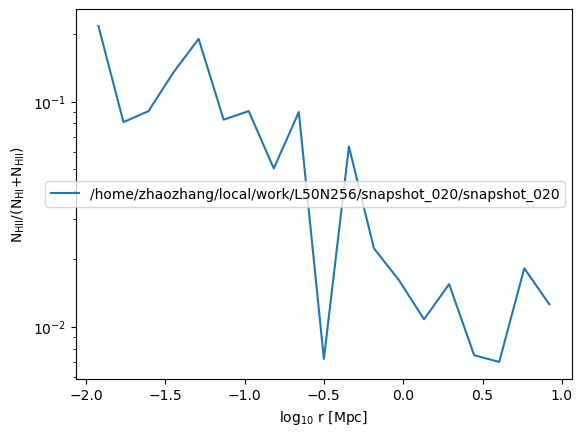

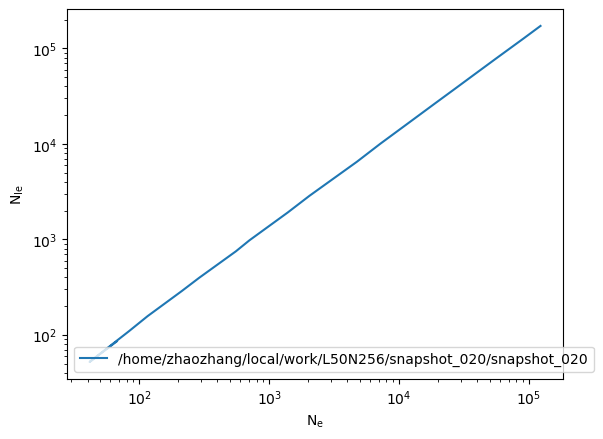

In [7]:
for i in range(len(snapfile)):
    plt.plot(Xpoints, profile[i]["ionization_H_atom"], color=cmap(
        i), label="{}".format(snapfile[i][0]))
    #plt.plot(Xpoints, profile[i]["ionization1"], color=cmap(
        #i), label="{}".format(snapfile[i][0]))
plt.yscale("log")
plt.xlabel(r"log$_{10}$ r [Mpc]")
plt.ylabel(r"N$_{\rm HII}$/(N$_{\rm HI}$+N$_{\rm HII}$)")
plt.legend()
plt.show()
plt.savefig("HII_H.png", bbox_inches="tight")
plt.close()

for i in range(len(snapfile)):
    plt.plot(profile[i]["Ne"], profile[i]["NI_e"], color=cmap(
        i), label="{}".format(snapfile[i][0]))
    #plt.plot(Xpoints, profile[i]["ionization1"], color=cmap(
        #i), label="{}".format(snapfile[i][0]))
plt.yscale("log")
plt.xscale("log")
plt.xlabel(r"N$_{\rm e}$")
plt.ylabel(r"N$_{\rm Ie}$")
plt.legend()
plt.show()
plt.savefig("NIe_Ne.png", bbox_inches="tight")
plt.close()

16564032

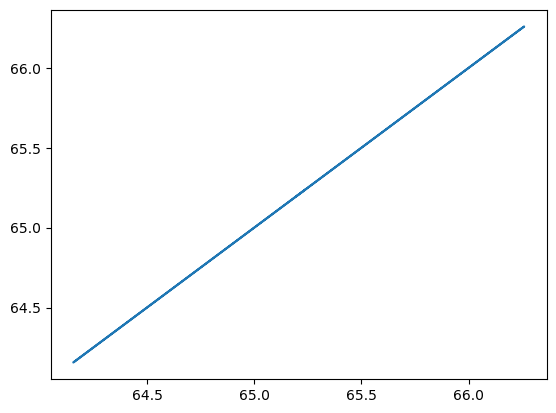

In [16]:
N_Ion =  N_HII + N_DII + N_HeII + 2*N_HeIII + 2*N_H2II

plt.plot(np.log10(N_Ion), np.log10(N_e))
len(N_Ion)

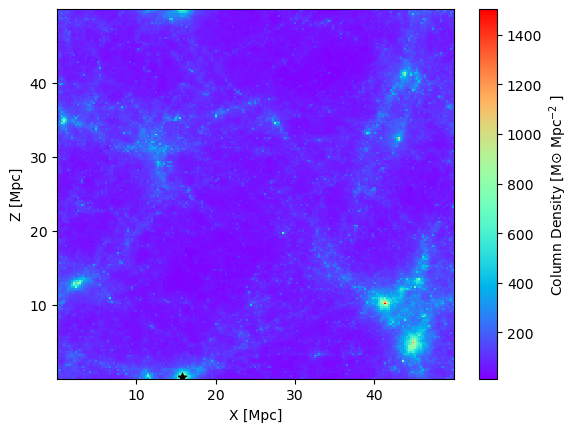

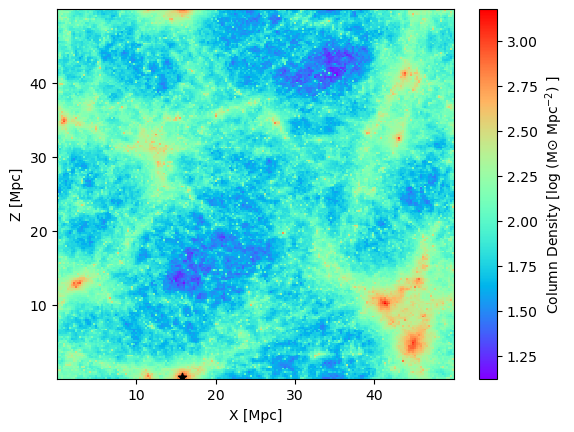

In [22]:
Bin_num = 200
#make Star coordinate bin
sphX = data[0]["sphX"]*h
sphZ = data[0]["sphZ"]*h
sphX_min = np.min(sphX)
sphX_max = np.max(sphX )
sphZ_min = np.min(sphZ)
sphZ_max = np.max(sphZ)

sphX_bins = np.linspace(sphX_min, sphX_max, Bin_num)
sphZ_bins = np.linspace(sphZ_min, sphZ_max, Bin_num)

dx = sphX_bins[1] - sphX_bins[0]
dz= sphZ_bins[1] - sphZ_bins[0]
sphX_bin_mid = sphX_bins + dx
sphZ_bin_mid = sphZ_bins + dz
dSxz = dx*dz
#made Star coordinate bin
starX = data[i]["starX"]
starZ = data[i]["starZ"]
starX_min = np.min(data[0]["starX"])
starX_max = np.max(data[0]["starX"])
starZ_min = np.min(data[0]["starZ"])
starZ_max = np.max(data[0]["starZ"])

starX_bins = np.linspace(starX_min, starX_max, Bin_num)
starZ_bins = np.linspace(starZ_min, starZ_max, Bin_num)
SPHmass_o = data[0]["sphmass"] #################The SPHmass not considering the Smoothing length###########
SPHMasses, xedges, zedges = histogram2d(sphX, sphZ, bins = [sphX_bins, sphZ_bins], weights = (data[0]["sphmass"]))
SPHMasses = SPHMasses.T
X, Z = np.meshgrid(xedges, zedges)
hh = plt.pcolormesh(X, Z, SPHMasses/dSxz, cmap='rainbow')
plt.scatter(data[0]["halopos"][0][0]*h, data[0]["halopos"][0][2]*h, marker = '*', color = 'k')
plt.xlabel(r"X [Mpc]")
plt.ylabel(r"Z [Mpc]")
cb = plt.colorbar(hh)
cb.set_label('Column Density [M$\odot$ Mpc$^{-2}$ ]')  #设置colorbar的标签字体
plt.savefig("SPHrho-Cordinates_20_0.png", bbox_inches="tight")
plt.show()
plt.close()


log_SPHrho_S = np.log10(SPHMasses/dSxz)
hh = plt.pcolormesh(X, Z, log_SPHrho_S, cmap='rainbow')
plt.scatter(data[0]["halopos"][0][0]*h, data[0]["halopos"][0][2]*h, marker = '*', color = 'k')
plt.xlabel(r"X [Mpc]")
plt.ylabel(r"Z [Mpc]")
cb = plt.colorbar(hh)
cb.set_label('Column Density [log (M$\odot$ Mpc$^{-2}$) ]')  #设置colorbar的标签字体
plt.savefig("SPHrho-Cordinates_log_20_0.png", bbox_inches="tight", dpi = 500)
plt.show()
plt.close()


In [ ]:

f = h5py.File('column_density.hdf5','w')
f.create_dataset('X', (len(X),len(X)), data = X)
f.create_dataset('Z', (len(Z),len(Z)), data = Z)
f.create_dataset('SPHrho_S', (len(SPHMasses), len(SPHMasses)), data = SPHMasses/dSxz)
f.close()


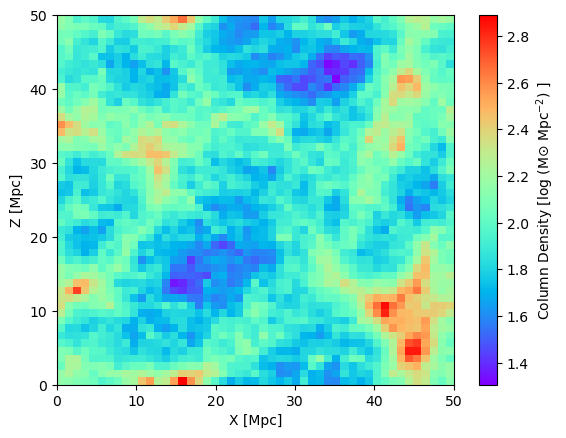

In [20]:

#f = h5py.File('column_denstiy_200bin.hdf5', "r")

f = h5py.File('column_denstiy1_50bin.hdf5', "r")
X = f['X']
Z = f['Z']

SPHrho_column = f['SPHrho_S']
SPHrho_column = np.array(SPHrho_column).T
log_SPHrho_S = np.log10(SPHrho_column)
hh = plt.pcolormesh(X, Z, log_SPHrho_S, cmap='rainbow')
plt.xlabel(r"X [Mpc]")
plt.ylabel(r"Z [Mpc]")
cb = plt.colorbar(hh)
cb.set_label('Column Density [log (M$\odot$ Mpc$^{-2}$) ]')  #设置colorbar的标签字体
#plt.scatter(data[0]["halopos"][0][0], data[0]["halopos"][0][2], marker = '*', color = 'k')
plt.savefig("SPHrho-Cordinates_log_20_1002.png", bbox_inches="tight", dpi = 1000)
plt.show()

array([[2.14925202, 2.13168686, 2.10061118, ..., 2.09618204, 2.02074954,
        2.12884336],
       [2.16890552, 2.23479566, 2.14317329, ..., 2.12030479, 2.1130024 ,
        2.17258595],
       [2.03339183, 2.23333191, 2.22555291, ..., 2.22539444, 2.13051872,
        2.17189222],
       ...,
       [2.06139736, 2.05859308, 2.01003186, ..., 2.11477909, 1.93399439,
        1.92854764],
       [2.14524479, 2.1034681 , 2.07394779, ..., 2.03629012, 2.02016245,
        1.99080936],
       [2.1760522 , 2.10223351, 1.94224713, ..., 2.16605548, 2.21219842,
        2.18040341]])

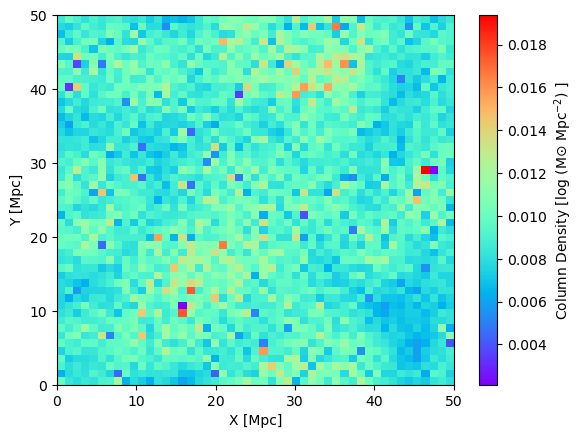

In [21]:
log_SPHrho_S_withouSMooth = np.log10(SPHMasses/dSxz)
log_SPHrho_S = np.log10(SPHrho_column)
SPHrho_diff = (log_SPHrho_S - log_SPHrho_S_withouSMooth)/log_SPHrho_S
hh = plt.pcolormesh(X, Z,SPHrho_diff , cmap='rainbow')
#hh = plt.pcolormesh(X, Z, np.log10(SPHrho_diff/SPHrho_column), cmap='rainbow')
plt.xlabel(r"X [Mpc]")
plt.ylabel(r"Y [Mpc]")
cb = plt.colorbar(hh)
cb.set_label('Column Density [log (M$\odot$ Mpc$^{-2}$) ]')  #设置colorbar的标签字体
#plt.scatter(data[0]["halopos"][0][0], data[0]["halopos"][0][2], marker = '*', color = 'k')
plt.savefig("SPHrho-Cordinates_log_diff.png", bbox_inches="tight", dpi = 1000)
plt.show()

In [18]:
print(np.sum(log_SPHrho_S))
np.sum(log_SPHrho_S_withouSMooth)


4659.641396756596


7540.253630829518

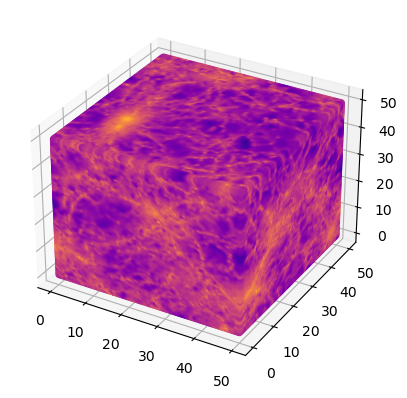

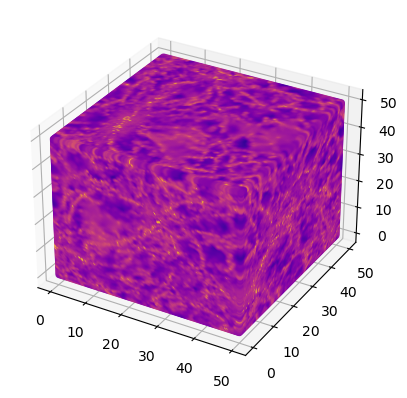

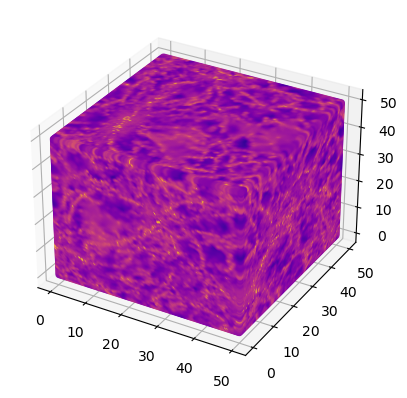

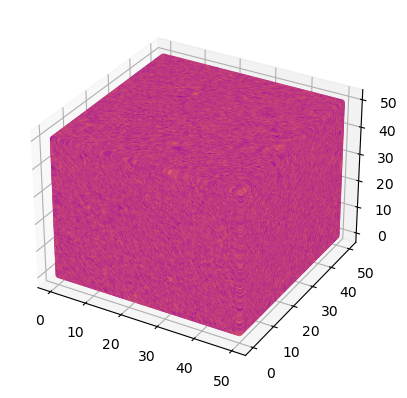

In [7]:
halo_center = np.array([data[0]["halopos"][0][0]*h, data[0]["halopos"][0][1]*h, data[0]["halopos"][0][2]*h])
#f = h5py.File('3D_BOX1.hdf5', "r")
f = h5py.File("3D_BOX_200bin.hdf5", "r")
x_vals = np.array(f['X'])
y_vals = np.array(f['Y'])
z_vals = np.array(f['Z'])
SPHMasses_3D = np.array(f['SPHMasses'])
SPHrho_3D = np.array(f['SPHrho'])
nH1_3D = np.array(f['nHI'])*(Boxsize/Bin_num*MpcTocm)**3
NH1_3D = np.array(f['NHI'])
ratio_n_N = NH1_3D/nH1_3D 
f.close()
# 绘制三维图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = np.log10(SPHMasses_3D.flatten()+ 1)  # 使用对数缩放
#x_vals, y_vals, z_vals = np.meshgrid(
    #np.linspace(0, 50, Bin_num), np.linspace(0, 50, Bin_num), np.linspace(0, 50, Bin_num))
#ax.scatter(sphX, sphY, sphZ, c=SPHmass_o, cmap='plasma', alpha=0.1)  # 绘制粒子
ax.scatter(x_vals.flatten(), y_vals.flatten(), z_vals.flatten(), c=colors, cmap='plasma', s=10)  # 绘制每个bin
ax.scatter(halo_center[0],halo_center[2],halo_center[2], marker = '*', color = 'k')
plt.savefig('Mass_3D.png')
plt.show()
#plt.savefig('./mass.png')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors2 = np.log10(NH1_3D.flatten()+ 1)  # 使用对数缩放
#x_vals, y_vals, z_vals = np.meshgrid(
    #np.linspace(0, 50, Bin_num), np.linspace(0, 50, Bin_num), np.linspace(0, 50, Bin_num))
#ax.scatter(sphX, sphY, sphZ, c=SPHmass_o, cmap='plasma', alpha=0.1)  # 绘制粒子
ax.scatter(x_vals.flatten(), y_vals.flatten(), z_vals.flatten(), c=colors2, cmap='plasma', s=10)  # 绘制每个bin
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors2 = np.log10(nH1_3D.flatten()+ 1)  # 使用对数缩放
#x_vals, y_vals, z_vals = np.meshgrid(
    #np.linspace(0, 50, Bin_num), np.linspace(0, 50, Bin_num), np.linspace(0, 50, Bin_num))
#ax.scatter(sphX, sphY, sphZ, c=SPHmass_o, cmap='plasma', alpha=0.1)  # 绘制粒子
ax.scatter(x_vals.flatten(), y_vals.flatten(), z_vals.flatten(), c=colors2, cmap='plasma', s=10)  # 绘制每个bin
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors2 = np.log10(ratio_n_N.flatten()+ 1)  # 使用对数缩放
#x_vals, y_vals, z_vals = np.meshgrid(
    #np.linspace(0, 50, Bin_num), np.linspace(0, 50, Bin_num), np.linspace(0, 50, Bin_num))
#ax.scatter(sphX, sphY, sphZ, c=SPHmass_o, cmap='plasma', alpha=0.1)  # 绘制粒子
ax.scatter(x_vals.flatten(), y_vals.flatten(), z_vals.flatten(), c=colors2, cmap='plasma', s=10)  # 绘制每个bin
plt.show()


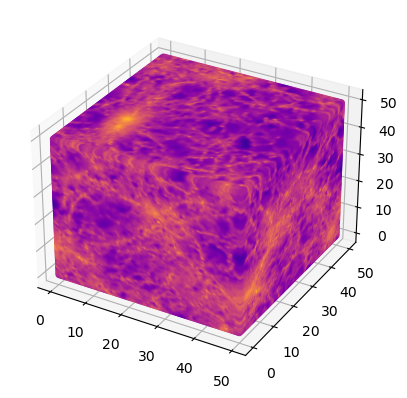

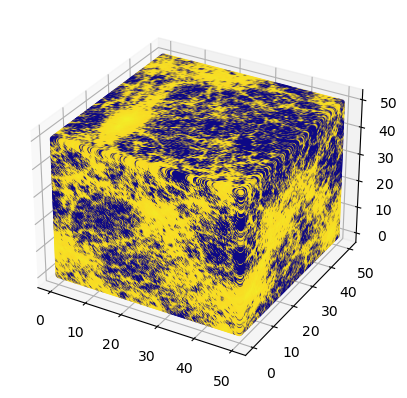

In [53]:
sphX_bins = np.linspace(0, Boxsize, Bin_num+1)
sphY_bins = np.linspace(0, Boxsize, Bin_num+1)
sphZ_bins = np.linspace(0, Boxsize, Bin_num+1)

Masses_3D, (xedges_3D, yedges_3D, zedges_3D) = np.histogramdd((sphX, sphY, sphZ), bins = (sphX_bins, sphY_bins, sphZ_bins), weights = (data[0]["sphmass"]))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_vals, y_vals, z_vals = np.meshgrid(
    np.linspace(0, Boxsize, Bin_num), np.linspace(0, Boxsize, Bin_num), np.linspace(0, Boxsize, Bin_num))
colors4 = np.log10((Masses_3D*2e43).flatten()+ 1)  # 使用对数缩放
# 创建网格线
# 调整点的大小和透明度
ax.scatter(x_vals.flatten(), y_vals.flatten(), z_vals.flatten(), c=colors4, cmap='plasma', s=10)  # 绘制每个bin


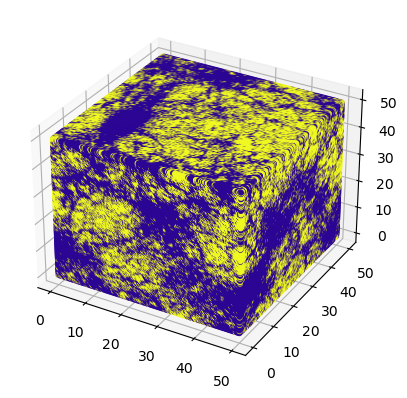

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_vals, y_vals, z_vals = np.meshgrid(
    np.linspace(0, Boxsize, Bin_num), np.linspace(0, Boxsize, Bin_num), np.linspace(0, Boxsize, Bin_num))
colors5 = (np.log10(SPHMasses_3D +1) - np.log10(Masses_3D*2e43+1))/np.log10(SPHMasses_3D +1)  # 使用对数缩放
# 创建网格线
# 调整点的大小和透明度
ax.scatter(x_vals.flatten(), y_vals.flatten(), z_vals.flatten(), c=colors5, cmap='plasma', s=10)  # 绘制每个bin

In [61]:
print(np.log10(Masses_3D*2e43+1))
(np.log10(SPHMasses_3D +1) - np.log10(Masses_3D*2e43+1))/np.log10(SPHMasses_3D +1)


[[[41.77584592  0.         41.78326174 ...  0.          0.
    0.        ]
  [ 0.         41.47481592  0.         ...  0.          0.
    0.        ]
  [41.48079971 41.77584592 41.47481592 ... 41.48289464  0.
    0.        ]
  ...
  [41.47481592 41.47481592 41.77584592 ...  0.         41.77584592
    0.        ]
  [41.47481592 41.47481592 41.47481592 ...  0.          0.
   41.47481592]
  [41.47481592 41.47481592 41.47481592 ... 41.77584592  0.
   41.47481592]]

 [[ 0.         41.47481592  0.         ...  0.         41.47481592
   41.47481592]
  [41.47481592  0.         41.77584592 ...  0.          0.
   41.47481592]
  [41.47481592 41.47481592  0.         ...  0.         41.47481592
   41.47481592]
  ...
  [41.47481592 41.47481592 41.77584592 ... 41.47481592 41.47481592
   41.77584592]
  [41.47481592  0.          0.         ... 41.47481592 41.18440448
   41.4902469 ]
  [ 0.         41.47481592 41.77584592 ...  0.         41.47481592
    0.        ]]

 [[41.47481592 41.77584592 41.189040

array([[[-1.03499043e-02,  1.00000000e+00, -9.88341220e-03, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        [ 1.00000000e+00, -2.02506781e-03,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        [-3.16165090e-03, -9.18854165e-03, -2.41878023e-03, ...,
         -1.16522765e-02,  1.00000000e+00,  1.00000000e+00],
        ...,
        [-1.27288199e-03, -4.49846854e-04, -5.39841182e-03, ...,
          1.00000000e+00, -9.18725370e-03,  1.00000000e+00],
        [-1.92031433e-03, -1.03187143e-03,  2.26407697e-04, ...,
          1.00000000e+00,  1.00000000e+00, -2.96052355e-03],
        [-2.63640063e-03, -1.79978003e-03, -1.34707168e-03, ...,
         -1.54052244e-02,  1.00000000e+00, -4.43415726e-03]],

       [[ 1.00000000e+00, -3.14137594e-03,  1.00000000e+00, ...,
          1.00000000e+00, -7.67246217e-03, -5.53882587e-03],
        [-3.73691564e-03,  1.00000000e+00, -9.70396968e-03, ...,
          1.00000000e+00,  1.00000000e

In [24]:
from scipy.spatial import cKDTree

def find_particles_within_RV(pos, halo_center, RV, Lbox):
    # Apply periodic boundary conditions to halo center
    halo_center = np.mod(halo_center, Lbox)

    # Build KDTree with periodic boundary conditions
    tree = cKDTree(pos, boxsize=Lbox)

    # Find all particles within RV of halo center
    idx = tree.query_ball_point(halo_center, RV)

    # Calculate distances of all particles within RV
    dist = np.sqrt(np.sum((pos[idx] - halo_center)**2, axis=1))

    # Check for particles that cross periodic boundaries
    crossings = pos[idx] - halo_center
    crossings = np.mod(crossings + Lbox/2, Lbox) - Lbox/2
    crossing_dist = np.sqrt(np.sum((crossings)**2, axis=1))
    mask = crossing_dist < dist
    idx = np.array(idx)
    idx[mask] = idx[mask] + len(pos)
    dist[mask] = crossing_dist[mask]

    return idx, dist

    # 设置参数

LINE = 20  # 视线数量
dtheta = np.pi / LINE
dpsi = 2 * np.pi / LINE
los_vecs = np.zeros((LINE**2, 3))
for n in range(LINE):
    for m in range(LINE):
        theta = (0.5 + n) * dtheta
        psi = (0.5 + m) * dpsi
        los_vecs[n*LINE+m, 0] = np.sin(theta) * np.cos(psi)
        los_vecs[n*LINE+m, 1] = np.sin(theta) * np.sin(psi)
        los_vecs[n*LINE+m, 2] = np.cos(theta)
#Boxsize = f["Header"].attrs["BoxSize"]
#print("Total number of particles: {}".format(NumPart_Total))
#nfile = f["Header"].attrs["NumFilesPerSnapshot"]
#SPHdensitytocgs = f['PartType0']['Density'].attrs['to_cgs']
#SPHmasstocgs = f['PartType0']['Masses'].attrs['to_cgs']


sphpos = data[0]['sphpos']*h
SPHmasstocgs = SPHmass_o*SPHmasstocgs 
SPHrho = data[0]['rho']*SPHdensitytocgs
f_e = data[0]['n_e']
f_nHI = data[0]['n_HI']
f_nHII = data[0]['n_HII']
f_nHeI = data[0]['n_HeI']
f_nHeII = data[0]['n_HeII']
f_nHeIII = data[0]['n_HeIII']


Lbox = Boxsize
halo_center = np.array([data[0]["halopos"][0][0]*h, data[0]["halopos"][0][1]*h, data[0]["halopos"][0][2]*h])
los_length = 1
nlos = LINE**2
n_bins = 100  ####Bin number of LC in 1 box
Rd = 2
mp = m_p.to(u.g).value
bin_edges = np.linspace(0, los_length, n_bins+1)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_volumes = 4.0/3*np.pi*((bin_edges[1:]*MpcTocm)**3 - (bin_edges[:-1]*MpcTocm)**3)/nlos
idx, dis = find_particles_within_RV(sphpos, halo_center, Rd, Lbox)

new_sphpos = np.zeros_like(sphpos)
bin_edges = np.linspace(0, los_length, n_bins+1)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
d_bin = bin_edges[1:] - bin_edges[:-1] 
for i in range(len(idx)):
    if idx[i]<=len(sphpos):
        new_sphpos[idx[i]] = sphpos[idx[i]]
    if idx[i]>len(sphpos):
        new_sphpos[idx[i]-len(sphpos)] = np.mod(sphpos[idx[i] -len(sphpos)] - halo_center + Lbox/2, Lbox) - Lbox/2 + halo_center
        idx[i] = idx[i] - len(sphpos)

array([0.0176268 , 0.01595599, 0.0086484 , ..., 0.01492059, 0.01492059,
       0.01492059])

In [134]:
def generate_lightcone(m, n, L, delta_alpha, delta_delta):
    # Generate cartesian coordinate system
    x = np.arange(0, L, L/m)
    y = np.arange(0, L, L/n)
    z = np.arange(0, L, L)
    X, Y, Z = np.meshgrid(x, y, z, indexing='ij')
    coordinates = np.stack([X.ravel(), Y.ravel(), Z.ravel()], axis=1)
    
    # Define line of sight
    LOS = np.array([L/m, L/n, L])
    nm = n * m
    image = np.array([n*L, m*L, nm*L])
    
    # Calculate unit vectors
    u3 = (np.array([n, m, nm]) / (n**2 + m**2 + nm**2)**0.5)
    axis = np.argmin([m, n])
    u1 = np.zeros(3)
    u1[axis] = 1
    u1 = u1 - u3[axis] * u1[axis]
    u1 /= np.linalg.norm(u1)
    u2 = np.cross(u3, u1)
    
    # Convert cartesian coordinates to angular coordinates
    tan_alpha = np.sum(coordinates * u1, axis=1) / np.sum(coordinates * u3, axis=1)
    tan_delta = np.sum(coordinates * u2, axis=1) / np.sum(coordinates * u3, axis=1)
    
    # Calculate field limits
    alpha_max = np.arctan(delta_alpha/2) / np.sqrt(1 + tan_delta**2)
    delta_max = np.arctan(delta_delta/2) / np.sqrt(1 + tan_alpha**2)
    
    # Select light cone within field limits
    in_field = np.abs(tan_alpha) <= alpha_max
    in_field &= np.abs(tan_delta) <= delta_max
    
    # Calculate distances to periodic image of origin
    distances = np.sqrt(np.sum((coordinates - image)**2, axis=1))
    duplicate = distances < np.sqrt(n**2 + m**2 + nm**2) * L
    
    # Select unique galaxies within field limits
    in_lightcone = in_field & ~duplicate
    lightcone = coordinates[in_lightcone]
    
    return lightcone


In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(LINE**2):
    ax.plot(bin_edges[:-1] + d_bin/2,  n_e_arr1[i], alpha=0.5)
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.01,2)
ax.set_ylim(1e-8,1e1)
ax.set_xlabel('Distance along LOS (Mpc/h)')
ax.set_ylabel('Electron Density (cm$^{-3}$)')
plt.show()

len(idx)

In [ ]:
Halo_c_pos = new_sphpos[idx] - halo_center
Smoothlen = data[0]['smoothlen']

Smoothlen_halo_c = Smoothlen[idx]
Num_Par_withinRd = len(Halo_c_pos)

Num_Par_withinRd

In [9]:
from scipy.spatial.transform import Rotation
from math import atan2, degrees
def rotation_matrix(angle, axis):
    """计算绕着某个坐标轴旋转某个角度的旋转矩阵"""
    sina = np.sin(angle)
    cosa = np.cos(angle)
    if axis == 0:
        # 绕X轴旋转
        R = np.array([[1, 0, 0], [0, cosa, -sina], [0, sina, cosa]])
    elif axis == 1:
        # 绕Y轴旋转
        R = np.array([[cosa, 0, -sina], [0, 1, 0], [sina, 0, cosa]])
    elif axis == 2:
        # 绕Z轴旋转
        R = np.array([[cosa, sina, 0], [-sina, cosa, 0], [0, 0, 1]])
    return R

def find_los_through_sphere(Halo_c_pos, los_vec, smooth_len):

    center = Halo_c_pos
    
    # 球面半径为平滑长度
    radius = smooth_len
    
    # 存储穿过球面的LOS的索引
    through_indices = []
    
    # 遍历所有LOS
    for i in range(len(los_vec)):
        # 获取当前LOS的方向向量
        direction_vec = los_vec[i]
        
        # 将方向向量单位化
        direction_vec /= np.linalg.norm(direction_vec)
        
        # 沿着LOS的方向向量延长LOS
        # 延长长度应该取一个足够大的值，比如1e10，以确保延长后的LOS一定会穿过球面
        end_point = direction_vec * 1e10
        
        # 判断当前LOS是否与球面有交点
        center = Halo_c_pos
        center_to_origin = center - [0, 0, 0]
        
        # 计算LOS与球的交点
        a = np.dot(direction_vec, direction_vec)
        b = 2 * np.dot(direction_vec, center_to_origin)
        c = np.dot(center_to_origin, center_to_origin) - radius**2
        
        # 计算判别式
        delta = b**2 - 4*a*c
        
        if delta >= 0:
            # 如果判别式大于等于0，则说明当前LOS穿过了球面
            through_indices.append(i)
            
    return through_indices
# 计算每个LOS相对于X轴的旋转角度
los_tree = cKDTree(los_vecs)
los_centers = np.mean(los_vecs, axis=0)

###############以Halo中心为原点的坐标系，得到Rd内的所有粒子的坐标位置###################
Halo_c_pos = new_sphpos[idx] - halo_center
Smoothlen = data[0]['smoothlen']

Smoothlen_halo_c = Smoothlen[idx]
Num_Par_withinRd = len(Halo_c_pos)
sphmass_g = SPHmass_o*SPHmasstocgs
sphmass_halo_within = sphmass_g[idx]
f_e_within = data[0]['n_e'][idx]
SPHrho = data[0]["rho"]*SPHdensitytocgs
SPHrho_within = SPHrho[idx]
n_e_arr = np.zeros((nlos, n_bins))
n_e_arr1 = np.zeros((nlos, n_bins))
bin_edges = np.linspace(0, los_length, n_bins+1)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
#thetas = np.degrees(np.arctan2(los_centers[:, 1], los_centers[:, 0]))
start_time = time.time()  # 记录程序开始时间
for i in range(Num_Par_withinRd): #Num_Par_withinRd
    ################绕X轴旋转################
    center = Halo_c_pos[i]
    h_smooth= Smoothlen_halo_c[i]
    line_idx = find_los_through_sphere(center, los_vecs, h_smooth)
    #print("i = ", i)
    #print("line_idx = ",  line_idx)
    #print("h = ", h_smooth)
    for x in line_idx:
        phi = np.arctan2(los_vecs[x][1], los_vecs[x][0])

        #print("x= ",  x)
        Rz = rotation_matrix(-phi, 2)
        line_xz = los_vecs[x]@Rz

        ################绕Y轴旋转################
        theta  = np.arctan2(line_xz[2], line_xz[0])

        Ry = rotation_matrix(theta, 1)

        line_x = line_xz@Ry
        ################根据LOS与粒子的相对位置将粒子旋转################
        sphere_center_rot = Halo_c_pos[i]@Rz@Ry
        ################计算旋转后的粒子与X轴的交点################
        xc, yc, zc = sphere_center_rot 
        x1 = xc - sqrt(Smoothlen_halo_c[i]**2-yc**2-zc**2)
        x2 = xc + sqrt(Smoothlen_halo_c[i]**2-yc**2-zc**2)
        bin_idx1 = 0
        bin_idx2 = 0
        bin_idx = []
        if (x1 > 0) & (los_length > x2 > 0): ############两个交点全在LOS长度内#########
            bin_idx1 = np.digitize(x1, bin_centers) 
            bin_idx2 = np.digitize(x2, bin_centers)
        elif (los_length > x1 > 0) & (x2>= los_length):##############x1在LOS长度内##########
            bin_idx1 = np.digitize(x1, bin_centers)
            bin_idx2 = np.digitize(los_length, bin_centers)
        elif (x1<= 0) & (los_length>x2>= 0):#############只有x2在LOS长度内##########
            bin_idx1 = np.digitize(0, bin_centers)
            bin_idx2 = np.digitize(x2, bin_centers)
        elif (x1<= 0) & (x2>= los_length):#############粒子平滑长度包含整个LOS长度##########
            bin_idx1 = np.digitize(0, bin_edges)
            bin_idx2 = np.digitize(los_length, bin_edges)
                #############交点包含的bin索引以及粒子距离bin中心的距离##########
        bin_idx = [m for m in range(bin_idx1, bin_idx2)]
        ##################将包含的中心点转化为（x, 0, 0）的三维向量
        if not bin_idx:
            continue
        else:
            bin_centers_within = np.expand_dims(bin_centers[bin_idx], axis=1)
            y_z = np.zeros([2,len(bin_centers_within)])
            bin_centers_within = np.insert(bin_centers_within, 1, y_z, axis = 1)
            binc_partc_dist = np.linalg.norm(bin_centers_within - sphere_center_rot, axis = 1)
            weight_within=  np.array(list(map(lambda x:M6(x*MpcTocm,0, h_smooth*MpcTocm,3), binc_partc_dist)))
            n_e_arr[x][bin_idx] += sphmass_halo_within[i]*sphmass_halo_within[i]*f_e_within[i]*weight_within/mp/bin_volumes[bin_idx]
            n_e_arr1[x][bin_idx] += sphmass_halo_within[i]*f_e_within[i]*weight_within/mp

            #if (sphere_center_rot[0]<0.5) & (len(bin_idx)>3):
                #print('binc_partc_dist = ', binc_partc_dist)
                #print("x1,x2 = ", x1, x2)
                #print("sphere_center_rot = ", sphere_center_rot[0])
                #print("weight_within = ", weight_within)
                #print("n_e = ", n_e_arr[x][bin_idx])
    if i%1000 == 0:
        print("it's  the %d step"  %i )
        end_time = time.time()  # 记录程序结束时间
        run_time = end_time - start_time  # 计算程序运行时间，单位为秒
        print(f"程序已运行时间为：{run_time:.2f}秒")
        print(f"程序剩余时间约为：{((Num_Par_withinRd/(i+1e-30)*run_time-run_time)):.2f}秒")

it's  the 0 step
程序已运行时间为：0.00秒
程序剩余时间约为：741603023052215515700717609287680.00秒
it's  the 1000 step
程序已运行时间为：3.53秒
程序剩余时间约为：633.32秒
it's  the 2000 step
程序已运行时间为：7.06秒
程序剩余时间约为：629.46秒
it's  the 3000 step
程序已运行时间为：10.59秒
程序剩余时间约为：626.00秒
it's  the 4000 step
程序已运行时间为：14.09秒
程序剩余时间约为：621.19秒
it's  the 5000 step
程序已运行时间为：17.63秒
程序剩余时间约为：618.32秒
it's  the 6000 step
程序已运行时间为：21.27秒
程序剩余时间约为：618.25秒
it's  the 7000 step
程序已运行时间为：24.94秒
程序剩余时间约为：617.86秒
it's  the 8000 step
程序已运行时间为：28.82秒
程序剩余时间约为：621.03秒
it's  the 9000 step
程序已运行时间为：32.78秒
程序剩余时间约为：624.26秒
it's  the 10000 step
程序已运行时间为：36.66秒
程序剩余时间约为：624.68秒
it's  the 11000 step
程序已运行时间为：40.78秒
程序剩余时间约为：628.01秒
it's  the 12000 step
程序已运行时间为：44.55秒
程序剩余时间约为：625.14秒
it's  the 13000 step
程序已运行时间为：48.77秒
程序剩余时间约为：627.96秒
it's  the 14000 step
程序已运行时间为：53.57秒
程序剩余时间约为：636.74秒
it's  the 15000 step
程序已运行时间为：58.93秒
程序剩余时间约为：649.82秒
it's  the 16000 step
程序已运行时间为：63.75秒
程序剩余时间约为：655.00秒
it's  the 17000 step
程序已运行时间为：68.34秒
程序剩余时间约为：656.85秒
it's  the 1800

In [1]:
len(snapfile)

NameError: name 'snapfile' is not defined

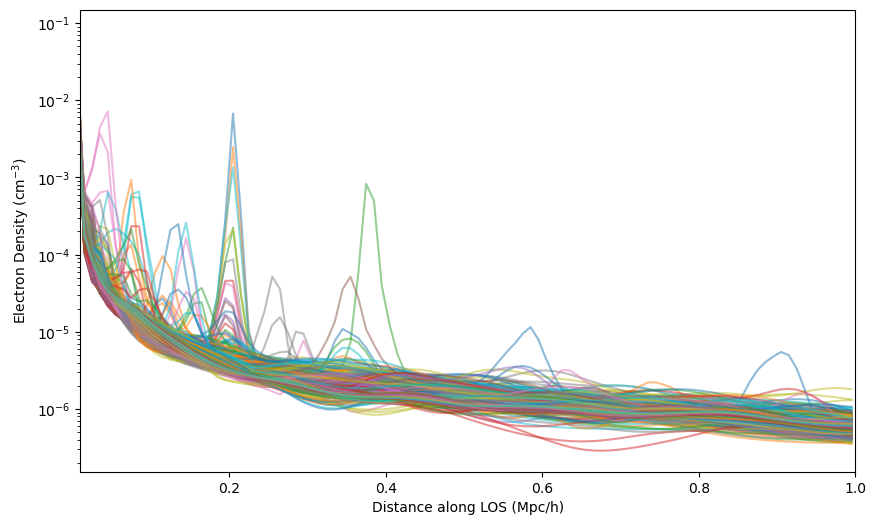

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(LINE**2):
    ax.plot(bin_edges[:-1] + d_bin/2,  n_e_arr1[i], alpha=0.5)
#ax.plot(bin_edges[:-1] + d_bin/2,  np.sum(n_e_arr, axis = 0)/len(n_e_arr), alpha=0.5)
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.01,1)
#ax.set_ylim(1e-8,1e1)
ax.set_xlabel('Distance along LOS (Mpc/h)')
ax.set_ylabel('Electron Density (cm$^{-3}$)')
plt.savefig('ne_arr.png', dpi = 400)
plt.show()

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
LINE = 50  # 视线数量
dtheta = np.pi / LINE
dpsi = 2 * np.pi / LINE
los_vecs = np.zeros((LINE**2, 3))
for n in range(LINE):
    for m in range(LINE):
        theta = (0.5 + n) * dtheta
        psi = (0.5 + m) * dpsi
        los_vecs[n*LINE+m, 0] = np.sin(theta) * np.cos(psi)
        los_vecs[n*LINE+m, 1] = np.sin(theta) * np.sin(psi)
        los_vecs[n*LINE+m, 2] = np.cos(theta)
line_idx = find_los_through_sphere(Halo_c_pos[0], los_vecs, Smoothlen_halo_c[0])
los_vecs_ = los_vecs[line_idx]
sphmass_halo_within[i]*f_e_within[i]*weight_within/mp


#plt.plot(los_vecs)
Halo_c_pos1 = np.array([[-0.9558013726107021, -0.1370845946967665, 0.19300643903490708]])
h_smooth = Smoothlen_halo_c[0]
los_vecs_extended = 2 * los_vecs_
#生成球面上的点
U = np.linspace(0, 2 * np.pi, 100)
V = np.linspace(0, np.pi, 100)
x = h_smooth * np.outer(np.cos(U), np.sin(V)) + Halo_c_pos[0][0]
y = h_smooth * np.outer(np.sin(U), np.sin(V)) + Halo_c_pos[0][1]
z = h_smooth * np.outer(np.ones(np.size(U)), np.cos(V)) + Halo_c_pos[0][2]

# 创建 3D 坐标系，并画出LOS向量和球面
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.plot(*zip([0, 0, 0], *los_vecs_.T), linewidth=0.5)  # 画出LOS向量

# 绘制直线
for i in range(len(los_vecs_extended)):
    ax.plot([0, los_vecs_extended[i,0]], [0, los_vecs_extended[i,1]], [0, los_vecs_extended[i,2]], 'r-', alpha=0.1)
ax.plot_surface(x, y, z, alpha=0.5)  # 画出球面

for i in range(0, len(Halo_c_pos), 10):
    ax.scatter(Halo_c_pos[i][0],Halo_c_pos[i][1],Halo_c_pos[i][2], s=0.1)
#ax.set_xlim([0, los_vecs_extended[:,0].max()])
#ax.set_ylim([0, los_vecs_extended[:,1].max()])
#ax.set_zlim([0, los_vecs_extended[:,2].max()])

# 显示图形

plt.show()


In [ ]:
Halo_c_pos

h_smooth 

Halo_c_pos[0]

7.989031174813711 3.3884827335543957


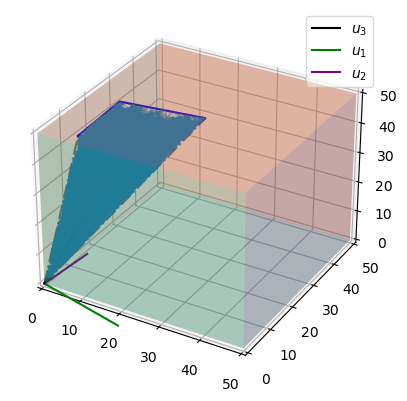

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 设置正方体边长
L =Lbox

# 设置坐标轴范围
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([0, L])
ax.set_ylim([0, L])
ax.set_zlim([0, L])

# 绘制正方体
r = [0, L]
x, y = np.meshgrid(r, r)
z = np.array([[0, 0], [0, 0]])
ax.plot_surface(x, y, z, alpha=0.2)
ax.plot_surface(x, y, L-z, alpha=0.2)
ax.plot_surface(x, z, y, alpha=0.2)
ax.plot_surface(x, L-z, y, alpha=0.2)
ax.plot_surface(z, x, y, alpha=0.2)
ax.plot_surface(L-z, x, y, alpha=0.2)


# 显示图形


L = Lbox
m = 3
n = 4
x = np.arange(0, L, L/m)
y = np.arange(0, L, L/n)
z = np.arange(0, L, L)

X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

coordinates = np.stack([X.ravel(), Y.ravel(), Z.ravel()], axis=1)
LOS = np.array([L/m, L/n, L])

nm = n * m
image = np.array([n*L, m*L, nm*L])

# Calculate unit vectors
u3 = (np.array([n, m, nm]) / (n**2 + m**2 + nm**2)**0.5)
axis = np.argmin([n, m])
u1 = np.zeros(3)
u1[axis] = 1
u1 = np.cross(u1, u3)
u1 /= np.linalg.norm(u1)
u2 = np.cross(u3, u1)
u2 /= np.linalg.norm(u2)
O = np.array([0,0,0])
ax.plot([O[0], LOS[0]], [O[1], LOS[1]], [O[2], LOS[2]])


ax.plot([O[0], 20*u3[0]], [O[1], 20*u3[1]], [O[2], 20*u3[2]], c = 'k', label = '$u_3$')
ax.plot([O[0], 20*u1[0]], [O[1], 20*u1[1]], [O[2], 20*u1[2]], c = 'g', label = '$u_1$')
ax.plot([O[0], 20*u2[0]], [O[1], 20*u2[1]], [O[2], 20*u2[2]], c = 'purple', label = '$u_2$')
tan_alpha = np.sum(sphpos * u1, axis=1) / np.sum(sphpos * u3, axis=1)
tan_delta = np.sum(sphpos * u2, axis=1) / np.sum(sphpos * u3, axis=1)

delta_alpha = 1/m
delta_delta = 1/n
# Calculate field limits
alpha_max = np.arctan(delta_alpha /2)
delta_max = np.arctan(delta_alpha/2)

# Select light cone within field limits
in_field = np.abs(tan_alpha) <= alpha_max
in_field &= np.abs(tan_delta) <= delta_max
x1 = sphpos[in_field][:, 0]
y1 = sphpos[in_field][:, 1]
z1 = sphpos[in_field][:, 2]

Mx_a = u1[0]-u3[0]*tan(-alpha_max)
My_a =  u1[1]-u3[1]*tan(-alpha_max)
Mz_a =  u1[2]-u3[2]*tan(-alpha_max)
Mx_de =  u2[0]-u3[0]*tan(-delta_max)
My_de =  u2[1]-u3[1]*tan(-delta_max)
Mz_de =  u2[2]-u3[2]*tan(-delta_max)
Mxa = u1[0]-u3[0]*tan(alpha_max)
Mya =  u1[1]-u3[1]*tan(alpha_max)
Mza =  u1[2]-u3[2]*tan(alpha_max)
Mxde =  u2[0]-u3[0]*tan(delta_max)
Myde =  u2[1]-u3[1]*tan(delta_max)
Mzde =  u2[2]-u3[2]*tan(delta_max)

x1_L = L*(My_a*Mz_de - Mz_a*My_de)/(Mx_a*My_de- My_a*Mx_de)
y1_L = -L*(Mx_a*Mz_de - Mx_de*Mz_a)/(Mx_a*My_de - My_a*Mx_de)

x2_L = L*(My_a*Mzde - Mz_a*Myde)/(Mx_a*Myde - My_a*Mxde)
y2_L = -L*(Mx_a*Mzde - Mxde*Mz_a)/(Mx_a*Myde - My_a*Mxde)

x3_L = L*(Mya*Mzde - Mza*Myde)/(Mxa*Myde - Mya*Mxde)
y3_L = -L*(Mxa*Mzde - Mxde*Mza)/(Mxa*Myde - Mya*Mxde)

x4_L = L*(Mya*Mz_de - Mza*My_de)/(Mxa*My_de - Mya*Mx_de)
y4_L = -L*(Mxa*Mz_de - Mx_de*Mza)/(Mxa*My_de - Mya*Mx_de)
print(x1_L, y1_L)

#sq1 = (n**2 + m**2 + nm**2)**0.5/(m*n)*L*np.array([-delta_alpha/2, -delta_delta/2, 1])*u3[2]
#sq2 = (n**2 + m**2 + nm**2)**0.5/(m*n)*L*np.array([-delta_alpha/2, delta_delta/2, 1])*u3[2]
#sq3 = (n**2 + m**2 + nm**2)**0.5/(m*n)*L*np.array([delta_alpha/2, -delta_delta/2, 1])*u3[2]
#sq4 = (n**2 + m**2 + nm**2)**0.5/(m*n)*L*np.array([delta_alpha/2, delta_delta/2, 1])*u3[2]

#sq1 = (n**2 + m**2 + nm**2)**0.5/(m*n)*L*u3
ax.plot([O[0],x1_L],[O[1],y1_L],[O[2],L], c = 'k', alpha = 0.5, linestyle='-.')
ax.plot([O[0],x2_L],[O[1],y2_L],[O[2],L], c = 'k', alpha = 0.5, linestyle='-.')
ax.plot([O[0],x3_L],[O[1],y3_L],[O[2],L], c = 'k', alpha = 0.5, linestyle='-.')
ax.plot([O[0],x4_L],[O[1],y4_L],[O[2],L], c = 'k', alpha = 0.5, linestyle='-.')
#ax.plot([O[0],sq2[0]],[O[1],sq2[1]],[O[2],sq2[2]])
#ax.plot([O[0],sq3[0]],[O[1],sq3[1]],[O[2],sq3[2]])
#ax.plot([O[0],sq4[0]],[O[1],sq4[1]],[O[2],sq4[2]])
q1 = [x1_L, y1_L, L]
q2 = [x2_L, y2_L, L]
q3 = [x3_L, y3_L, L]
q4 = [x4_L, y4_L, L]
xx = [q1[0],q2[0],q3[0],q4[0],q1[0]]
yy = [q1[1],q2[1],q3[1],q4[1],q1[1]]
zz = [q1[2],q2[2],q3[2],q4[2],q1[2]]
ax.plot(xx, yy, zz, color='blue')
ax.scatter(x1, y1, z1, s = 0.6, alpha = 0.4)
ax.legend()




In [142]:
Box_num = 10



LC_length = sqrt(sum(LOS**2))
#ax.fill_betweenx(xx, yy, zz, color='blue', alpha=0.2)
#ax.scatter(x1,y1,z1)
#ax.plot

Bin_edges = np.linspace(0, LC_length, n_bins+1)
Bin_centers = (Bin_edges[:-1] + Bin_edges[1:]) / 2
h_smooth_max = np.max(Smoothlen)
ne_LC = np.zeros_like(Bin_centers)
ne_LC_Ion = np.zeros_like(Bin_centers)
###################Set the lightcone bin in one BOX 
Bin_centers_pos = np.array([u3*x for x in Bin_centers])
for i in range(len(Bin_centers)):
    idx_LC, dist_LC = find_particles_within_RV(sphpos, Bin_centers_pos[i], h_smooth_max, Lbox)
    for j in range(len(idx_LC)):
        if idx_LC[j] >= len(sphpos):
            idx_LC[j] = idx_LC[j] - len(sphpos)
        if dist_LC[j] >=  Smoothlen[idx_LC[j]]:
            continue
        else:
            weight =  M6(dist_LC[j]*MpcTocm,0, Smoothlen[idx_LC[j]]*MpcTocm,3)
            ne_LC[i] += SPHmasstocgs[idx_LC[j]]*f_e[idx_LC[j]]/mp * weight
            ne_LC_Ion[i] += SPHmasstocgs[idx_LC[j]]*f_nHII[idx_LC[j]] * weight/mp + SPHmasstocgs[idx_LC[j]]*f_nHeII[idx_LC[j]]/mp * weight + SPHmasstocgs[idx_LC[j]]/2*f_nHeIII[idx_LC[j]]/mp * weight
    print("This is the %d steps" %i)


This is the 0 steps
This is the 1 steps
This is the 2 steps
This is the 3 steps
This is the 4 steps
This is the 5 steps
This is the 6 steps
This is the 7 steps
This is the 8 steps
This is the 9 steps
This is the 10 steps
This is the 11 steps
This is the 12 steps
This is the 13 steps
This is the 14 steps
This is the 15 steps
This is the 16 steps
This is the 17 steps
This is the 18 steps
This is the 19 steps
This is the 20 steps
This is the 21 steps
This is the 22 steps
This is the 23 steps
This is the 24 steps
This is the 25 steps
This is the 26 steps
This is the 27 steps
This is the 28 steps
This is the 29 steps
This is the 30 steps
This is the 31 steps
This is the 32 steps
This is the 33 steps
This is the 34 steps
This is the 35 steps
This is the 36 steps
This is the 37 steps
This is the 38 steps
This is the 39 steps
This is the 40 steps
This is the 41 steps
This is the 42 steps
This is the 43 steps
This is the 44 steps
This is the 45 steps
This is the 46 steps
This is the 47 steps
Th

In [154]:
M6(0.1*MpcTocm,0, Smoothlen[idx_LC[0]]*MpcTocm,3)

1.565825472689891e-72

In [152]:
dist_LC[0]

4.600301404309173

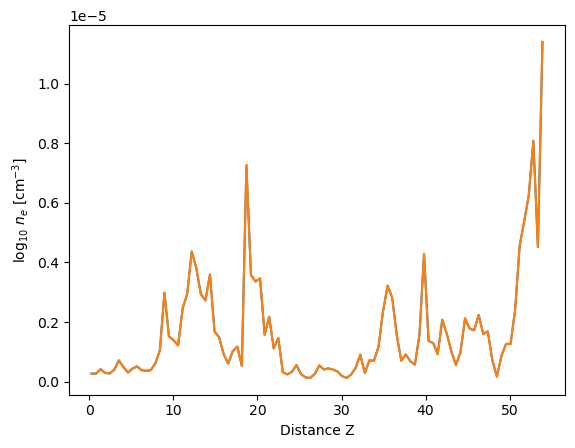

In [144]:
plt.plot(Bin_centers, ne_LC)

plt.plot(Bin_centers, ne_LC_Ion)
plt.xlabel('Distance Z')
plt.ylabel("$\mathrm{log}_{10}$ $n_e$ [cm$^{-3}$]")
plt.savefig('./n_e_LC.png')

0.0001222519364668127
0.00012225888673571023
0.00012226583976834615
0.00012227279414608552
0.00012227975022396768
0.0001222867080022973
0.00012229366748137854
0.00012230062866151628
0.0001223075915430152
0.00012231455612618037
0.00012232152241131657
0.00012232849039872824
0.00012233546008871962
0.00012234243148159817
0.0001223494045776664
0.00012235637937723135
0.0001223633558805966
0.00012237033408806766
0.00012237731399995094
0.00012238429561655132
0.00012239127893817368
0.0001223982639651229
0.00012240525069770686
0.00012241223913622918
0.0001224192292809947
0.00012242622113231268
0.00012243321469048536
0.0001224402099558185
0.0001224472069286213
0.00012245420560919864
0.00012246120599785238
0.00012246820809489216
0.00012247521190062761
0.00012248221741535583
0.00012248922463939035
0.0001224962335730365
0.00012250324421659783
0.00012251025657038141
0.00012251727063469602
0.00012252428640984608
0.00012253130389613953
0.0001225383230938808
0.0001225453440033778
0.00012255236662493934


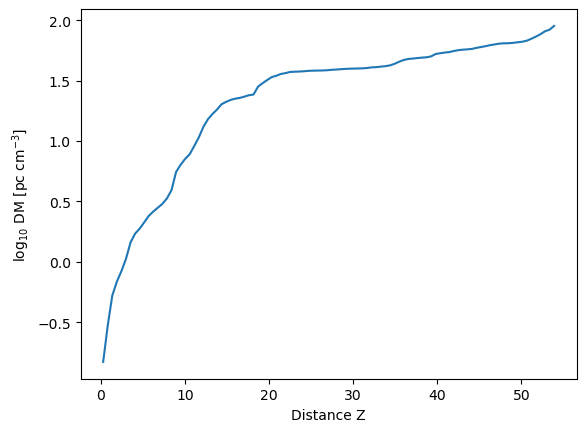

In [162]:
#################### 大尺度结构#################
z_list = np.array([output1 for output1, output2 in map(find_redshift_and_scale_factor, Bin_edges)])
a_list = np.array([output2 for output1, output2 in map(find_redshift_and_scale_factor, Bin_edges)])
dz = np.zeros(len(z_list))
dz =  z_list[1:] - z_list[:-1]
DM_IGM = np.zeros_like(dz)
#for j in range(len(DM1)):
for i in range(len(DM_IGM)-1):
    DM_IGM[0] = c/H_0*ne_LC[0]*(1+z_list[0])*dz[0]/np.sqrt(Omega_0*(1+z_list[0])**3+Omega_Lambda)*1e6
    DM_IGM[i+1] = DM_IGM[i] + c/H_0*ne_LC[i+1]*(1+z_list[i+1])*dz[i+1]/np.sqrt(Omega_0*(1+z_list[i+1])**3+Omega_Lambda)*1e6
    print(dz[i])
    #DM2[j][0] = c/H_0*n_e_arr[j][0]*(bin_edges[1] - bin_edges[0])*1e6
    #DM2[j][i+1] = DM2[j][i] + c/H_0*n_e_arr[j][i+1]*(bin_edges[i+2] - bin_edges[i+1])*1e6

     
plt.plot(Bin_centers, np.log10(DM_IGM))
plt.xlabel('Distance Z')
plt.ylabel("$\mathrm{log}_{10}$ DM [pc cm$^{-3}$]")
plt.savefig('./DM_LC.png')

In [ ]:
LC_length = sqrt(sum(LOS**2))
Bin_edges = np.linspace(0, LC_length, n_bins+1)
Bin_centers = (Bin_edges[:-1] + Bin_edges[1:]) / 2
Bin_centers_pos = np.array([u3*x for x in Bin_centers])
h_smooth_max = np.max(Smoothlen)

#################### 大尺度结构#################
z_list = np.array([output1 for output1, output2 in map(find_redshift_and_scale_factor, Bin_edges)]) #redshift
a_list = np.array([output2 for output1, output2 in map(find_redshift_and_scale_factor, Bin_edges)]) #scale factor
dz = np.zeros(len(z_list))
dz =  z_list[1:] - z_list[:-1]



X_num = 25
Y_num = 40
LC_num = 3
X_shift = np.linspace(0, Lbox, X_num+1)
Y_shift = np.linspace(0, Lbox, Y_num+1)
LC_origin = np.zeros([(X_num)*(Y_num),3])
for i in range(X_num):
    for j in range(Y_num):
        LC_origin[i*Y_num+j, 0] = X_shift[i]
        LC_origin[i*Y_num+j, 1] = Y_shift[j]
        LC_origin[i*Y_num+j, 2] = 0
        print(i*Y_num+j)
LC_shifted = np.array([Bin_centers_pos+x for x in LC_origin])
# Apply periodic boundary conditions to the x and y coordinates
LC_shifted[:, :, 0] %= L
LC_shifted[:, :, 1] %= L
LC_1000_1 = LC_shifted
# Apply wrap-around for x and y coordinates that are less than 0
LC_shifted[:, :, 0] += L * (LC_shifted[:, :, 0] < 0)
LC_shifted[:, :, 1] += L * (LC_shifted[:, :, 1] < 0)


ne_LC_shifted = np.zeros([LC_num, n_bins])
ne_LC_Ion_shifted = np.zeros([LC_num, n_bins])
for k in range(LC_num):
    for i in range(n_bins):
        idx_LC, dist_LC = find_particles_within_RV(sphpos, LC_shifted[k][i], h_smooth_max, Lbox)
        for j in range(len(idx_LC)):
            if idx_LC[j] >= len(sphpos):
                idx_LC[j] = idx_LC[j] - len(sphpos)
            if dist_LC[j] >=  Smoothlen[idx_LC[j]]:
                continue
            else:
                weight =  M6(dist_LC[j]*MpcTocm,0, Smoothlen[idx_LC[j]]*MpcTocm,3)
                ne_LC_shifted[k][i] += SPHmasstocgs[idx_LC[j]]*f_e[idx_LC[j]]/mp * weight
                ne_LC_Ion_shifted[k][i] += SPHmasstocgs[idx_LC[j]]*f_nHII[idx_LC[j]] * weight/mp + SPHmasstocgs[idx_LC[j]]*f_nHeII[idx_LC[j]]/mp * weight + SPHmasstocgs[idx_LC[j]]/2*f_nHeIII[idx_LC[j]]/mp * weight
        print("This is the %d steps" %(k*n_bins + i))

In [ ]:
import multiprocessing
for i in range(LC_num):
    plt.plot(Bin_centers, ne_LC3[i])

In [47]:
LC_shifted[0]
len(LC_origin)
X_Bound_shift = 0
Y_Bound_shift = 0
Z_Bound_shift = 0
X_shift = np.linspace(0, Lbox, X_num+1)
Y_shift = np.linspace(0, Lbox, Y_num+1)
LC_origin = np.zeros([(X_num)*(Y_num),3])
for i in range(X_num):
    for j in range(Y_num):
        LC_origin[i*Y_num+j, 0] = X_shift[i] + X_Bound_shift
        LC_origin[i*Y_num+j, 1] = Y_shift[j] + Y_Bound_shift
        LC_origin[i*Y_num+j, 2] = 0 + Z_Bound_shift

LC_origin

Bin_centers_pos

LC_shifted[:, :, 2]

array([[ 0.25,  0.75,  1.25, ..., 48.75, 49.25, 49.75],
       [ 0.25,  0.75,  1.25, ..., 48.75, 49.25, 49.75],
       [ 0.25,  0.75,  1.25, ..., 48.75, 49.25, 49.75],
       ...,
       [ 0.25,  0.75,  1.25, ..., 48.75, 49.25, 49.75],
       [ 0.25,  0.75,  1.25, ..., 48.75, 49.25, 49.75],
       [ 0.25,  0.75,  1.25, ..., 48.75, 49.25, 49.75]])

In [168]:
from joblib import Parallel, delayed
import multiprocessing
LC_length = sqrt(sum(LOS**2))
Bin_edges = np.linspace(0, LC_length, n_bins+1)
Bin_centers = (Bin_edges[:-1] + Bin_edges[1:]) / 2
Bin_centers_pos = np.array([u3*x for x in Bin_centers])
h_smooth_max = np.max(Smoothlen)



X_num = 25
Y_num = 40
LC_num = 10
X_shift = np.linspace(0, Lbox, X_num+1)
Y_shift = np.linspace(0, Lbox, Y_num+1)
LC_origin = np.zeros([(X_num)*(Y_num),3])
for i in range(X_num):
    for j in range(Y_num):
        LC_origin[i*Y_num+j, 0] = X_shift[i]
        LC_origin[i*Y_num+j, 1] = Y_shift[j]
        LC_origin[i*Y_num+j, 2] = 0
        print(i*Y_num+j)
LC_shifted = np.array([Bin_centers_pos+x for x in LC_origin])
# Apply periodic boundary conditions to the x and y coordinates
LC_shifted[:, :, 0] %= L
LC_shifted[:, :, 1] %= L
LC_1000_1 = LC_shifted
# Apply wrap-around for x and y coordinates that are less than 0
LC_shifted[:, :, 0] += L * (LC_shifted[:, :, 0] < 0)
LC_shifted[:, :, 1] += L * (LC_shifted[:, :, 1] < 0)

def calc_ne_LC_shifted(k, i, LC_shifted, sphpos, h_smooth_max, Lbox, SPHmasstocgs, f_e, mp, Smoothlen):
    ne_LC_shifted_k_i = 0
    ne_LC_Ion_shifted_k_i = 0
    idx_LC, dist_LC = find_particles_within_RV(sphpos, LC_shifted[k][i], h_smooth_max, Lbox)
    for j in range(len(idx_LC)):
        if idx_LC[j] >= len(sphpos):
            idx_LC[j] = idx_LC[j] - len(sphpos)
        if dist_LC[j] >= Smoothlen[idx_LC[j]]:
            continue
        else:
            weight = M6(dist_LC[j]*MpcTocm, 0, Smoothlen[idx_LC[j]]*MpcTocm, 3)
            ne_LC_shifted_k_i += SPHmasstocgs[idx_LC[j]]*f_e[idx_LC[j]]/mp * weight
            ne_LC_Ion_shifted_k_i += SPHmasstocgs[idx_LC[j]]*f_nHII[idx_LC[j]] * weight/mp + SPHmasstocgs[idx_LC[j]]*f_nHeII[idx_LC[j]]/mp * weight + SPHmasstocgs[idx_LC[j]]/2*f_nHeIII[idx_LC[j]]/mp * weight
    print("This is the %d steps" %(k*n_bins + i))
    return ne_LC_shifted_k_i, ne_LC_Ion_shifted_k_i



num_cores = multiprocessing.cpu_count()  # 获取CPU核数
results = Parallel(n_jobs=num_cores)(delayed(calc_ne_LC_shifted)(k, i, LC_shifted, sphpos, h_smooth_max, Lbox, SPHmasstocgs, f_e, mp, Smoothlen) for k in range(LC_num) for i in range(n_bins))
X_shift = np.linspace(0, Lbox, X_num+1)
Y_shift = np.linspace(0, Lbox, Y_num+1)
LC_origin = np.zeros([(X_num)*(Y_num),3])
ne_LC_shifted = np.zeros((LC_num, n_bins))
ne_LC_Ion_shifted = np.zeros((LC_num, n_bins))
for k in range(LC_num):
    for i in range(n_bins):
        ne_LC_shifted[k][i], ne_LC_Ion_shifted[k][i] = results[k*n_bins+i]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [169]:
#################### 大尺度结构#################
z_list = np.array([output1 for output1, output2 in map(find_redshift_and_scale_factor, Bin_edges)]) #redshift
a_list = np.array([output2 for output1, output2 in map(find_redshift_and_scale_factor, Bin_edges)]) #scale factor
dz = np.zeros(len(z_list))
dz =  z_list[1:] - z_list[:-1]
DM_IGM_num = len(dz)
DM_IGM_LC = np.zeros([LC_num, DM_IGM_num])
for i in range(LC_num):
    for j in range(DM_IGM_num-1):
        DM_IGM_LC[i][0] = c/H_0*ne_LC_shifted[i][0]*(1+z_list[0])*dz[0]/np.sqrt(Omega_0*(1+z_list[0])**3+Omega_Lambda)*1e6
        DM_IGM_LC[i][j+1] = DM_IGM_LC[i][j] + c/H_0*ne_LC_shifted[i][j+1]*(1+z_list[j+1])*dz[j+1]/np.sqrt(Omega_0*(1+z_list[j+1])**3+Omega_Lambda)*1e6
        
        #DM2[j][0] = c/H_0*n_e_arr[j][0]*(bin_edges[1] - bin_edges[0])*1e6
        #DM2[j][i+1] = DM2[j][i] + c/H_0*n_e_arr[j][i+1]*(bin_edges[i+2] - bin_edges[i+1])*1e6


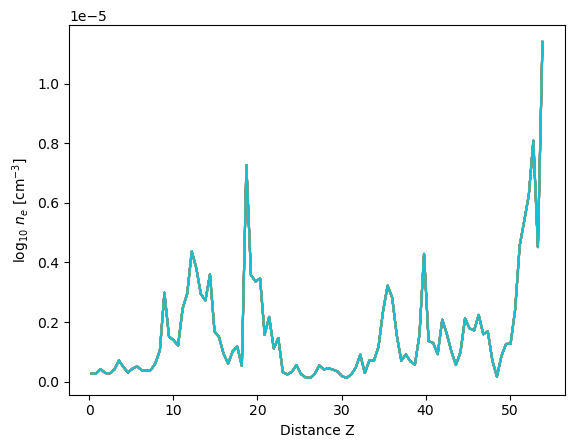

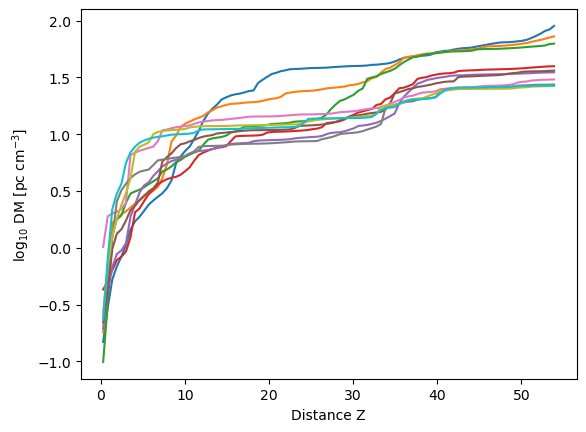

In [189]:

for i in range(LC_num):
    plt.plot(Bin_centers,ne_LC_shifted[0])
plt.xlabel('Distance Z')
plt.ylabel("$\mathrm{log}_{10}$ $n_e$ [cm$^{-3}$]")
plt.savefig('./ne_LC_100.png')
plt.show()

for i in range(LC_num):
    plt.plot(Bin_centers,np.log10(DM_IGM_LC[i]))
plt.xlabel('Distance Z')
plt.ylabel("$\mathrm{log}_{10}$ DM [pc cm$^{-3}$]")
plt.savefig('./DM_LC_100.png')
plt.show()

In [167]:
ne_LC_shifted[1]

array([3.31065346e-07, 6.95169104e-07, 2.04520464e-06, 2.49674677e-07,
       3.27273329e-07, 2.17795379e-07, 3.21219571e-07, 3.20525697e-07,
       3.04586447e-07, 4.12159832e-07, 2.68519900e-07, 3.74638600e-07,
       4.72045485e-07, 1.21640063e-06, 2.44249879e-06, 5.90771861e-06,
       2.02175700e-06, 3.32693213e-06, 1.62207489e-06, 9.40461285e-07,
       1.04201568e-06, 8.86332327e-07, 9.92168516e-07, 1.95643525e-06,
       1.24095830e-06, 1.71641556e-06, 7.88381126e-07, 9.24660631e-07,
       6.95927325e-07, 2.08267719e-07, 2.11350674e-07, 4.43250126e-07,
       2.20535928e-07, 1.58695498e-07, 2.58144765e-07, 7.02295567e-07,
       8.03173647e-07, 6.89260400e-07, 4.35171975e-07, 1.03326453e-06,
       2.77153501e-06, 8.17400437e-07, 5.63798161e-07, 4.67646998e-07,
       2.58639631e-07, 1.43746873e-07, 2.70022181e-07, 5.44574487e-07,
       6.44291104e-07, 9.13056992e-07, 4.54360197e-07, 3.39554942e-07,
       4.80603461e-07, 4.67793104e-07, 1.23186246e-06, 4.87261919e-07,
      

In [97]:
DM_IGM_LC[0]
ne_LC_shifted[1]

print(np.linspace(LC_length, 2*LC_length, n_bins+1))
np.linspace(0, LC_length, n_bins+1)

z_list = []
aa = np.array([[1,2,3],[4,5,6]])
print("Start storing results")
filename = 'DM_calculate.hdf5'
DM_IGM_LC = np.zeros([Box_num, LC_num, DM_IGM_num])
if os.path.exists(filename):
    os.remove(filename)
f = h5py.File(filename, "w")
f.create_dataset('DM_IGM', (Box_num, LC_num, n_bins), data = DM_IGM_LC)
f.close()



[ 54.16666667  54.70833333  55.25        55.79166667  56.33333333
  56.875       57.41666667  57.95833333  58.5         59.04166667
  59.58333333  60.125       60.66666667  61.20833333  61.75
  62.29166667  62.83333333  63.375       63.91666667  64.45833333
  65.          65.54166667  66.08333333  66.625       67.16666667
  67.70833333  68.25        68.79166667  69.33333333  69.875
  70.41666667  70.95833333  71.5         72.04166667  72.58333333
  73.125       73.66666667  74.20833333  74.75        75.29166667
  75.83333333  76.375       76.91666667  77.45833333  78.
  78.54166667  79.08333333  79.625       80.16666667  80.70833333
  81.25        81.79166667  82.33333333  82.875       83.41666667
  83.95833333  84.5         85.04166667  85.58333333  86.125
  86.66666667  87.20833333  87.75        88.29166667  88.83333333
  89.375       89.91666667  90.45833333  91.          91.54166667
  92.08333333  92.625       93.16666667  93.70833333  94.25
  94.79166667  95.33333333  95.875      

101

(2, 100)
0
1


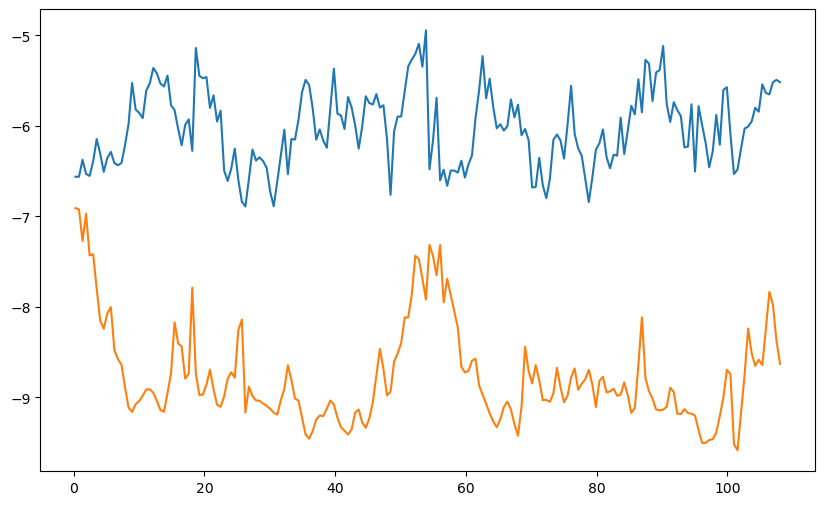

In [76]:
LC_num = 2
f = h5py.File("DM_calculate.hdf5", "r")
Distance = np.array(f['Distance'])
Redshift = np.array(f['Redshift'])
scalefactor = np.array(f['Scale_factor'])
ne_IGM= np.array(f['ne_IGM'])
ne_IGM_Ion= np.array(f['ne_IGM'])
DM_IGM= np.array(f['DM_IGM'])
print(Distance.shape)
Distance_flat = Distance.flatten()
#ne_IGM_flat = ne_IGM[:][][:].flatten()
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()
for i in range(LC_num):
    ax.plot(Distance_flat, ne_IGM[:][i][:].flatten())
    print(i)

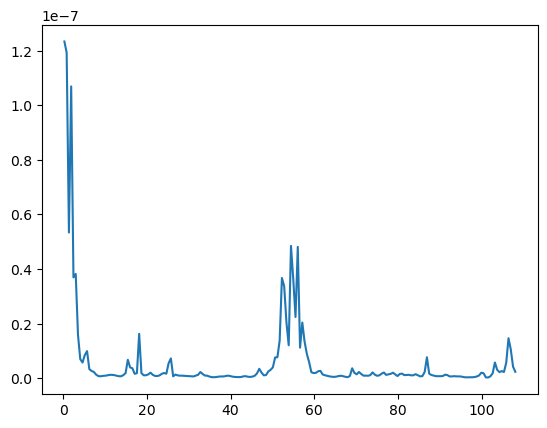

In [75]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(Distance_flat, ne_IGM[:][1][:].flatten())
plt.show()

In [49]:
import h5py
LC_num = 1000
Box_num = 2
n_bins = 100
# 创建hdf5文件
filename = 'example.hdf5'
if os.path.exists(filename):
    os.remove(filename)
f = h5py.File(filename, "w")

# 创建一个数据集
dset = f.create_dataset('data', data=[1, 2, 3])

# 给数据集添加一个属性
dset.attrs['Light_cone_number'] = str(LC_num)
dset.attrs['Box_number'] = str(Box_num)
dset.attrs['LOS_bins'] = str(n_bins)
# 关闭hdf5文件
f.close()



In [54]:
f = h5py.File("DM_calculate.hdf5", "r")
ne_IGM= np.array(f['ne_IGM'])
ne_IGM[:][0][:]

(2, 100)

In [ ]:
for i in range(len(snapfile)):
    NHII = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights= data[i]["n_HII"])[0]
    NHI = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=data[i]["n_HI"])[0]
    Ne = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=data[i]["n_e"])[0]
    NDI = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=data[i]["n_DI"])[0]
    NDII = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=data[i]["n_DII"])[0]
    NHeI = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=data[i]["n_HeI"])[0]
    NHeII = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=data[i]["n_HeII"])[0]
    NHeIII = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=data[i]["n_HeIII"])[0] 
    NH2I = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=data[i]["n_H2I"])[0]  
    NH2II = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=data[i]["n_H2II"])[0] 
    #make Star coordinate bin
    SPHmass_o = data[i]["sphmass"]
    sphX = data[i]["sphX"]*h
    sphY = data[i]["sphY"]*h
    sphZ = data[i]["sphZ"]*h
    sphX_min = np.min(sphX)
    sphX_max = np.max(sphX)
    sphY_min = np.min(sphY)
    sphY_max = np.max(sphY)
    sphZ_min = np.min(sphZ)
    sphZ_max = np.max(sphZ)
    Bin_num = 200
    sphX_bins = np.linspace(sphX_min, sphX_max, Bin_num)
    sphY_bins = np.linspace(sphY_min, sphY_max, Bin_num)
    sphZ_bins = np.linspace(sphZ_min, sphZ_max, Bin_num)

    #made Star coordinate bin
    starX = data[i]["starX"]*h
    starY = data[i]["starY"]*h
    starZ = data[i]["starZ"]*h
    starX_min = np.min(starX)
    starX_max = np.max(starX)
    starY_min = np.min(starY)
    starY_max = np.max(starY)
    starZ_min = np.min(starZ )
    starZ_max = np.max(starZ )

    starX_bins = np.linspace(starX_min, starX_max, Bin_num)
    starY_bins = np.linspace(starY_min, starY_max, Bin_num)
    starZ_bins = np.linspace(starZ_min, starZ_max, Bin_num)       

In [ ]:

for i in range(LC_num):
    plt.plot(Bin_centers, ne_LC_Ion_shifted[i])

In [58]:
Distance_flat.shape

(200,)

In [56]:
ne_IGM[:][0][:].flatten()

array([2.74017434e-07, 2.73774157e-07, 4.22596920e-07, 2.94621805e-07,
       2.79650952e-07, 4.05538413e-07, 7.15917851e-07, 4.92498173e-07,
       3.10514985e-07, 4.42590107e-07, 5.15500593e-07, 3.87543515e-07,
       3.67000632e-07, 3.88975166e-07, 6.12197948e-07, 1.04948687e-06,
       2.98571982e-06, 1.51925944e-06, 1.39366039e-06, 1.21910095e-06,
       2.45843919e-06, 2.95051560e-06, 4.37245761e-06, 3.81133619e-06,
       2.93981752e-06, 2.72552719e-06, 3.59993727e-06, 1.68778757e-06,
       1.49533819e-06, 9.29246104e-07, 6.10595779e-07, 1.02495952e-06,
       1.17924952e-06, 5.29788869e-07, 7.26424312e-06, 3.58016481e-06,
       3.36159229e-06, 3.46698627e-06, 1.57864563e-06, 2.17633165e-06,
       1.11602116e-06, 1.46866170e-06, 3.20823475e-07, 2.46291327e-07,
       3.36288481e-07, 5.60885515e-07, 2.53908373e-07, 1.45433045e-07,
       1.28507749e-07, 2.59699036e-07, 5.47925822e-07, 4.13885070e-07,
       4.48986809e-07, 4.07700335e-07, 3.44107691e-07, 1.87924336e-07,
      

In [ ]:
Ne_c = sphmass_g[0]*f_e_within[0]/mp

Ne_c/SPHrho[0]*sphmass_g[0]*f_e_within[0]*weight_within

In [ ]:
SPHrho[0]*f_e_within[0]

sphmass_g[0]*f_e_within[0]

f_nHI_within = data[0]['n_HI'][idx]
f_nHII_within = data[0]['n_HII'][idx]
f_nHeI_within = data[0]['n_HeI'][idx]
f_nHeII_within = data[0]['n_HeII'][idx]
f_nHeIII_within = data[0]['n_HeIII'][idx]

print(f_e_within[0])

print(f_nHI_within[0] + f_nHII_within[0] + 0.5*f_nHeI_within[0]+ 0.5*f_nHeII_within[0]+ 0.5*f_nHeIII_within[0])

In [ ]:
from scipy.spatial.transform import Rotation
from math import atan2, degrees
def rotation_matrix(angle, axis):
    """计算绕着某个坐标轴旋转某个角度的旋转矩阵"""
    sina = np.sin(angle)
    cosa = np.cos(angle)
    if axis == 0:
        # 绕X轴旋转
        R = np.array([[1, 0, 0], [0, cosa, -sina], [0, sina, cosa]])
    elif axis == 1:
        # 绕Y轴旋转
        R = np.array([[cosa, 0, -sina], [0, 1, 0], [sina, 0, cosa]])
    elif axis == 2:
        # 绕Z轴旋转
        R = np.array([[cosa, sina, 0], [-sina, cosa, 0], [0, 0, 1]])
    return R

def find_los_through_sphere(Halo_c_pos, los_vec, smooth_len):

    center = Halo_c_pos
    
    # 球面半径为平滑长度
    radius = smooth_len
    
    # 存储穿过球面的LOS的索引
    through_indices = []
    
    # 遍历所有LOS
    for i in range(len(los_vec)):
        # 获取当前LOS的方向向量
        direction_vec = los_vec[i]
        
        # 将方向向量单位化
        direction_vec /= np.linalg.norm(direction_vec)
        
        # 沿着LOS的方向向量延长LOS
        # 延长长度应该取一个足够大的值，比如1e10，以确保延长后的LOS一定会穿过球面
        end_point = direction_vec * 1e10
        
        # 判断当前LOS是否与球面有交点
        center = Halo_c_pos
        center_to_origin = center - [0, 0, 0]
        
        # 计算LOS与球的交点
        a = np.dot(direction_vec, direction_vec)
        b = 2 * np.dot(direction_vec, center_to_origin)
        c = np.dot(center_to_origin, center_to_origin) - radius**2

        # 计算判别式
        delta = b**2 - 4*a*c
        
        if delta >= 0:
            print(i)
            print(delta)
            print(center)
            print(direction_vec)
            print(radius)
            # 如果判别式大于等于0，则说明当前LOS穿过了球面
            through_indices.append(i)
            
    return through_indices
Halo_c_pos = new_sphpos[idx] - halo_center
Smoothlen = data[0]['smoothlen']
Smoothlen_halo_c = Smoothlen[idx]
line = find_los_through_sphere(Halo_c_pos[0], los_vecs, Smoothlen_halo_c[0])

In [ ]:
SPHdensitytocgs

data[0]["rho"]*solar_mass_in_g*1e10/Mpctocm**3/sphmass_g[0]*f_e_within[0]

weight_within

sphmass_g

In [ ]:
def rotation_matrix(angle, axis):
    """计算绕着某个坐标轴旋转某个角度的旋转矩阵"""
    sina = np.sin(angle)
    cosa = np.cos(angle)
    if axis == 0:
        # 绕X轴旋转
        R = np.array([[1, 0, 0], [0, cosa, -sina], [0, sina, cosa]])
    elif axis == 1:
        # 绕Y轴旋转
        R = np.array([[cosa, 0, -sina], [0, 1, 0], [sina, 0, cosa]])
    elif axis == 2:
        # 绕Z轴旋转
        R = np.array([[cosa, sina, 0], [-sina, cosa, 0], [0, 0, 1]])
    return R

proj_vecs = los_vecs[:, :2]
proj_vecs = proj_vecs / np.linalg.norm(proj_vecs, axis=1, keepdims=True)
# 计算每个LOS在X-Y平面上的旋转角度
phis = np.arctan2(proj_vecs[:, 1], proj_vecs[:, 0])

#for i in range(len(los_vecs)):
  #  los_vecs[i] = rotation_matrix(-phis[i]) @ los_vecs[i]

# 再将los_vecs按照X轴进行旋转
# 计算每个LOS与X轴的夹角
thetas = np.arctan2(los_vecs[:, 1], los_vecs[:, 0])
phi = np.arctan2(1,1)

rotation_matrix(phi, 2)@np.array([1,1,0])
np.array([0,0,1])@rotation_matrix(np.pi/4, 1)

In [59]:
idx
print(new_sphpos[idx[1]])
len(new_sphpos[idx])


[14.47058702  9.28149953  0.2027548 ]


IndexError: index 180402 is out of bounds for axis 0 with size 2

In [61]:
i


180402

In [ ]:
#data[0]['n_HII'][idx_los]+data[0]['n_HeII'][idx_los]+2*data[0]['n_HeIII'][idx_los]
#data[0]['n_HeIII'][idx_los]

#sphmass[idx_los]*
#data[0]['n_HII'][idx_los]+data[0]['n_HeII'][idx_los]+data[0]['n_HeIII'][idx_los]

D_C_halo = bin_edges[1:] - bin_edges[0]
z1 = 2
zz = np.zeros(len(D_C_halo))
aa = np.zeros(len(D_C_halo))
dz = np.zeros(len(D_C_halo) -1 )
DM1 = np.zeros_like(n_e_arr)
DM2 = np.zeros_like(n_e_arr)
#################### 大尺度结构#################
#for j in range(len(n_e_arr)):
   # for i in range(len(D_C_halo)-1):
        #zz[i], aa[i] = find_redshift_and_scale_factor(D_C_halo[i])
        #zz[i+1], aa[i+1] = find_redshift_and_scale_factor(D_C_halo[i+1])
        #dz[i] = zz[i+1] - zz[i]
        #DM1[j][0] = c/H_0*n_e_arr[j][0]*(1+z1)*dz[0]/np.sqrt(Omega_0*(1+z1)**3+Omega_Lambda)*1e6
        #DM1[j][i+1] = DM1[j][i] + c/H_0*n_e_arr[j][i+1]*(1+z1)*dz[i]/np.sqrt(Omega_0*(1+z1)**3+Omega_Lambda)*1e6
        #DM2[j][0] = c/H_0*n_e_arr[j][0]*(bin_edges[1] - bin_edges[0])*1e6
        #DM2[j][i+1] = DM2[j][i] + c/H_0*n_e_arr[j][i+1]*(bin_edges[i+2] - bin_edges[i+1])*1e6
dl = bin_edges[1:] - bin_edges[:-1]
####################Host Galaxy#################
for j in range(len(n_e_arr)):
    for i in range(len(D_C_halo)-1):
        #zz[i], aa[i] = find_redshift_and_scale_factor(D_C_halo[i])
        #zz[i+1], aa[i+1] = find_redshift_and_scale_factor(D_C_halo[i+1])
        #dz[i] = zz[i+1] - zz[i]
        DM1[j][0] = n_e_arr[j][0]*dl[0]*MpcTocm
        DM1[j][i+1] = DM1[j][i] + n_e_arr[j][i+1]*dl[i+1]*MpcTocm
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(LINE**2):
    ax.plot(bin_edges[:-1] + d_bin/2,  DM1[i], alpha=0.5)
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.01,1)
#ax.set_ylim(1e-6,1e0)
ax.set_xlabel('Distance along LOS [Mpc/h]')
ax.set_ylabel('DM(<R)[pc cm$^{-3}$]')
plt.show()




In [60]:
n_e_arr[0]
DM1[j][0]

n_e_arr[j][:]
i

NameError: name 'n_e_arr' is not defined

In [ ]:
(c/H0).to_value(u.pc*u.s/u.cm)

len(D_C_halo) -1 

c/H_0*n_e_arr[0]*(1+z1)*dz[0]/np.sqrt(Omega_0*(1+z1)**3+Omega_Lambda)*1e6

DM2

n_e_arr[90]
print(len(DM1))

LINE**2

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(LINE**2):
    ax.plot(bin_edges[:-1] + d_bin/2,  n_e_arr[i], alpha=0.5)
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.00001,6)
ax.set_ylim(1e-8,1e1)
ax.set_xlabel('Distance along LOS (Mpc/h)')
ax.set_ylabel('Electron Density (cm$^{-3}$)')
plt.savefig('./Electron_densty_Halo.png')
plt.show()


In [ ]:
def periodic_unit_vector(x, center, L):
    """Calculate the unit vector considering the periodic boundary condition."""
    diff = x - center
    diff = diff - np.round(diff / L) * L
    return diff

# Get particles within RV and their distances
idx, dist = find_particles_within_RV(sphpos, halo_center, Rd, Lbox)
d_bin = np.diff(bin_edges)


idx1 = idx.copy()
# Correct indices for periodic boundary conditions
idx1[idx1 >= len(sphpos)] -= len(sphpos)

# Define LOS vector and project positions onto it
proj_los = np.abs(np.dot(sphpos[idx1]-halo_center, los_vecs.T))
los_idx = np.argmin(proj_los, axis=1)

# 找到每个粒子所处的 LOS 对应的 bin
#los_dist = np.zeros_like(proj_los)
los_dist = np.zeros(len(idx))
#los_dist = proj_pos[np.arange(len(idx)), los_idx]
new_sphpos = sphpos.copy()
los_1 = []
los_2 = []
for i in range(len(idx)):
    if idx[i] < len(sphpos):
        # Define LOS vector and project positions onto it
        proj_los[i] = np.abs(np.dot(sphpos[idx[i]]-halo_center, los_vecs.T))
        los_idx[i] = np.argmax(proj_los[i])
        los_dist[i] = proj_los[i, los_idx[i]]
        #los_dist[i] = np.abs(np.dot(sphpos[idx[i]]-halo_center, closest_los_vecs))
        #los_1.append(los_dist[i, los_idx[i]])
        los_1.append(los_dist[i])
    else:
        idx[i] = idx[i] - len(sphpos)
        new_sphpos[idx[i]]  = periodic_unit_vector(sphpos[idx[i]], [0,0,0], Lbox)
        proj_los[i] = np.abs(np.dot(new_sphpos[idx[i]] - halo_center, los_vecs.T))
        los_idx[i] = np.argmax(proj_los[i])
        los_dist[i] = proj_los[i, los_idx[i]]
        #los_dist[i] = np.abs(np.dot(sphpos[idx[i]]-halo_center, closest_los_vecs))
        #los_2.append(los_dist[i, los_idx[i]])
        los_2.append(los_dist[i])
los_bin_idx = np.digitize(los_dist, bin_edges) - 1
nlos = LINE**2

# 将粒子索引按照所处的 LOS 进行分组
idx_groups = [np.where(los_idx == i)[0] for i in range(nlos)]
# 对于每个 LOS 分组，计算电子数密度
n_e_arr = np.zeros((nlos, n_bins))
for i in range(nlos):
    idx_los = idx_groups[i]
    if len(idx_los) == 0:
        continue
    los_bin_idx_los = los_bin_idx[idx_los]
    n_e_arr[i] = np.bincount(los_bin_idx_los, weights=sphmass[idx_los]*data[0]['n_e'][idx_los]/bin_volumes[los_bin_idx_los], minlength=n_bins)
    # Calculate electron density for each bin along the LOS
# Plot the electron density for each LOS
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(LINE**2):
    ax.plot(bin_edges[:-1] + d_bin/2,  n_e_arr[i], alpha=0.5)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.001, 1)
ax.set_xlabel('Distance along LOS (Mpc/h)')
ax.set_ylabel('Electron Density (cm$^{-3}$)')
plt.show()

In [ ]:
idx_los = idx_groups[0]
los_bin_idx_los = los_bin_idx[idx_los]

n_bins
idx_los = idx_groups[0]
los_bin_idx_los = los_bin_idx[idx_los]
np.bincount(los_bin_idx_los, weights=sphmass[idx_los]*data[0]['n_e'][idx_los], minlength=n_bins)

arr = [0, 1, 1, 2, 2, 2]
np.bincount(arr, weights=np.array([1,1,1,1,1,1])/[0.5,1,1,2,2,2], minlength=2)
bin_volumes

In [ ]:
np.where(los_idx == 0)[0]

los_idx[22581]
idx_groups[0]
los_bin_idx[idx_groups[0]]
idx_los = idx_groups[0]
bin_volumes


In [ ]:
np.sqrt(sum((new_sphpos[idx[34829]] -  halo_center)**2))
los_vecs*np.dot(new_sphpos[idx[34829]] - halo_center, los_vecs.T)[:, np.newaxis]


np.round(x0/70)*70
x0

In [ ]:

HI_mass = data[0]["n_HI"]*data[0]['sphmass'] 
HII_mass =  data[0]["n_HII"]*data[0]['sphmass']
HeI_mass = data[0]["n_HeI"]*data[0]['sphmass'] 
HeII_mass =  data[0]["n_HeII"]*data[0]['sphmass']
HeIII_mass =  data[0]["n_HeIII"]*data[0]['sphmass']
total_mass = sum(data[0]['sphmass'])

HI_total_mass = sum(HI_mass)
HII_total_mass = sum(HII_mass)
HeI_total_mass = sum(HeI_mass)
HeII_total_mass = sum(HeII_mass)
HeIII_total_mass = sum(HeIII_mass)


Y_H_total = (HII_total_mass + HI_total_mass)/total_mass
Y_He_total = (HeI_total_mass + HeII_total_mass+ HeIII_total_mass)/total_mass

Y_H = (HII_mass + HI_mass)/data[0]['sphmass'] 
Y_He = (HeI_mass + HeII_mass+ HeIII_mass)/data[0]['sphmass'] 


f_IGM
X_H = HII_mass/(HI_mass + HI_mass)
X_He = HeII_mass+2*HeIII_mass/(HeI_mass + HeII_mass + HeIII_mass)
#z0 
#h 
#Omega_b
#Omega_0 
#Omega_Lamda
#comoving 

dS = dx*dz
SPHMasses, xedges, zedges = histogram2d(sphX, sphZ, bins = [sphX_bins, sphZ_bins], weights = (data[0]["sphmass"]))
SPHHIIMasses, xedges, zedges = histogram2d(sphX, sphZ, bins = [sphX_bins, sphZ_bins], weights = (HII_mass))
SPHHeII_HeIIIMasses, xedges, zedges = histogram2d(sphX, sphZ, bins = [sphX_bins, sphZ_bins], weights = (HeII_mass+2*HeIII_mass))
SPHHMasses, xedges, zedges = histogram2d(sphX, sphZ, bins = [sphX_bins, sphZ_bins], weights = (HI_mass+HII_mass))
SPHHeMasses, xedges, zedges = histogram2d(sphX, sphZ, bins = [sphX_bins, sphZ_bins], weights =  (HeII_mass+2*HeIII_mass))
SPHY_H = SPHHMasses/SPHMasses
SPHY_He = SPHHeMasses/SPHMasses
SPHX_H = SPHHIIMasses/SPHHMasses
SPHX_He = SPHHeII_HeIIIMasses/SPHHeMasses

SPHHIIMasses, xedges, zedges = histogram2d(sphX, sphZ, bins = [sphX_bins, sphZ_bins], weights = (HII_mass))
SPHHeII_HeIIIMasses, xedges, zedges = histogram2d(sphX, sphZ, bins = [sphX_bins, sphZ_bins], weights = (HeII_mass+2*HeIII_mass))
SPHX_H, xedges, zedges = histogram2d(sphX, sphZ, bins = [sphX_bins, sphZ_bins], weights = HII_mass/(HI_mass + HI_mass) )
SPHX_He, xedges, zedges = histogram2d(sphX, sphZ, bins = [sphX_bins, sphZ_bins], weights = (HeI_mass+ HeII_mass+ HeIII_mass)/data[0]['sphmass'] )

DM = 3*c*H0*Omega_b*f_IGM/(8*np.pi*G*m_p)*(SPHY_H*SPHX_H + SPHY_He*SPHX_He/2)*0.0165/(Omega_0*(1+z0)**3+Omega_Lamda)**0.5
DM = DM.to(u.pc/u.cm**3).value
logDM = np.log10(DM)
X, Z = np.meshgrid(xedges, zedges)
hh = plt.pcolormesh(X, Z, logDM.T, cmap='rainbow')
plt.xlabel(r"X [Mpc]")
plt.ylabel(r"Y [Mpc]")
cb = plt.colorbar(hh)
cb.set_label('log$_{10}$ DM$_{\mathrm{IGM}}$ [pc cm$^{-3}$] ')  #设置colorbar的标签字体
plt.savefig('DM.png', bbox_inches="tight")
plt.show()  
plt.close()


In [ ]:

##############################2D mass distribution#####################
me = 9.1*10**-28
mH = 1.67*10**-24
solartog = 2.0*10**33
def M6(r,r0, h, D):
    import numpy as np
    from numpy import pi, sqrt, exp
    ##########D = dimension#######
    ##########h = smoothing length########
    d = np.sqrt((r-r0)**2)
    q = d/h
    V = [2.0, 2*pi*d, 4*pi*d**2]
    sigma = [1.0/120, 7.0/(478.0*np.pi), 1.0/(120*np.pi)]
    if q >= 0 and q < 1:
        w = (3.0 - q)**5 - 6*(2-q)**5+15*(1-q)**5
    elif q >= 1 and q < 2:
        w = (3.0 - q)**5 - 6*(2-q)**5
    elif q >= 2 and q < 3:
        w = (3.0 - q)**5
    else:
        w = 0
    W =  h**(-D)*sigma[D-1]*w
    return W

def Gauss(r, r0, h, D):
    from numpy import pi, sqrt, exp
    d = sqrt((r-r0)**2)
    V = [2.0, 2*pi*d, 4*pi*d**2]
    sigma = [1/sqrt(pi), 1/pi, 1.0/(pi*sqrt(pi))]
    W = h**(-D)*sigma[D-1]*exp(-(r-r0)**2/h**2)
    W = W*V[D-1]
    return W

sphX = data[0]["sphX"]
sphZ = data[0]["sphZ"]
sphX_min = np.min(data[0]["sphX"])
sphX_max = np.max(data[0]["sphX"])
sphZ_min = np.min(data[0]["sphZ"])
sphZ_max = np.max(data[0]["sphZ"])

Bin_num = 200
sphX_bins = np.linspace(sphX_min, sphX_max, Bin_num)
sphZ_bins = np.linspace(sphZ_min, sphZ_max, Bin_num)

Smoothlen = data[0]['smoothlen']
dx = sphX_bins[1] - sphX_bins[0]
dz = sphZ_bins[1] - sphZ_bins[0]
diag = np.sqrt(2)/2*dx
for i in range(len(Smoothlen)):
    Smoothlen[i] = max(Smoothlen[i], diag)   
#h_L_max = np.ceil(np.max(data[0]['smoothlen']/diag)) ######向上取整
#gird_num = h_L_max + 1
dS = dx*dz
sphX_bin_mid = (sphX_bins + np.roll(sphX_bins, -1))[0:-1] / 2      ###
sphZ_bin_mid = (sphZ_bins + np.roll(sphZ_bins, -1))[0:-1] / 2
sph_pos_mid = [sphX_bin_mid[0:-1], sphZ_bin_mid[0:-1]]
##sphX_bin_mid  = sphX_bin_mid[0:-1] 
#sphZ_bin_mid = sphZ_bin_mid[0:-1]
SPHmass_o = data[0]["sphmass"] #################The SPHmass not considering the Smoothing length###########
SPHrho = data[0]["rho"]*SPHdensitytocgs
#SPHmasses0 = np.zeros(len(sphZ_bin_mid) - 1)###########Non-normalization
#SPHmasses = np.zeros(len(sphZ_bin_mid) - 1)###########Normalization
SPHrho_column0 =  np.zeros([len(sphX_bin_mid), len(sphZ_bin_mid) ])###########Non-normalization
SPHrho_column =  np.zeros([len(sphX_bin_mid), len(sphZ_bin_mid) ])###########Normalization
#d = np.zeros(len(sphZ_bin_mid))
D = 3###################Dimension
#for i in range(len(SPHmass_o)):
    #for j in range(len(SPHmasses)):
        #d0 = np.sqrt((sphZ[i] - sphZ_bin_mid[j])**2 + (sphX[i] - sphX_bin_mid[j])**2) ##########line distance
        #k = (sphZ[i] - sphZ_bin_mid[j])/(sphX[i] - sphX_bin_mid[j])     ########slope
        #if k <= 0.5:
            #z0 = sphZ[i] - k*(sphX[i] - sphX_min)
            #ze = sphZ[i] - k*(sphX[i] - sphX_max)
            #d_tot = np.sqrt((ze - z0)**2+ (sphX_max - sphX_min)**2)
        #if k > 0.5:
            #x0 = sphX[i] - (sphZ[i] - sphZ_min)/k
            #xe = sphX[i] - (sphZ[i] - sphZ_max)/k
            #d_tot = np.sqrt((xe - x0)**2+ (sphZ_max - sphZ_min)**2)
        #if d_tot > 0.5*d0:
            #d[j] = d0
        #else:
            #d[j] = d_tot - d0             #############distance across the bondary
        #SPHmasses0[j] = SPHmass_o[i]*M6(d[j],0,Smoothlen[i], D)*dS
    #for j in range(len(SPHmasses)):
        #SPHmasses[j] = SPHmass_o[i]*M6(d[j],0,Smoothlen[i], D)*dS/sum(SPHmasses0)
    #if i%100000 == 0:
        #print("it's  the %d step"  %i )
    
tot_mm = 0
for h in range(len(SPHmass_o)):
    total_mass = 0
    total_mass_new = 0
    p_x = bisect.bisect(sphX_bins, sphX[h])-1
    p_z = bisect.bisect(sphZ_bins, sphZ[h])-1
    si = np.ceil(Smoothlen[h]/diag)
    if si%2 == 0:          ##########全部取奇数格子
        grid_num = (si + 1)**2
        Mi = si + 1
    if si%2 == 1:
        grid_num = (si + 2)**2
        Mi = si + 2
    lb = int((Mi- 1)/2)        ##########边界距离中心的格子数量
    X_index = np.linspace(p_x-lb,p_x+lb,2*lb+1)
    Z_index = np.linspace(p_z-lb,p_z+lb,2*lb+1)
    X_index = X_index.astype(int)
    Z_index = Z_index.astype(int)
    box_len = 2*lb+1
    grid_xb_max = Bin_num-1
    grid_xb_min = 0
    grid_zb_max = Bin_num-1
    grid_zb_min = 0
    d = np.zeros([len(X_index), len(Z_index)])
    if (p_x <=lb) or (p_x >= grid_xb_max - lb) or (p_z <= lb) or (p_z >= grid_zb_max - lb): ########边界处的格子
        for i in range(box_len):
            if X_index[i]< 0:
                X_index[i] = grid_xb_max+X_index[i]
            if Z_index[i]< 0:
                Z_index[i] = grid_zb_max+Z_index[i]
            if X_index[i]>= grid_xb_max:
                X_index[i] = X_index[i] - grid_xb_max
            if Z_index[i]>= grid_zb_max:
                Z_index[i] = Z_index[i] - grid_zb_max
        for i in range(len(X_index)):
            for j in range(len(Z_index)):
                d0 = np.sqrt((sphZ[h] - sphZ_bin_mid[Z_index[j]])**2 + (sphX[h] - sphX_bin_mid[X_index[i]])**2) ##########line distance
                if sphX[h] - sphX_bin_mid[X_index[j]] == 0: ###########垂直于网格的连线
                    d_tot = sphX_max - sphX_min
                else: 
                    k = abs((sphZ[h] - sphZ_bin_mid[Z_index[j]])/(sphX[h] - sphX_bin_mid[X_index[i]]))   ########slope
                    if k <= 1:
                        #z0 = sphZ[h] - k*(sphX[h] - sphX_min)
                        #ze = sphZ[h] - k*(sphX[h] - sphX_max)
                        theta = atan(k)
                        #d_tot = np.sqrt((ze - z0)**2+ (sphX_max - sphX_min)**2)
                        d_tot = (sphX_max - sphX_min)/cos(theta)
                    if k > 1:
                        #x0 = sphX[h] - (sphZ[h] - sphZ_min)/k
                        #xe = sphX[h] - (sphZ[h] - sphZ_max)/k
                        theta = atan(k)
                        #d_tot = np.sqrt((xe - x0)**2+ (sphZ_max - sphZ_min)**2)
                        d_tot = (sphZ_max - sphZ_min)/sin(theta)
                if d0<0.5*d_tot:
                    d[i][j] = d0
                else:
                    d[i][j] = d_tot - d0             #############distance across the bondary
                SPHrho_column0[X_index[i]][Z_index[j]] += SPHmass_o[h]/Smoothlen[h]**2*F_xy(d[i][j]/Smoothlen[h])
                total_mass += SPHmass_o[h]/Smoothlen[h]**2*F_xy(d[i][j]/Smoothlen[h])*dS
    else:
        for i in range(len(X_index)):
            for j in range(len(Z_index)):
                d0 = np.sqrt((sphZ[h] - sphZ_bin_mid[Z_index[j]])**2 + (sphX[h] - sphX_bin_mid[X_index[i]])**2) ##########line distance
                d[i][j] =  d0
                SPHrho_column0[X_index[i]][Z_index[j]] += SPHmass_o[h]/Smoothlen[h]**2*F_xy(d[i][j]/Smoothlen[h])
                total_mass += SPHmass_o[h]/Smoothlen[h]**2*F_xy(d[i][j]/Smoothlen[h])*dS
    for i in range(len(X_index)):
        for j in range(len(Z_index)):
            SPHrho_column[X_index[i]][Z_index[j]] +=  SPHmass_o[h]/Smoothlen[h]**2*F_xy(d[i][j]/Smoothlen[h])*SPHmass_o[h]/total_mass
            total_mass_new +=  SPHmass_o[h]/Smoothlen[h]**2*F_xy(d[i][j]/Smoothlen[h])*SPHmass_o[h]/total_mass*dS
            #print(SPHrho_column[X_index[i]][Z_index[j]]*dS)
            #print(total_mass_new)
    tot_mm += total_mass_new
    if h%10000 == 0:
        print("it's  the %d step"  %h )
        #print("px = %f" %p_x)
        #print("pz = %f"  %p_z)
        #print("Smoothlength is %f" %Smoothlen[h])
        #print("X_index = ", X_index)
        #print("Z_index = ", Z_index)
        #print('Z_position', sphZ[h])
        #print('X_position', sphX[h])
        if Smoothlen[h]/diag >= 3:
            print('distance = ', d)
            #print('total_distance = %f' %d_tot)
            print('total_mass_1 and initial mass =',total_mass_new, SPHmass_o[h])
        #for i in range(len(X_index)):
            #for j in range(len(Z_index)):
                #print("box_position ", X_index[i], Z_index[j])

        



In [ ]:
#############################3D+2D mass_distribution################
me = 9.1*10**-28
mH = 1.67*10**-24
solartog = 2.0*10**33
def M6(r,r0, h, D):
    import numpy as np
    from numpy import pi, sqrt, exp
    ##########D = dimension#######
    ##########h = smoothing length########
    d = np.sqrt((r-r0)**2)
    q = d/h
    V = [2.0, 2*pi*d, 4*pi*d**2]
    sigma = np.array([1.0/120*3, 7.0/(478.0*np.pi)*3**2, 1.0/(120*np.pi)*3**3])
    if q >= 0 and q < 1.0/3:
        w = (3.0)**5*(1.0 - q)**5 - 6*(3.0)**5*(2.0/3-q)**5+15*(3)**5*(1.0/3-q)**5
    elif q >= 1.0/3 and q < 2.0/3:
        w = (3.0)**5*(1.0 - q)**5 - 6*(3.0)**5*(2.0/3-q)**5
    elif q >= 2.0/3 and q < 1.0:
        w = (3.0)**5*(1.0 - q)**5
    else:
        w = 0
    W =  h**(-D)*sigma[D-1]*w
    return W


def Gauss(r, r0, h, D):
    from numpy import pi, sqrt, exp
    d = sqrt((r-r0)**2)
    V = [2.0, 2*pi*d, 4*pi*d**2]
    sigma = [1/sqrt(pi), 1/pi, 1.0/(pi*sqrt(pi))]
    W = h**(-D)*sigma[D-1]*exp(-(r-r0)**2/h**2)
    W = W*V[D-1]
    return W
MpcTocm = 3.08567758*10**24
sphX = data[0]["sphX"]*h
sphY = data[0]["sphX"]*h
sphZ = data[0]["sphZ"]*h
F_HI = data[0]["n_HI"]
F_HII = data[0]["n_HII"]
F_HeI = data[0]["n_HeI"]
F_HeII = data[0]["n_HeII"]
F_HeIII = data[0]["n_HeIII"]

#sphX_min = np.min(sphX)
#sphX_max = np.max(sphX)
#sphY_min = np.min(sphY)
#sphY_max = np.max(sphY)
#sphZ_min = np.min(sphZ)
#sphZ_max = np.max(sphZ)

#sphX_bins = np.linspace(sphX_min, sphX_max, Bin_num)
#sphY_bins = np.linspace(sphY_min, sphY_max, Bin_num)
#sphZ_bins = np.linspace(sphZ_min, sphZ_max, Bin_num)
sphX_bins = np.linspace(0, Boxsize, Bin_num)
sphY_bins = np.linspace(0, Boxsize, Bin_num)
sphZ_bins = np.linspace(0, Boxsize, Bin_num)
sphpos = data[0]["sphpos"]*h
Smoothlen = data[0]['smoothlen']
bin_size = Boxsize / Bin_num
dx = sphX_bins[1] - sphX_bins[0]
dy = sphY_bins[1] - sphY_bins[0]
dz = sphZ_bins[1] - sphZ_bins[0]
diag = np.sqrt(2)/2*dx
for i in range(len(Smoothlen)):
    Smoothlen[i] = max(Smoothlen[i], diag)   
#h_L_max = np.ceil(np.max(data[0]['smoothlen']/diag)) ######向上取整
#gird_num = h_L_max + 1
#dS = dx*dz
#dV = dx*dy*dz
dS = bin_size**2
dV = (bin_size*MpcTocm)**3
sphX_bin_mid = (sphX_bins + np.roll(sphX_bins, -1))[0:-1] / 2      ###
sphY_bin_mid = (sphY_bins + np.roll(sphY_bins, -1))[0:-1] / 2   
sphZ_bin_mid = (sphZ_bins + np.roll(sphZ_bins, -1))[0:-1] / 2
sph_pos_mid = [sphX_bin_mid[0:-1], sphZ_bin_mid[0:-1]]

SPHmass_o = data[0]["sphmass"] #################The SPHmass not considering the Smoothing length###########
SPHmass_cgs = SPHmass_o*SPHmasstocgs
SPHrho = data[0]["rho"]*SPHdensitytocgs###density
#SPHmasses0 = np.zeros(len(sphZ_bin_mid) - 1)###########Non-normalization
#SPHmasses = np.zeros(len(sphZ_bin_mid) - 1)###########Normalization
SPHrho_column0 =  np.zeros([len(sphZ_bin_mid), len(sphZ_bin_mid) ])###########Non-normalization
SPHrho_column =  np.zeros([len(sphZ_bin_mid), len(sphZ_bin_mid) ])###########Normalization
#d = np.zeros(len(sphZ_bin_mid))
D = 3###################Dimension
#for i in range(len(SPHmass_o)):
    #for j in range(len(SPHmasses)):
        #d0 = np.sqrt((sphZ[i] - sphZ_bin_mid[j])**2 + (sphX[i] - sphX_bin_mid[j])**2) ##########line distance
        #k = (sphZ[i] - sphZ_bin_mid[j])/(sphX[i] - sphX_bin_mid[j])     ########slope
        #if k <= 0.5:
            #z0 = sphZ[i] - k*(sphX[i] - sphX_min)
            #ze = sphZ[i] - k*(sphX[i] - sphX_max)
            #d_tot = np.sqrt((ze - z0)**2+ (sphX_max - sphX_min)**2)
        #if k > 0.5:
            #x0 = sphX[i] - (sphZ[i] - sphZ_min)/k
            #xe = sphX[i] - (sphZ[i] - sphZ_max)/k
            #d_tot = np.sqrt((xe - x0)**2+ (sphZ_max - sphZ_min)**2)
        #if d_tot > 0.5*d0:
            #d[j] = d0
        #else:
            #d[j] = d_tot - d0             #############distance across the bondary
        #SPHmasses0[j] = SPHmass_o[i]*M6(d[j],0,Smoothlen[i], D)*dS
    #for j in range(len(SPHmasses)):
        #SPHmasses[j] = SPHmass_o[i]*M6(d[j],0,Smoothlen[i], D)*dS/sum(SPHmasses0)
    #if i%100000 == 0:
        #print("it's  the %d step"  %i )

NHI = SPHmass_cgs*F_HI/mH
NHII = SPHmass_cgs*F_HII/mH
NHeI = SPHmass_cgs*F_HeI/(4*mH)
NHeII = SPHmass_cgs*F_HeII/(4*mH)
NHeIII = SPHmass_cgs*F_HeIII/(4*mH)
nHI = SPHrho*F_HI/mH
nHII = SPHrho*F_HII/mH
nHeI = SPHrho*F_HeI/(4*mH)
nHeII = SPHrho*F_HeII/(4*mH)
nHeIII = SPHrho*F_HeIII/(4*mH)
mass_sum = np.zeros((Bin_num, Bin_num, Bin_num))
NHI_sum = np.zeros((Bin_num, Bin_num, Bin_num))
NHII_sum = np.zeros((Bin_num, Bin_num, Bin_num))
NHeI_sum = np.zeros((Bin_num, Bin_num, Bin_num))
NHeII_sum = np.zeros((Bin_num, Bin_num, Bin_num))
NHeIII_sum = np.zeros((Bin_num, Bin_num, Bin_num))
rho_sum = np.zeros((Bin_num, Bin_num, Bin_num))
nHI_sum = np.zeros((Bin_num, Bin_num, Bin_num))
nHII_sum = np.zeros((Bin_num, Bin_num, Bin_num))
nHeI_sum = np.zeros((Bin_num, Bin_num, Bin_num))
nHeII_sum = np.zeros((Bin_num, Bin_num, Bin_num))
nHeIII_sum = np.zeros((Bin_num, Bin_num, Bin_num))
tot_mm = 0
start_time = time.time()  # 记录程序开始时间
# 程序代码
# ...
for hh in range(len(SPHmass_o)):
    total_mass = 0
    total_mass_new = 0
    total_mass_3D = 0
    total_mass_3D_new = 0
    total_NHI = 0
    total_NHII = 0
    total_NHeI = 0
    total_NHeII = 0
    total_NHeIII = 0
    total_mass2_3D = 0
    total_NHI2 = 0
    total_NHII2 = 0
    total_NHeI2 = 0
    total_NHeII2 = 0
    total_NHeIII2 = 0
    total_mass2_3D_new = 0
    p_x = bisect.bisect(sphX_bins, sphX[hh])-1
    p_z = bisect.bisect(sphZ_bins, sphZ[hh])-1
    Smoothlen[hh] = max(diag, Smoothlen[hh])
    si = np.ceil(Smoothlen[hh]/diag)
    if si%2 == 0:          ##########全部取奇数格子
        grid_num = (si + 1)**2
        Mi = si + 1
    if si%2 == 1:
        grid_num = (si + 2)**2
        Mi = si + 2
    lb = int((Mi- 1)/2)        ##########边界距离中心的格子数量
    X_index = np.linspace(p_x-lb,p_x+lb,2*lb+1)
    Z_index = np.linspace(p_z-lb,p_z+lb,2*lb+1)
    X_index = X_index.astype(int)
    Z_index = Z_index.astype(int)
    box_len = 2*lb+1
    grid_xb_max = Bin_num-1
    grid_xb_min = 0
    grid_zb_max = Bin_num-1
    grid_zb_min = 0
    d = np.zeros([len(X_index), len(Z_index)])
    if (p_x <=lb) or (p_x >= grid_xb_max - lb) or (p_z <= lb) or (p_z >= grid_zb_max - lb): ########边界处的格子
        for i in range(box_len):
            if X_index[i]< 0:
                X_index[i] = grid_xb_max+X_index[i]
            if Z_index[i]< 0:
                Z_index[i] = grid_zb_max+Z_index[i]
            if X_index[i]>= grid_xb_max:
                X_index[i] = X_index[i] - grid_xb_max
            if Z_index[i]>= grid_zb_max:
                Z_index[i] = Z_index[i] - grid_zb_max
        for i in range(len(X_index)):
            for j in range(len(Z_index)):
                d0 = np.sqrt((sphZ[hh] - sphZ_bin_mid[Z_index[j]])**2 + (sphX[hh] - sphX_bin_mid[X_index[i]])**2) ##########line distance
                if sphX[hh] - sphX_bin_mid[X_index[i]] == 0: ###########垂直于网格的连线
                    d_tot = sphZ_max - sphZ_min
                else: 
                    k = abs((sphZ[hh] - sphZ_bin_mid[Z_index[j]])/(sphX[hh] - sphX_bin_mid[X_index[i]]))   ########slope
                    if k <= 1:
                        theta = atan(k)
                        d_tot = (sphX_max - sphX_min)/cos(theta)
                    if k > 1:
                        theta = atan(k)
                        d_tot = (sphZ_max - sphZ_min)/sin(theta)
                if d0<0.5*d_tot:
                    d[i][j] = d0
                else:
                    d[i][j] = d_tot - d0             #############distance across the bondary
                SPHrho_column0[X_index[i]][Z_index[j]] += SPHmass_o[hh]/Smoothlen[hh]**2*F_xy(d[i][j]/Smoothlen[hh])
                total_mass += SPHmass_o[hh]/Smoothlen[hh]**2*F_xy(d[i][j]/Smoothlen[hh])*dS
    else:
        for i in range(len(X_index)):
            for j in range(len(Z_index)):
                d0 = np.sqrt((sphZ[hh] - sphZ_bin_mid[Z_index[j]])**2 + (sphX[hh] - sphX_bin_mid[X_index[i]])**2) ##########line distance
                d[i][j] =  d0
                SPHrho_column0[X_index[i]][Z_index[j]] += SPHmass_o[hh]/Smoothlen[hh]**2*F_xy(d[i][j]/Smoothlen[hh])
                total_mass += SPHmass_o[hh]/Smoothlen[hh]**2*F_xy(d[i][j]/Smoothlen[hh])*dS
    for i in range(len(X_index)):
        for j in range(len(Z_index)):
            SPHrho_column[X_index[i]][Z_index[j]] +=  SPHmass_o[hh]/Smoothlen[hh]**2*F_xy(d[i][j]/Smoothlen[hh])*SPHmass_o[hh]/total_mass
            total_mass_new +=  SPHmass_o[hh]/Smoothlen[hh]**2*F_xy(d[i][j]/Smoothlen[hh])*SPHmass_o[hh]/total_mass*dS
            #print(SPHrho_column[X_index[i]][Z_index[j]]*dS)
            #print(total_mass_new)
    tot_mm += total_mass_new
    ###########################3D kernel function######
            # 如果平滑长度超过了BOX的边界，则以BOX的边界为限制
    Smoothlen[hh] = max(Smoothlen[hh], bin_size * np.sqrt(3) / 2)
        #平滑长度至少为3D网格对角线的一半
         # 找到临近的网格，注意周期边界条件
    bin_idx = sphpos[hh] // bin_size  # 粒子所在网格的索引
    bin_idx_min = np.floor((sphpos[hh] - Smoothlen[hh]) / bin_size)
    bin_idx_max = np.ceil((sphpos[hh] + Smoothlen[hh]) / bin_size)
    for ix in range(int(bin_idx_min[0]), int(bin_idx_max[0])):
        for iy in range(int(bin_idx_min[1]), int(bin_idx_max[1])):
            for iz in range(int(bin_idx_min[2]), int(bin_idx_max[2])):
            # 计算网格中心到粒子的距离，并根据平滑长度计算kernel函数值
                bin_center = (np.array([ix, iy, iz]) + 0.5) * bin_size
                dist = np.linalg.norm(bin_center - sphpos[hh])
                weight =  M6(dist*MpcTocm,0, Smoothlen[hh]*MpcTocm,3)
                # 处理周期边界条件
                bin_center[0] = bin_center[0] % Boxsize
                bin_center[1] = bin_center[1] % Boxsize
                bin_center[2] = bin_center[2] % Boxsize
                # 将粒子的质量、H离子数密度、He离子数密度分配到网格中
                mass_weight = SPHmass_cgs[hh]*SPHmass_cgs[hh]/SPHrho[hh] * weight
                NHI_weight = SPHmass_cgs[hh]/SPHrho[hh]*NHI[hh] * weight
                NHII_weight = SPHmass_cgs[hh]/SPHrho[hh]*NHII[hh] * weight
                NHeI_weight = SPHmass_cgs[hh]/SPHrho[hh]*NHeI[hh] * weight
                NHeII_weight = SPHmass_cgs[hh]/SPHrho[hh]*NHeII[hh] * weight
                NHeIII_weight = SPHmass_cgs[hh]/SPHrho[hh]*NHeIII[hh] * weight
                rho_weight = SPHmass_cgs[hh] * weight
                nHI_weight = SPHmass_cgs[hh]/SPHrho[hh]*nHI[hh] * weight
                nHII_weight = SPHmass_cgs[hh]/SPHrho[hh]*nHII[hh] * weight
                nHeI_weight = SPHmass_cgs[hh]/SPHrho[hh]*nHeI[hh] * weight
                nHeII_weight = SPHmass_cgs[hh]/SPHrho[hh]*nHeII[hh] * weight
                nHeIII_weight = SPHmass_cgs[hh]/SPHrho[hh]*nHeIII[hh] * weight
                #print(rho_weight )
                # 处理周期边界条件
                if ix < 0:
                    ix1 = ix + Bin_num 
                elif ix >= Bin_num:
                    ix1 = ix - Bin_num
                else:
                    ix1 = ix
                if iy < 0:
                    iy1 = iy + Bin_num 
                elif iy >= Bin_num:
                    iy1 = iy - Bin_num 
                else:
                    iy1 = iy 
                if iz < 0:
                    iz1 = iz + Bin_num 
                elif iz >= Bin_num:
                    iz1 = iz - Bin_num 
                else:
                    iz1 = iz
                # 更新网格中的质量、H离子数密度、He离子数密度
                mass_sum[ix1, iy1, iz1] += mass_weight
                NHI_sum[ix1, iy1, iz1] += NHI_weight
                NHII_sum[ix1, iy1, iz1] += NHII_weight
                NHeI_sum[ix1, iy1, iz1] += NHeI_weight
                NHeII_sum[ix1, iy1, iz1] += NHeII_weight
                NHeIII_sum[ix1, iy1, iz1] += NHeIII_weight
                rho_sum[ix1, iy1, iz1] += rho_weight
                nHI_sum[ix1, iy1, iz1] += nHI_weight
                nHII_sum[ix1, iy1, iz1] += nHII_weight
                nHeI_sum[ix1, iy1, iz1] += nHeI_weight
                nHeII_sum[ix1, iy1, iz1] += nHeII_weight
                nHeIII_sum[ix1, iy1, iz1] += nHeIII_weight
                ###############质量#################
                total_mass_3D += mass_weight
                total_NHI += NHI_weight
                total_NHII += NHII_weight
                total_NHeI += NHeI_weight
                total_NHeII += NHeII_weight
                total_NHeIII += NHeIII_weight
                #############密度##############
                total_mass2_3D += rho_weight*dV
                total_NHI2 += nHI_weight*dV
                total_NHII2 += nHII_weight*dV
                total_NHeI2 += nHeI_weight*dV
                total_NHeII2 += nHeII_weight*dV
                total_NHeIII2 += nHeIII_weight*dV
    for ix in range(int(bin_idx_min[0]), int(bin_idx_max[0])):
        for iy in range(int(bin_idx_min[1]), int(bin_idx_max[1])):
            for iz in range(int(bin_idx_min[2]), int(bin_idx_max[2])):
            # 计算网格中心到粒子的距离，并根据平滑长度计算kernel函数值
                bin_center = (np.array([ix, iy, iz]) + 0.5) * bin_size
                dist = np.linalg.norm(bin_center - sphpos[hh])
                weight =  M6(dist*MpcTocm,0, Smoothlen[hh]*MpcTocm,3)
                # 处理周期边界条件
                bin_center[0] = bin_center[0] % Boxsize
                bin_center[1] = bin_center[1] % Boxsize
                bin_center[2] = bin_center[2] % Boxsize
                # 将粒子的质量、H离子数密度、He离子数密度分配到网格中
                mass_weight = SPHmass_cgs[hh]*SPHmass_cgs[hh]/SPHrho[hh] * weight
                NHI_weight = SPHmass_cgs[hh]/SPHrho[hh]*NHI[hh] * weight
                NHII_weight = SPHmass_cgs[hh]/SPHrho[hh]*NHII[hh] * weight
                NHeI_weight = SPHmass_cgs[hh]/SPHrho[hh]*NHeI[hh] * weight
                NHeII_weight = SPHmass_cgs[hh]/SPHrho[hh]*NHeII[hh] * weight
                NHeIII_weight = SPHmass_cgs[hh]/SPHrho[hh]*NHeIII[hh] * weight
                rho_weight = SPHmass_cgs[hh] * weight
                nHI_weight = SPHmass_cgs[hh]/SPHrho[hh]*nHI[hh] * weight
                nHII_weight = SPHmass_cgs[hh]/SPHrho[hh]*nHII[hh] * weight
                nHeI_weight = SPHmass_cgs[hh]/SPHrho[hh]*nHeI[hh] * weight
                nHeII_weight = SPHmass_cgs[hh]/SPHrho[hh]*nHeII[hh] * weight
                nHeIII_weight = SPHmass_cgs[hh]/SPHrho[hh]*nHeIII[hh] * weight
                # 处理周期边界条件
                if ix < 0:
                    ix1 = ix + Bin_num 
                elif ix >= Bin_num:
                    ix1 = ix - Bin_num
                else:
                    ix1 = ix
                if iy < 0:
                    iy1 = iy + Bin_num 
                elif iy >= Bin_num:
                    iy1 = iy - Bin_num 
                else:
                    iy1 = iy 
                if iz < 0:
                    iz1 = iz + Bin_num 
                elif iz >= Bin_num:
                    iz1 = iz - Bin_num 
                else:
                    iz1 = iz
                # 根据质量守恒和粒子数守恒更新网格中的质量、H离子数密度、He离子数密度
                if total_mass_3D == 0:
                    print('tot =', total_mass_3D)
                    break
                if total_mass_3D_new == float('inf'):
                    print('total_m=', total_mass_3D)
                    print(hh)
                    print(ix1,iy1,iz1)
                    print(bin_idx_min,   bin_idx_max)
                    print('NH = ', NHI[hh])
                    print('total_mass_3D = ', total_mass_3D)
                    print('total_m_new=', total_mass_3D_new)
                    break
                mass_sum[ix1, iy1, iz1] += SPHmass_cgs[hh]*mass_weight/total_mass_3D
                NHI_sum[ix1, iy1, iz1] += NHI[hh]*NHI_weight/total_NHI
                NHII_sum[ix1, iy1, iz1] +=  NHII[hh]*NHII_weight/total_NHII
                NHeI_sum[ix1, iy1, iz1] += NHeI[hh]*NHeI_weight/total_NHeI
                NHeII_sum[ix1, iy1, iz1] += NHeII[hh]*NHeII_weight/total_NHeII
                NHeIII_sum[ix1, iy1, iz1] += NHeIII[hh]*NHeIII_weight/total_NHeIII
                rho_sum[ix1, iy1, iz1] += SPHmass_cgs[hh]*rho_weight/total_mass2_3D
                nHI_sum[ix1, iy1, iz1] += NHI[hh]*nHI_weight/total_NHI2
                nHII_sum[ix1, iy1, iz1] += NHII[hh]*nHII_weight/total_NHII2
                nHeI_sum[ix1, iy1, iz1] += NHeI[hh]*nHeI_weight/total_NHeI2
                nHeII_sum[ix1, iy1, iz1] += NHeII[hh]*nHeII_weight/total_NHeII2
                nHeIII_sum[ix1, iy1, iz1] += NHeIII[hh]*nHeIII_weight/total_NHeIII2
                total_mass_3D_new += mass_sum[ix1, iy1, iz1]
                total_NHI2 += NHI_sum[ix1, iy1, iz1]
                total_NHII2 += NHII_sum[ix1, iy1, iz1]
                total_NHeI2 += NHeI_sum[ix1, iy1, iz1]
                total_NHeII2 += NHeII_sum[ix1, iy1, iz1]
                total_NHeIII2 += NHeIII_sum[ix1, iy1, iz1]
                total_mass2_3D_new += rho_sum[ix1, iy1, iz1]*dV
    if total_mass_3D_new == float('inf'):
        print('total_m=', total_mass_3D)
        print(hh)
        print(ix,iy,iz)
        print(bin_idx_min,   bin_idx_max)
        print('NH = ', NHI[hh])
        print('total_m_new=', total_mass_3D_new)
        break
    #print('total_m=', total_mass_3D)
    #print('total_m_new=', total_mass_3D_new)
    #print('total_m2=', total_mass2_3D)
    #print("total_m2_new = ", total_mass2_3D_new)
    #print("mass_sum= ", mass_sum[ix, iy, iz])
    if hh%10000 == 0:
        print("it's  the %d step"  %hh )
        end_time = time.time()  # 记录程序结束时间
        run_time = end_time - start_time  # 计算程序运行时间，单位为秒
        print(f"程序已运行时间为：{run_time:.2f}秒")
        print(f"程序剩余时间约为：{((NumPart_Total[0]/(hh+1e-30)*run_time-run_time)/3600):.2f}小时")
        print("total_mass = ", total_mass_3D)
        sys.stdout.flush()
        #print("px = %f" %p_x)
        #print("pz = %f"  %p_z)
        #print("Smoothlength is %f" %Smoothlen[h])
        #print("X_index = ", X_index)
        #print("Z_index = ", Z_index)
        #print('Z_position', sphZ[h])
        #print('X_position', sphX[h])
        if Smoothlen[hh]/diag >= 3:
            print('distance = ', d)
            #print('total_distance = %f' %d_tot)
            print('total_mass_1 and initial mass =',total_mass_new, SPHmass_o[hh])
            for ix in range(int(bin_idx_min[0]), int(bin_idx_max[0])):
                for iy in range(int(bin_idx_min[1]), int(bin_idx_max[1])):
                    for iz in range(int(bin_idx_min[2]), int(bin_idx_max[2])):
                        print("mass, rho*V=", mass_sum[ix, iy, iz], rho_sum[ix,iy,iz]*dV)
            print(ix, iy, iz)
            print("total_mass_3D_C,total_mass_NC and initial mass  = ", total_mass_3D_new, total_mass_3D, SPHmass_o[hh])
            print("total_mass2_3D_C,total_mass2_NC and initial mass  = ", total_mass2_3D_new, total_mass2_3D, SPHmass_o[hh])



        
print("tot_m = %f" %tot_mm)

In [ ]:
X, Z = np.meshgrid(sphX_bins, sphZ_bins)
#SPHrho_column = SPHrho_column.T
hh = plt.pcolormesh(X, Z, SPHrho_column, cmap='rainbow')
plt.xlabel(r"X [Mpc]")
plt.ylabel(r"Y [Mpc]")
cb = plt.colorbar(hh)
cb.set_label('Column Density [M$\odot$ cm$^{-2}$ ]')  #设置colorbar的标签字体
#plt.savefig("SPHrho-Cordinates_20_1001.png", bbox_inches="tight", dpi = 500)
plt.show()
plt.close()

log_SPHrho_S = np.log10(SPHrho_column/dS)
hh = plt.pcolormesh(X, Z, log_SPHrho_S, cmap='rainbow')
plt.xlabel(r"X [Mpc]")
plt.ylabel(r"Y [Mpc]")
cb = plt.colorbar(hh)
cb.set_label('Column Density [log (M$\odot$ Mpc$^{-2}$) ]')  #设置colorbar的标签字体
#plt.savefig("SPHrho-Cordinates_log_20_1001.png", bbox_inches="tight", dpi = 500)
plt.show()
plt.close()

filename1 = "column_denstiy.hdf5"
if os.path.exists(filename1):
    os.remove(filename1)
f = h5py.File(filename1, "w")
# 在文件中创建数据集、组等等
f.create_dataset('X', (len(X),len(X)), data = X)
f.create_dataset('Z', (len(Z),len(Z)), data = Z)
f.create_dataset('SPHrho_S', (len(SPHrho_column), len(SPHrho_column)), data = SPHrho_column)
f.close()


bin_mass = np.zeros((Bin_num, Bin_num, Bin_num))


bin_size = 50 / Bin_num
# 计算每个bin的颜色
colors = np.log10(mass_sum.flatten() + 1)  # 使用对数缩放
colors2 = np.log10(rho_sum.flatten() + 1)  # 使用对数缩放

# 绘制三维图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_vals, y_vals, z_vals = np.meshgrid(
    np.linspace(0, 50, Bin_num), np.linspace(0, 50, Bin_num), np.linspace(0, 50, Bin_num))
#ax.scatter(sphX, sphY, sphZ, c=SPHmass_o, cmap='plasma', alpha=0.1)  # 绘制粒子
ax.scatter(x_vals.flatten(), y_vals.flatten(), z_vals.flatten(), c=colors, cmap='plasma', s=10)  # 绘制每个bin
plt.savefig('./mass.png')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_vals, y_vals, z_vals = np.meshgrid(
    np.linspace(0, 50, Bin_num), np.linspace(0, 50, Bin_num), np.linspace(0, 50, Bin_num))
#ax.scatter(sphX, sphY, sphZ, c=SPHmass_o, cmap='plasma', alpha=0.1)  # 绘制粒子
ax.scatter(x_vals.flatten(), y_vals.flatten(), z_vals.flatten(), c=colors2, cmap='plasma', s=10)  # 绘制每个bin
plt.savefig('./rho.png')

filename2 = "3D_BOX.hdf5"
if os.path.exists(filename2):
    os.remove(filename2)
f = h5py.File(filename2, "w")
f.create_dataset('X', (len(x_vals),len(x_vals),len(x_vals)), data = x_vals)
f.create_dataset('Y', (len(y_vals),len(y_vals),len(y_vals)), data = y_vals)
f.create_dataset('Z', (len(z_vals),len(z_vals),len(z_vals)), data = z_vals)
f.create_dataset('SPHMasses', (len(mass_sum), len(mass_sum), len(mass_sum)), data = mass_sum)
f.create_dataset('SPHrho', (len(mass_sum), len(mass_sum), len(mass_sum)), data = rho_sum)
f.create_dataset('NHI', (len(mass_sum), len(mass_sum), len(mass_sum)), data = NHI_sum)
f.create_dataset('nHI', (len(mass_sum), len(mass_sum), len(mass_sum)), data = nHI_sum)
f.create_dataset('NHII', (len(mass_sum), len(mass_sum), len(mass_sum)), data = NHII_sum)
f.create_dataset('nHII', (len(mass_sum), len(mass_sum), len(mass_sum)), data = nHII_sum)
f.create_dataset('NHeI', (len(mass_sum), len(mass_sum), len(mass_sum)), data = NHeI_sum)
f.create_dataset('nHeI', (len(mass_sum), len(mass_sum), len(mass_sum)), data = nHeI_sum)
f.create_dataset('NHeII', (len(mass_sum), len(mass_sum), len(mass_sum)), data = NHeII_sum)
f.create_dataset('nHeII', (len(mass_sum), len(mass_sum), len(mass_sum)), data = nHeII_sum)
f.create_dataset('NHeIII', (len(mass_sum), len(mass_sum), len(mass_sum)), data = NHeIII_sum)
f.create_dataset('nHeIII', (len(mass_sum), len(mass_sum), len(mass_sum)), data = nHeIII_sum)
f.close()



In [ ]:
filename1 = "column_denstiy.hdf5"
if os.path.exists(filename1):
    os.remove(filename1)
f = h5py.File(filename1, "w")

In [ ]:
def M6(r,r0, h, D):
    import numpy as np
    from numpy import pi, sqrt, exp
    ##########D = dimension#######
    ##########h = smoothing length########
    d = np.sqrt((r-r0)**2)
    q = d/h
    V = [2.0, 2*pi*d, 4*pi*d**2]
    sigma = np.array([1.0/120*3, 7.0/(478.0*np.pi)*3**2, 1.0/(120*np.pi)*3**3])
    if q >= 0 and q < 1.0/3:
        w = (3.0)**5*(1.0 - q)**5 - 6*(3.0)**5*(2.0/3-q)**5+15*(3)**5*(1.0/3-q)**5
    elif q >= 1.0/3 and q < 2.0/3:
        w = (3.0)**5*(1.0 - q)**5 - 6*(3.0)**5*(2.0/3-q)**5
    elif q >= 2.0/3 and q < 1.0:
        w = (3.0)**5*(1.0 - q)**5
    else:
        w = 0
    W =  h**(-D)*sigma[D-1]*w*V[D-1]
    return W
#M6(0.2,0, Smoothlen[0],3)*Smoothlen[0]**3
#SPHmass_cgs[0]*SPHmass_cgs[0]/(SPHrho[0])*M6(0.10*MpcTocm,0, Smoothlen[0]*MpcTocm,3)/SPHmasstocgs
#Smoothlen[hh]*MpcTocm**3
from scipy import integrate
v ,err = integrate.quad(M6,  0, 1, args = (0, 1, 3))

v

In [ ]:
SPHmass_o[0]*SPHmass_o[0]/data[0]["rho"][0]*M6(0.10,0, Smoothlen[0],3)


In [ ]:

for ix in range(int(bin_idx_min[0]), int(bin_idx_max[0])):
    for iy in range(int(bin_idx_min[1]), int(bin_idx_max[1])):
        for iz in range(int(bin_idx_min[2]), int(bin_idx_max[2])):
        # 计算网格中心到粒子的距离，并根据平滑长度计算kernel函数值
            bin_center = (np.array([ix, iy, iz]) + 0.5) * bin_size
            dist = np.linalg.norm(bin_center - sphpos[hh])
            weight =  M6(dist*MpcTocm,0, Smoothlen[hh]*MpcTocm,3)
            # 处理周期边界条件
            bin_center[0] = bin_center[0] % Boxsize
            bin_center[1] = bin_center[1] % Boxsize
            bin_center[2] = bin_center[2] % Boxsize
                # 将粒子的质量、H离子数密度、He离子数密度分配到网格中
            mass_weight = SPHmass_cgs[hh]*SPHmass_cgs[hh]/SPHrho[hh] * weight
            NHI_weight = SPHmass_cgs[hh]/SPHrho[hh]*NHI[hh] * weight
            NHII_weight = SPHmass_cgs[hh]/SPHrho[hh]*NHII[hh] * weight
            NHeI_weight = SPHmass_cgs[hh]/SPHrho[hh]*NHeI[hh] * weight
            NHeII_weight = SPHmass_cgs[hh]/SPHrho[hh]*NHeII[hh] * weight
            NHeIII_weight = SPHmass_cgs[hh]/SPHrho[hh]*NHeIII[hh] * weight
            rho_weight = SPHmass_cgs[hh] * weight
            nHI_weight = SPHmass_cgs[hh]/SPHrho[hh]*nHI[hh] * weight
            nHII_weight = SPHmass_cgs[hh]/SPHrho[hh]*nHII[hh] * weight
            nHeI_weight = SPHmass_cgs[hh]/SPHrho[hh]*nHeI[hh] * weight
            nHeII_weight = SPHmass_cgs[hh]/SPHrho[hh]*nHeII[hh] * weight
            nHeIII_weight = SPHmass_cgs[hh]/SPHrho[hh]*nHeIII[hh] * weight
                #print(rho_weight )
                # 处理周期边界条件
            if ix < 0:
                ix += Bin_num 
            elif ix >= Bin_num:
                ix -= Bin_num 
            if iy < 0:
                iy += Bin_num 
            elif iy >= Bin_num:
                iy -= Bin_num 
            if iz < 0:
                iz += Bin_num 
            elif iz >= Bin_num:
                iz -= Bin_num 
                # 更新网格中的质量、H离子数密度、He离子数密度
            mass_sum[ix, iy, iz] += mass_weight
            NHI_sum[ix, iy, iz] += NHI_weight
            NHII_sum[ix, iy, iz] += NHII_weight
            NHeI_sum[ix, iy, iz] += NHeI_weight
            NHeII_sum[ix, iy, iz] += NHeII_weight
            NHeIII_sum[ix, iy, iz] += NHeIII_weight
            rho_sum[ix, iy, iz] += rho_weight
            nHI_sum[ix, iy, iz] += nHI_weight
            nHII_sum[ix, iy, iz] += nHII_weight
            nHeI_sum[ix, iy, iz] += nHeI_weight
            nHeII_sum[ix, iy, iz] += nHeII_weight
            nHeIII_sum[ix, iy, iz] += nHeIII_weight
            ###############质量#################
            total_mass_3D += mass_weight
            total_NHI += NHI_weight
            total_NHII += NHII_weight
            total_NHeI += NHeI_weight
            total_NHeII += NHeII_weight
            total_NHeIII += NHeIII_weight
                #############密度##############
            total_mass2_3D += rho_weight*dV
            total_NHI2 += nHI_weight*dV
            total_NHII2 += nHII_weight*dV
            total_NHeI2 += nHeI_weight*dV
            total_NHeII2 += nHeII_weight*dV
            total_NHeIII2 += nHeIII_weight*dV
for ix in range(int(bin_idx_min[0]), int(bin_idx_max[0])):
    for iy in range(int(bin_idx_min[1]), int(bin_idx_max[1])):
        for iz in range(int(bin_idx_min[2]), int(bin_idx_max[2])):
            # 处理周期边界条件
            if ix < 0:
                ix += Bin_num 
            elif ix >= Bin_num:
                ix -= Bin_num 
            if iy < 0:
                iy += Bin_num 
            elif iy >= Bin_num:
                iy -= Bin_num 
            if iz < 0:
                iz += Bin_num 
            elif iz >= Bin_num:
                iz -= Bin_num 
                # 根据质量守恒和粒子数守恒更新网格中的质量、H离子数密度、He离子数密度
            print(mass_sum[ix, iy, iz])
            mass_sum[ix, iy, iz] = SPHmass_cgs[hh]*mass_sum[ix, iy, iz]/total_mass_3D
            print(mass_sum[ix, iy, iz])
            NHI_sum[ix, iy, iz] = NHI[hh]*NHI_sum[ix, iy, iz]/total_NHI
            NHII_sum[ix, iy, iz] =  NHII[hh]*NHII_sum[ix, iy, iz]/total_NHII
            NHeI_sum[ix, iy, iz] = NHeI[hh]*NHeI_sum[ix, iy, iz]/total_NHeI
            NHeII_sum[ix, iy, iz] = NHeII[hh]*NHeII_sum[ix, iy, iz]/total_NHeII
            NHeIII_sum[ix, iy, iz] = NHeIII[hh]*NHeIII_sum[ix, iy, iz]/total_NHeIII
            rho_sum[ix, iy, iz] = SPHmass_cgs[hh]*rho_sum[ix, iy, iz]/total_mass2_3D
            nHI_sum[ix, iy, iz] = NHI[hh]*nHI_sum[ix, iy, iz]/total_NHI2
            nHII_sum[ix, iy, iz] = NHII[hh]*nHII_sum[ix, iy, iz]/total_NHII2
            nHeI_sum[ix, iy, iz] = NHeI[hh]*nHeI_sum[ix, iy, iz]/total_NHeI2
            nHeII_sum[ix, iy, iz] = NHeII[hh]*nHeII_sum[ix, iy, iz]/total_NHeII2
            nHeIII_sum[ix, iy, iz] = NHeIII[hh]*nHeIII_sum[ix, iy, iz]/total_NHeIII2
            total_mass_3D_new += mass_sum[ix, iy, iz]
            total_NHI2 += NHI_sum[ix, iy, iz]
            total_NHII2 += NHII_sum[ix, iy, iz]
            total_NHeI2 += NHeI_sum[ix, iy, iz]
            total_NHeII2 += NHeII_sum[ix, iy, iz]
            total_NHeIII2 += NHeIII_sum[ix, iy, iz]
            total_mass2_3D_new += rho_sum[ix, iy, iz]*dV

mass_sum[ix, iy, iz]

In [ ]:

from astropy.cosmology import Planck18 as cosmo
from astropy.cosmology import z_at_value


He_mass_frac = sum((data[i]["n_HeI"]+data[i]["n_HeII"]+data[i]["n_HeIII"])*data[0]["sphmass"])/sum(data[0]["sphmass"])
H_mass_frac = sum((data[i]["n_HI"]+data[i]["n_HII"])*data[0]["sphmass"])/sum(data[0]["sphmass"])
D_mass_frac = sum((data[i]["n_DI"]+data[i]["n_DII"])*data[0]["sphmass"])/sum(data[0]["sphmass"])

H2_mass_frac = sum((data[i]["n_H2I"]+data[i]["n_H2II"])*data[0]["sphmass"])/sum(data[0]["sphmass"])

H_mass_frac + He_mass_frac + D_mass_frac + H2_mass_frac 

print(Omega_0, Omega_Lamda, Omega_b, H0, He_mass_frac, H_mass_frac, D_mass_frac, H2_mass_frac )

SPHHIIMass, xedges, zedges = histogram2d(sphX, sphZ, bins = [sphX_bins, sphZ_bins], weights = (data[0]["sphmass"]*data[0]["n_HII"]))
SPHHmass, xedges, zedges = histogram2d(sphX, sphZ, bins = [sphX_bins, sphZ_bins], weights = (data[0]["sphmass"]*(data[0]["n_HII"]+data[0]["n_HI"])))

SPHHeII_IIImass, xedges, zedges = histogram2d(sphX, sphZ, bins = [sphX_bins, sphZ_bins], weights = (data[0]["sphmass"]*(data[0]["n_HeII"]+data[0]["n_HeIII"])))
SPHHemass, xedges, zedges = histogram2d(sphX, sphZ, bins = [sphX_bins, sphZ_bins], weights = (data[0]["sphmass"]*(data[0]["n_HeII"]+data[0]["n_HeIII"])))

(data[0]["sphmass"]*(data[0]["n_HeIII"]+data[0]["n_HeII"]+data[0]["n_HeI"]))
X, Z = np.meshgrid(xedges, zedges)
f_IGM =  0.65

chi_H_e = SPHHIIMass/SPHHmass
chi_He_e = SPHHeII_IIImass/SPHHemass
DM = (3*c*H0*Omega_b*f_IGM/(8*np.pi*G*m_p)).to(u.pc/u.cm**3)*((H_mass_frac*chi_H_e + 0.5*He_mass_frac*chi_He_e)/(Omega_0+Omega_Lamda)**0.5)*0.0165


In [ ]:
X, Z = np.meshgrid(xedges, zedges)
plt.pcolormesh(X, Z, DM , cmap='rainbow')
plt.xlabel(r"X [Mpc]")
plt.ylabel(r"Y [Mpc]")
hh = plt.pcolormesh(X, Z, np.log10(DM.value), cmap='rainbow')
cb = plt.colorbar(hh)
cb.set_label('DM [pc  cm$^{-3}$]')#设置colorbar的标签字体
plt.savefig("DM_20.png", bbox_inches="tight")
plt.show()  
plt.close()

In [ ]:
a = Omega_0/(Omega_0+Omega_Lamda)*(np.sinh(1.5*np.sqrt(Omega_Lamda/Omega_0)*H0))

In [ ]:
X_index = X_index.astype(int)
Z_index = Z_index.astype(int)
for i in range(len(X_index)):
    for j in range(len(Z_index)):
        d0 = np.sqrt((sphZ[h] - sphZ_bin_mid[Z_index[j]])**2 + (sphX[h] - sphX_bin_mid[X_index[i]])**2) ##########line distance
        print('d0 = %f' %d0)
        if sphZ[h] - sphZ_bin_mid[Z_index[j]] == 0: ###########垂直于网格的连线
            d_tot = sphZ_max - sphZ_min
        else: 
            k = abs((sphZ[h] - sphZ_bin_mid[Z_index[j]])/(sphX[h] - sphX_bin_mid[X_index[i]]))   ########slope
            if k <= 1:
                #z0 = sphZ[h] - k*(sphX[h] - sphX_min)
                #ze = sphZ[h] - k*(sphX[h] - sphX_max)
                theta = atan(k)
                    #d_tot = np.sqrt((ze - z0)**2+ (sphX_max - sphX_min)**2)
                d_tot = (sphX_max - sphX_min)/cos(theta)
            if k > 1:
                    #x0 = sphX[h] - (sphZ[h] - sphZ_min)/k
                    #xe = sphX[h] - (sphZ[h] - sphZ_max)/k
                    theta = atan(k)
                    #d_tot = np.sqrt((xe - x0)**2+ (sphZ_max - sphZ_min)**2)
                    d_tot = (sphZ_max - sphZ_min)/sin(theta)
        if d0<0.5*d_tot:
            d[i][j] = d0
        else:
            d[i][j] = d_tot - d0             #############distance across the bondary
        print('d[%d][%d] = %f' %( i, j, d[i][j]))
        print('d_tot = %f' %d_tot)
        print("grid_mid = ", X_index[i], Z_index[j])
        print('pos_mid = ', sphX_bin_mid[X_index[i]],  sphZ_bin_mid[Z_index[j]])
print(sphX[h], sphZ[h])

In [ ]:
#########
me = 9.1*10**-28
mH = 1.67*10**-24
solartog = 2.0*10**33
def M6(r,r0, h, D):
    import numpy as np
    from numpy import pi, sqrt, exp
    ##########D = dimension#######
    ##########h = smoothing length########
    d = np.sqrt((r-r0)**2)
    q = d/h
    V = [2.0, 2*pi*d, 4*pi*d**2]
    sigma = [1.0/120, 7.0/(478.0*np.pi), 1.0/(120*np.pi)]
    if q >= 0 and q < 1:
        w = (3.0 - q)**5 - 6*(2-q)**5+15*(1-q)**5
    elif q >= 1 and q < 2:
        w = (3.0 - q)**5 - 6*(2-q)**5
    elif q >= 2 and q < 3:
        w = (3.0 - q)**5
    else:
        w = 0
    W =  h**(-D)*sigma[D-1]*w
    return W

def Gauss(r, r0, h, D):
    from numpy import pi, sqrt, exp
    d = sqrt((r-r0)**2)
    V = [2.0, 2*pi*d, 4*pi*d**2]
    sigma = [1/sqrt(pi), 1/pi, 1.0/(pi*sqrt(pi))]
    W = h**(-D)*sigma[D-1]*exp(-(r-r0)**2/h**2)
    W = W*V[D-1]
    return W

sphX = data[0]["sphX"]
sphZ = data[0]["sphZ"]
sphX_min = np.min(data[0]["sphX"])
sphX_max = np.max(data[0]["sphX"])
sphZ_min = np.min(data[0]["sphZ"])
sphZ_max = np.max(data[0]["sphZ"])

sphX_bins = np.linspace(sphX_min, sphX_max, 100)
sphZ_bins = np.linspace(sphZ_min, sphZ_max, 100)

Smoothlen = data[0]['smoothlen']
dx = sphX_bins[1] - sphX_bins[0]
dz = sphZ_bins[1] - sphZ_bins[0]
diag = np.sqrt(2)/2*dx
for i in range(len(Smoothlen)):
    Smoothlen[i] = max(Smoothlen[i], diag)   
#h_L_max = np.ceil(np.max(data[0]['smoothlen']/diag)) ######向上取整
#gird_num = h_L_max + 1
dS = dx*dz
sphX_bin_mid = sphX_bins + dx
sphZ_bin_mid = sphZ_bins + dz
sph_pos_mid = [sphX_bin_mid[0:-1], sphZ_bin_mid[0:-1]]
len(sphX_bin_mid)


In [ ]:
import math
math.atan(0.5)
math.cos(math.atan(1))

In [ ]:
np.pi/4
math(1)

In [ ]:
lb = 2
p_x = 2
p_z = 2
X_index = np.linspace(p_x-lb,p_x+lb,2*lb+1)
Z_index = np.linspace(p_z-lb,p_z+lb,2*lb+1)
box_len = 2*lb+1
grid_xb_max = 5
grid_xb_min = 0
grid_zb_max = 5
grid_zb_min = 0
print(X_index)
d = np.zeros([len(X_index), len(Z_index)])
if p_x < lb or p_x >= grid_xb_max - lb or p_z < lb or p_z >= grid_zb_max - lb: ########边界处的格子
    for i in range(box_len):
        if X_index[i]< 0:
            X_index[i] = grid_xb_max+X_index[i]
        if Z_index[i]< 0:
            Z_index[i] = grid_zb_max+Z_index[i]
        if X_index[i]> grid_xb_max - 1:
            X_index[i] = X_index[i] - grid_xb_max +1
        if Z_index[i]> grid_zb_max - 1:
            Z_index[i] = Z_index[i] - grid_zb_max +1
    for i in range(len(X_index)):
        for j in range(len(Z_index)):
            d0 = np.sqrt((sphZ[h] - sphZ_bin_mid[Z_index[j]])**2 + (sphX[h] - sphX_bin_mid[X_index[j]])**2) ##########line distance
            k = (sphZ[h] - sphZ_bin_mid[j])/(sphX[k] - sphX_bin_mid[i])     ########slope
            if k <= 0.5:
                z0 = sphZ[h] - k*(sphX[h] - sphX_min)
                ze = sphZ[h] - k*(sphX[h] - sphX_max)
                d_tot = np.sqrt((ze - z0)**2+ (sphX_max - sphX_min)**2)
            if k > 0.5:
                x0 = sphX[h] - (sphZ[h] - sphZ_min)/k
                xe = sphX[h] - (sphZ[h] - sphZ_max)/k
                d_tot = np.sqrt((xe - x0)**2+ (sphZ_max - sphZ_min)**2)
            if d_tot > 0.5*d0:
                d[i][j] = d0
            else:
                d[i][j] = d_tot - d0             #############distance across the bondary
            SPHrho_column[X_index[i]][Z_index[j]] = SPHmass_o[h]/Smoothlen[h]**2*F_xy(d[i][j]/Smoothlen[h])
else:
    for i in range(len(X_index)):
        for j in range(len(Z_index)):
            d0 = np.sqrt((sphZ[h] - sphZ_bin_mid[Z_index[j]])**2 + (sphX[h] - sphX_bin_mid[X_index[j]])**2) ##########line distance
            d[i][j] =  d0
            SPHrho_column[X_index[i]][Z_index[j]] = SPHmass_o[h]/Smoothlen[h]**2*F_xy(d[i][j]/Smoothlen[h])
for i in range(len(X_index)):
    for j in range(len(Z_index)):
        SPHrho_column[X_index[i]][Z_index[j]] =  SPHmass_o[h]/Smoothlen[h]**2*F_xy(d[i][j]/Smoothlen[h])*SPHmass_o[h]/sum(map(sum, SPHrho_column*dS))


print(X_index)
print(Y_index)
        

In [ ]:
lb = 2
p_x = 2
p_z = 2
X_index = np.linspace(p_x-lb,p_x+lb,2*lb+1)
Z_index = np.linspace(p_z-lb,p_z+lb,2*lb+1)
box_len = 2*lb+1


sum(map(sum,np.ones([5,5])))


In [ ]:
data[0]['smoothlen']
dx 
np.max(data[0]['smoothlen'])
diag = np.sqrt(2)/2*dx
diag
np.max(data[0]['smoothlen']/diag)
len(sphX_bins)

aa = [1,2,3,5,6,7,8,9]
import bisect

position_x = bisect.bisect(aa, 3)

sphX_bins[99]
np.max(data[0]['smoothlen']/diag)
np.ceil(8.8)
2*1.41
2*1.41

np.linspace(0,3,4)


In [ ]:
#f["Parameters"].attrs()
Omega_b
#f[alias_snap[key]].attrs["a_scaling"]
nfile
data[0]['smoothlen']
sph_pos_mid[1][3]



In [ ]:
#data = [{} for i in range(len(snapfile))]
#data

dS = dx*dz
dS
d = 10
print("it's  the %s step" %d )

In [ ]:
from matplotlib import units
from numpy import histogram2d
#Made SPH coordinate bin
sphX = data[0]["sphX"]
sphZ = data[0]["sphZ"]
sphX_min = np.min(data[0]["sphX"])
sphX_max = np.max(data[0]["sphX"])
sphZ_min = np.min(data[0]["sphZ"])
sphZ_max = np.max(data[0]["sphZ"])

sphX_bins = np.linspace(sphX_min, sphX_max, 100)
sphZ_bins = np.linspace(sphZ_min, sphZ_max, 100)

#made Star coordinate bin
starX = data[0]["starX"]
starZ = data[0]["starZ"]
starX_min = np.min(data[0]["starX"])
starX_max = np.max(data[0]["starX"])
starZ_min = np.min(data[0]["starZ"])
starZ_max = np.max(data[0]["starZ"])

starX_bins = np.linspace(starX_min, starX_max, 100)
starZ_bins = np.linspace(starZ_min, starZ_max, 100)

SPHMasses, xedges, zedges = histogram2d(sphX, sphZ, bins = [sphX_bins, sphZ_bins], weights = (data[0]["sphmass"]))
SPHMasses = SPHMasses.T
print(data[0]["sphmass"])
print(data[0]["starmass"])
X, Y = np.meshgrid(xedges, zedges)
plt.pcolormesh(X, Y, SPHMasses, cmap='rainbow')
plt.colorbar()
plt.show()

StarMasses, xedges, zedges = histogram2d(starX, starZ, bins = [starX_bins, starZ_bins], weights = (data[0]["starmass"]))
StarMasses = StarMasses.T
X, Y = np.meshgrid(xedges, zedges)
plt.pcolormesh(X, Y, StarMasses, cmap='rainbow')
plt.colorbar()

plt.show()

#made temperature bin 
T = np.log10(data[0]["T"])
T_min = np.min(T)
T_max = np.max(T)

T_bins = np.linspace(T_min,T_max,100)
h = 0.7
rho_crit = 1.8788*10**-26*h**2*10**3/100**-3
rho_mean = Omega_b*rho_crit


#made density bin 
SPHrho = data[0]["rho"]*SPHdensitytocgs
rho = np.log10(SPHrho)
rho_min = np.min(rho)
rho_max = np.max(rho)
rho_bins = np.linspace(rho_min, rho_max,100)
rho_mean = SPHrho.sum()/(len(SPHrho))
rho_rb = SPHrho/rho_mean

rho_rb = np.log10(rho_rb)
rho_rb_min = np.min(rho_rb)
rho_rb_max = np.max(rho_rb)
rho_rb_bins = np.linspace(rho_rb_min, rho_rb_max,100)
#made NH bin 
NH1 = data[0]["n_HI"]*SPHrho/mH
NHI = np.log10(NH1)
NHI_min = np.min(NHI)
NHI_max = np.max(NHI)
NHI_bins = np.linspace(NHI_min, NHI_max,100)

#made NHII bin 
NH2 = data[0]["n_HII"]*SPHrho/mH
NHII = np.log10(NH2)
NHII_min = np.min(NHII)
NHII_max = np.max(NHII)
NHII_bins = np.linspace(NHII_min, NHII_max,100)

#made NHII bin 
Ne1 = data[0]["n_e"]*SPHrho/mH
Ne = np.log10(Ne1)
Ne_min = np.min(Ne)
Ne_max = np.max(Ne)
Ne_bins = np.linspace(Ne_min, Ne_max,100)


#########made NH bin###########
NH0 = NH1+NH2
NH = np.log10(NH0)
NH_min = np.min(NH)
NH_max = np.max(NH)
NH_bins = np.linspace(NH_min, NH_max,100)


###############ionization##########
Ionization = Ne1/(NH0)
Ion = np.log10(Ionization)
Ion_min = np.min(Ion)
Ion_max = np.max(Ion)
Ion_bins = np.linspace(Ion_min, Ion_max,100)

GridMasses = np.zeros((len(T_bins)-1, len(rho_bins)-1))
def Grid_sort(m,a,b,C,D,E):
    from bisect import bisect_left, bisect_right
    #a,b are values
    #M,C are bins
    #E is grid
    print(len(E))
    for i in range(len(a)):
        i1 = bisect_right(C, a[i])
        if i1 >= 99:
            i1 = 98
        i2 = bisect_right(D, b[i])
        if i2 >= 99:
            i2 = 98
        E[i1][i2]+=m[i]
        #print(i1)
    return E    

#for i in range(len(data[0]["sphmass"])):     #找出T-rho网格中对应的总质量
    #if data[0]["rho"]

GridMasses, rhoedges, Tedges = histogram2d(rho_rb, T, bins = [rho_rb_bins, T_bins], weights = (data[0]["sphmass"]))
GridMasses = GridMasses.T

R, TT = np.meshgrid(rhoedges, Tedges)
hh = plt.pcolormesh(R, TT, GridMasses, cmap='rainbow', norm = colors.LogNorm())
plt.xlabel(r"log$_{10} \rho_b/\overline{\rho}_b$")
plt.ylabel(r"log$_{10} T (K)$")
cb = plt.colorbar(hh)
cb.set_label('SPH Mass [M$\odot$]')#设置colorbar的标签字体
plt.savefig("rho-T_20.png", bbox_inches="tight")
plt.show()

###中性氢
GridMasses, rhoedges, NHedges = histogram2d(rho_rb, NH,  bins = [rho_rb_bins, NH_bins], weights = (data[0]["sphmass"]))
GridMasses = GridMasses.T
R, NH_ = np.meshgrid(rhoedges, NHedges)
hh = plt.pcolormesh(R, NH_, GridMasses, cmap='rainbow', norm=colors.LogNorm())
plt.xlabel(r"log$_{10} \rho_b/\overline{\rho}_b$")
plt.ylabel(r"log$_{10} n_H (\mathrm{cm}^{-3})$")
cb = plt.colorbar(hh)
cb.set_label('SPH Mass [M$\odot$]')#设置colorbar的标签字体
plt.savefig("rho-nH_20.png", bbox_inches="tight")
plt.show()

###中性氢与电离氢
GridMasses, NHIedges, NHIIedges = histogram2d(NHI, NHII, bins = [NHI_bins, NHII_bins], weights = (data[0]["sphmass"]))
GridMasses = GridMasses.T
NH_I, NH_II = np.meshgrid(NHIedges, NHIIedges)
hh = plt.pcolormesh(NH_I, NH_II, GridMasses, cmap='rainbow', norm = colors.LogNorm())
plt.xlabel(r"log$_{10} n_H (\mathrm{cm}^{-3})$")
plt.ylabel(r"log$_{10} n_{HII} (\mathrm{cm}^{-3})$")
cb = plt.colorbar(hh)
cb.set_label('SPH Mass [M$\odot$]')#设置colorbar的标签字体
plt.savefig("nH-nHII_20.png", bbox_inches="tight")
plt.show()



###中性氢与电子
GridMasses, NHedges, Needges = histogram2d(NH,Ne, bins = [NH_bins, Ne_bins], weights = (data[0]["sphmass"]))
GridMasses = GridMasses.T
NH_, Ne_1 = np.meshgrid(NHedges, Needges)
hh = plt.pcolormesh(NH_, Ne_1, GridMasses, cmap='rainbow', norm = colors.LogNorm())
plt.xlabel(r"log$_{10} n_H (\mathrm{cm}^{-3})$")
plt.ylabel(r"log$_{10} n_e (\mathrm{cm}^{-3})$")
cb = plt.colorbar(hh)
cb.set_label('SPH Mass [M$\odot$]')#设置colorbar的标签字体
plt.savefig("nH-ne_20.png", bbox_inches="tight")
plt.show()

###电离度
GridMasses, NHedges, Ionedges = histogram2d(NH, Ion, bins = [NH_bins, Ion_bins], weights = (data[0]["sphmass"]))
GridMasses = GridMasses.T
NH_, Ion_1 = np.meshgrid(NHedges, Ionedges)
hh = plt.pcolormesh(NH_, Ion_1, GridMasses, cmap='rainbow', norm = colors.LogNorm())
plt.xlabel(r"log$_{10} n_H (\mathrm{cm}^{-3})$")
plt.ylabel(r"log$_{10} \chi_e (\mathrm{cm}^{-3})$")
cb = plt.colorbar(hh)
cb.set_label('SPH Mass [M$\odot$]')#设置colorbar的标签字体
plt.savefig("nH-Xe_20.png", bbox_inches="tight")
plt.show()
#for i in range(len(snapfile)):
    #Nrho = np.histogram(data[i]["T"], bins=100,
                     # weights=data[i]["rho"])[0]
   # Nrho_f = Nrho/rho_mean

#for i in range(len(snapfile)):
    #NT = np.histogram(data[i]["sphlogr"], bins=100,
                     # weights=data[i]["T"])[0]

#for i in range(len(snapfile)):
    #NM = np.histogram(data[i]["sphlogr"], bins=100,
                     # weights=data[i]["sphmass"])[0]

#rhof_bins = np.linspace(rhof_min, rhof_max, 100)

#SPHMasses, xedges, zedges = histogram2d(rho_f, T , bins = [rhof_bins, T_bins], weights = (data[0]["sphmass"]))

#X, Y = np.meshgrid(Nrho_f, NT)
#plt.pcolormesh(X, Y, NM, cmap='rainbow')
#plt.yscale('log')
#plt.colorbar()
#plt.show()

In [ ]:
print(Ion_min, Ion_max)
#print(NH_)
#print(NH_bins, Ne_bins)
print(min(data[0]["n_HI"]*SPHrho/mH))
min( data[0]["n_e"]*SPHrho/me)
NH0.min()

print(len(GridMasses), len(NHedges), len(Ionedges), len(NH), len(Ion))

SPHMasses

In [ ]:
Y, X = np.meshgrid([0,1,2],[0,1,2])

print(X)
print(Y)

In [ ]:
data[0]["n_e"].max()
rho_mean = SPHrho.sum()/(len(SPHrho))
rho_mean
mb_mean = SPHrho.sum()/len(SPHrho)
mb_mean

NH.min()
Ne.min()
print(data[0]["T"])
data[0]["n_HI"]

In [ ]:
a = np.array([1,2,3,4,5])
from bisect import bisect_left, bisect_right
bisect_right(a, 2.1)
TT, R = np.meshgrid([1,2,3,4], [2,3,4])
def Grid_sort(m,a,b,C,D,E):
    from bisect import bisect_left, bisect_right
    #a,b are values
    #M,C are bins
    #E is grid
    print(len(E))
    for i in range(len(a)):
        i1 = bisect_right(C, a[i])
        if i1 >= 99:
            i1 = 98
        i2 = bisect_right(D, b[i])
        if i2 >= 99:
            i2 = 98
        E[i1][i2]+=m[i]
        #print(i1)
    return E    

    

#for i in range(len(data[0]["sphmass"])):     #找出T-rho网格中对应的总质量
    #if data[0]["rho"]
GridMasses = Grid_sort(data[0]["sphmass"], T, rho, T_bins, rho_bins, GridMasses)
TT, R = np.meshgrid(T_bins, rho_bins)
plt.pcolormesh(TT, R, GridMasses, cmap='rainbow')
plt.colorbar()
plt.show()

In [ ]:
data[0]["n_HII"]*SPHrho/mH
data[0]["n_e"]*SPHrho/mH


In [ ]:
np.max(GriedMasses_new)

In [ ]:
plt.plot(X, data[0]["n_e"])

In [ ]:
print(np.shape(rho_f))
print(np.shape(T))
print(np.shape(data[0]['sphmass']))


In [ ]:
rho_mean
SPHrho
SPHMasses
SPHrho*mH

In [ ]:

data[0]["n_e"]
data[0]['n_HI']
d.keys()

In [ ]:
np.shape(data[0]['sphX'])

In [ ]:
snapfile = [["/home/oku/work/L50N256/snapshot_020/snapshot_020"]]
#snapfile = [["/home/oku/work/L500N1024/snapshot_024/snapshot_024"]]
alias_snap = {
    "rho": "PartType0/Density",
    "u": "PartType0/InternalEnergy",
    "sphpos": "PartType0/Coordinates",
    "dmpos": "PartType1/Coordinates",
}
try:
    fname = "{}.hdf5".format(snapfile[0][0])
    f = h5py.File(fname, "r")
except:
    fname = "{}.0.hdf5".format(snapfile[0][0])
    f = h5py.File(fname, "r")

In [ ]:
data[0]["N_HI"]
f[alias_snap[key]].attrs["a_scaling"]

In [ ]:
######################L500N1024#################
# sim name, snapshot file, FoF file.
snapfile = [["/home/oku/work/L500N1024/snapshot_024/snapshot_024"]]
# set alias name
alias_snap = {
    "rho": "PartType0/Density",
    "u": "PartType0/InternalEnergy",
    "sphpos": "PartType0/Coordinates",
    "dmpos": "PartType1/Coordinates",
    "starpos": "PartType4/Coordinates",
}

alias_frac = {    
    "n_HI": "PartType0/HI",
    "n_HII": "PartType0/HII",
    "n_e": "PartType0/ElectronAbundance",
    "n_He": "PartType0/HeI"
 }

alias_T = {
     "T": "PartType0/Temperature"
}  

alias_mass = {
    "sphmass": 0,
    "dmmass": 1,
    "starmass": 4
}
alias_fof = {
    "halomass": "Group/GroupMass",
    "halopos": "Group/GroupPos"
}
# radial bin of log(r[Mpc])
Xbins = np.linspace(-2, 1, num=20)
Xpoints = (Xbins + np.roll(Xbins, -1))[0:-1] / 2
# ----------------------------------------#
# initialization
data = [{} for i in range(len(snapfile))]
for i in range(len(snapfile)):
    for key in alias_snap.keys():
        data[i][key] = np.empty((0, 3))
    for key in alias_mass.keys():
        data[i][key] = np.empty((0, 3))
    for key in alias_frac.keys():
        data[i][key] = np.empty((0, 3))
    for key in alias_T.keys():
        data[i][key] = np.empty((0, 3))
    for key in alias_fof.keys():
        data[i][key] = np.empty((0, 3))
# load header, particle and halo data
for i in range(len(snapfile)):
    print("\nstart reading data of {}...".format(snapfile[i][0]))
    try:
        fname = "{}.hdf5".format(snapfile[i][0])
        f = h5py.File(fname, "r")
    except:
        fname = "{}.0.hdf5".format(snapfile[i][0])
        f = h5py.File(fname, "r")
    # load header
    a = f["Header"].attrs["Time"]
    h = f["Header"].attrs["HubbleParam"]
    Omega_0 = f["Header"].attrs["Omega0"]
    OmegaLambda = f["Header"].attrs["OmegaLambda"]
    if comoving == 1:
        print("This is cosmological run. Scaling code values to physical value.")
        print("a = {}, h = {}".format(a, h))
    else:
        print("This is non-cosmological run. Setting a = h = 1.")
        a = h = 1
    MassTable = f["Header"].attrs["MassTable"]
    print("Mass table: {}".format(MassTable))
    NumPart_Total = f["Header"].attrs["NumPart_Total"]
    print("Total number of particles: {}".format(NumPart_Total))
    nfile = f["Header"].attrs["NumFilesPerSnapshot"]
    SPHdensitytocgs = f['Units'].attrs["UnitDensity_in_cgs"]
    SPHmasstocgs = f['Units'].attrs["UnitMass_in_g"]
    f.close()
    # load particle data
    for j in range(nfile):
        if nfile == 1:
            fname = "{}.hdf5".format(snapfile[i][0])
        else:
            fname = "{}.{}.hdf5".format(snapfile[i][0], j)
        f = h5py.File(fname, "r")

        NumPart_ThisFile = f["Header"].attrs["NumPart_ThisFile"]
        print("\nreading {}th file.".format(j))
        print("Number of particles in this file: {}".format(NumPart_ThisFile))
        for key in alias_snap.keys():
            print("loading {}.\n\tmultipling by a^{} h^{} to get physical value".format(key,d[alias_snap[key]].attrs["a_scaling"], d[alias_snap[key]].attrs["h_scaling"]))
            array = np.array(f[alias_snap[key]])
            array *= a**d[alias_snap[key]].attrs["a_scaling"]
            array *= h**d[alias_snap[key]].attrs["h_scaling"]
            if len(np.shape(array)) == 1:
                # scalar value
                data[i][key] = np.append(data[i][key], array)
            else:
                # vector value
                data[i][key] = np.vstack((data[i][key], array))
                print("loading {}".format(key))
        for key in alias_frac.keys():
            array = np.array(f[alias_frac[key]])
            if len(np.shape(array)) == 1:
                array = np.array(f[alias_frac[key]])
                # scalar value
                data[i][key] = np.append(data[i][key], array)
            else:
                # vector value
                array = np.array(f[alias_frac[key]])
                data[i][key] = np.vstack((data[i][key], array))
        for key in alias_T.keys():
            print("loading {}.\n\tmultipling by a^0 h^-0 to get physical value".format(key))
                # load particle mass from particle data
            array = np.array(f["{}".format(alias_T[key])])
            data[i][key] = np.append(data[i][key], array)

        for key in alias_mass.keys():
            print(
                "loading {}.\n\tmultipling by a^0 h^-1 to get physical value".format(key))
            if MassTable[alias_mass[key]] == 0:
                # load particle mass from particle data
                array = np.array(f["PartType{}/Masses".format(alias_mass[key])])
                array *= h**-1
                data[i][key] = np.append(data[i][key], array)
            else:
                array = np.full(
                    NumPart_ThisFile[alias_mass[key]], MassTable[alias_mass[key]])
                data[i][key] = np.append(data[i][key], array)

        #f.close()
        
   
# computing radial profiles
# log radius
for i in range(len(snapfile)):
    r2 \
        = (data[i]["sphpos"].T[0] )**2 \
        + (data[i]["sphpos"].T[1] )**2\
        + (data[i]["sphpos"].T[2] )**2
    data[i]["sphlogr"] = np.log10(np.sqrt(r2))
    data[i]["sphX"] = data[i]["sphpos"].T[0] 
    data[i]["sphY"] = data[i]["sphpos"].T[1] 
    data[i]["sphZ"] = data[i]["sphpos"].T[2] 
    r2 \
        = (data[i]["dmpos"].T[0])**2 \
        + (data[i]["dmpos"].T[1] )**2\
        + (data[i]["dmpos"].T[2] )**2
    data[i]["dmlogr"] = np.log10(np.sqrt(r2))
    r2 \
        = (data[i]["starpos"].T[0])**2 \
        + (data[i]["starpos"].T[1] )**2\
        + (data[i]["starpos"].T[2] )**2
    data[i]["starlogr"] = np.log10(np.sqrt(r2))
    data[i]["starX"] = data[i]["starpos"].T[0] 
    data[i]["starY"] = data[i]["starpos"].T[1] 
    data[i]["starZ"] = data[i]["starpos"].T[2] 


# initialize profile dictionary
profile = [{} for i in range(len(snapfile))]
# density profile
for i in range(len(snapfile)):
    # mass in shell
    mshell = np.histogram(data[i]["sphlogr"], bins=Xbins,
                          weights=1e10 * data[i]["sphmass"])[0]
    # volume of shell
    vshell = 4/3 * np.pi * (np.power(10, Xbins))**3
    vshell = (np.roll(vshell, -1) - vshell)[0:-1]
    profile[i]["sphrho"] = mshell / vshell
    # mass in shell
    mshell = np.histogram(data[i]["dmlogr"], bins=Xbins,
                          weights=1e10 * data[i]["dmmass"])[0]
    # volume of shell
    vshell = 4/3 * np.pi * (np.power(10, Xbins))**3
    vshell = (np.roll(vshell, -1) - vshell)[0:-1]
    profile[i]["dmrho"] = mshell / vshell
# temperature profile
# conversion factor from u[km^2/s^2] to T[K]
# T[K] = (gamma - 1) * mu * mp / kB * 1e10 * u[km^2/s^2]
u2t = 2/3*0.588*1.67e-24/1.38e-16 * 1e10
#for i in range(len(snapfile)):
    #NT = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      #weights=data[i]["u"] * u2t)[0]
    #N = np.histogram(data[i]["sphlogr"], bins=Xbins)[0]
    #profile[i]["temperature"] = NT / N

for i in range(len(snapfile)):
    NT = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=data[i]["T"])[0]
    N = np.histogram(data[i]["sphlogr"], bins=Xbins)[0]
    profile[i]["temperature"] = NT / N
# pressure profile
# P[Msun km^2/s^2 / Mpc^3] = (gamma - 1) * 1e10 * rho[10^10 Msun/Mpc^3] * u[km^2/s^2]
for i in range(len(snapfile)):
    NP = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=2/3 * 1e10 * data[i]["rho"] * data[i]["u"])[0]
    N = np.histogram(data[i]["sphlogr"], bins=Xbins)[0]
    profile[i]["pressure"] = NP / N
# entropy profile
# S = (gamma - 1) * rho^(1 - gamma) * u
for i in range(len(snapfile)):
    NS = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=2/3 * data[i]["rho"]**(-2/3) * data[i]["u"])[0]
    N = np.histogram(data[i]["sphlogr"], bins=Xbins)[0]
    profile[i]["entropy"] = NS / N
#ionization fraction profile
for i in range(len(snapfile)):
    NII = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights= data[i]["n_HII"])[0]
    NI = np.histogram(data[i]["sphlogr"], bins=Xbins,
                      weights=data[i]["n_HI"])[0]
    profile[i]["ionization"] = NII / (NI+NII)
# %%
# plot density profile
plt.figure(facecolor="white")
cmap = plt.get_cmap("tab10")
for i in range(len(snapfile)):
    plt.plot(Xpoints, profile[i]["sphrho"], color=cmap(
        i), label="{}, gas".format(snapfile[i][0]))
    plt.plot(Xpoints, profile[i]["dmrho"], linestyle="dashed", color=cmap(
        i), label="{}, dark matter".format(snapfile[i][0]))
plt.yscale("log")
plt.xlabel(r"log$_{10}$ r [Mpc]")
plt.ylabel(r"$\rho$ [M$_\odot$ Mpc$^{-3}$]")
plt.legend()
plt.show()
plt.savefig("density.png", bbox_inches="tight")
plt.close()
# plot temperature profile
plt.figure(facecolor="white")
cmap = plt.get_cmap("tab10")
for i in range(len(snapfile)):
    plt.plot(Xpoints, profile[i]["temperature"],
             color=cmap(i), label="{}".format(snapfile[i][0]))
plt.yscale("log")
plt.xlabel(r"log$_{10}$ r [Mpc]")
plt.ylabel(r"T [K]")
plt.legend()
plt.show()
plt.savefig("temperature.png", bbox_inches="tight")
plt.close()
# plot pressure profile
plt.figure(facecolor="white")
cmap = plt.get_cmap("tab10")
for i in range(len(snapfile)):
    plt.plot(Xpoints, profile[i]["pressure"], color=cmap(
        i), label="{}".format(snapfile[i][0]))
plt.yscale("log")
plt.xlabel(r"log$_{10}$ r [Mpc]")
plt.ylabel(r"P [M$_\odot$ km$^2$ s$^{-2}$ Mpc$^{-3}$]")
plt.legend()
plt.show()
plt.savefig("pressure.png", bbox_inches="tight")
plt.close()
# plot entropy profile
plt.figure(facecolor="white")
cmap = plt.get_cmap("tab10")
for i in range(len(snapfile)):
    plt.plot(Xpoints, profile[i]["entropy"], color=cmap(
        i), label="{}".format(snapfile[i][0]))
plt.yscale("log")
plt.xlabel(r"log$_{10}$ r [Mpc]")
plt.ylabel(r"S [(10$^{10}$ M$_\odot$ Mpc$^{-3}$)$^{-2/3}$ km$^2$ s$^{-2}$]")
plt.legend()
plt.savefig("entropy.png", bbox_inches="tight")
plt.close()
# plot temperature profile
plt.figure(facecolor="white")
cmap = plt.get_cmap("tab10")
for i in range(len(snapfile)):
    plt.plot(profile[i]["temperature"], profile[i]["sphrho"], color=cmap(
        i), label="{}".format(snapfile[i][0]))
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"T [K]")
plt.ylabel(r"$\rho$ [M$_\odot$ Mpc$^{-3}$]")
plt.legend()
plt.show()
plt.savefig("temperature_density.png", bbox_inches="tight")
plt.close()
# plot ionization fraction profile
plt.figure(facecolor="white")
cmap = plt.get_cmap("tab10")
for i in range(len(snapfile)):
    plt.plot(Xpoints, profile[i]["ionization"], color=cmap(
        i), label="{}".format(snapfile[i][0]))
plt.yscale("log")
plt.xlabel(r"log$_{10}$ r [Mpc]")
plt.ylabel(r"N_{HII}/(N_{HI}+N_{HII)")
plt.legend()
plt.show()
plt.savefig("temperature_density.png", bbox_inches="tight")
plt.close()
#make Star coordinate bin
sphX = data[i]["sphX"]
sphZ = data[i]["sphZ"]
sphX_min = np.min(data[0]["sphX"])
sphX_max = np.max(data[0]["sphX"])
sphZ_min = np.min(data[0]["sphZ"])
sphZ_max = np.max(data[0]["sphZ"])

sphX_bins = np.linspace(sphX_min, sphX_max, 100)
sphZ_bins = np.linspace(sphZ_min, sphZ_max, 100)

#made Star coordinate bin
starX = data[i]["starX"]
starZ = data[i]["starZ"]
starX_min = np.min(data[0]["starX"])
starX_max = np.max(data[0]["starX"])
starZ_min = np.min(data[0]["starZ"])
starZ_max = np.max(data[0]["starZ"])

starX_bins = np.linspace(starX_min, starX_max, 100)
starZ_bins = np.linspace(starZ_min, starZ_max, 100)

SPHMasses, xedges, zedges = histogram2d(sphX, sphZ, bins = [sphX_bins, sphZ_bins], weights = (data[0]["sphmass"]))
X, Z = np.meshgrid(xedges, zedges)
hh = plt.pcolormesh(X, Z, SPHMasses, cmap='rainbow')
plt.xlabel(r"X [Mpc]")
plt.ylabel(r"Y [Mpc]")
cb = plt.colorbar(hh)
cb.set_label('SPH Mass [M$\odot$]')  #设置colorbar的标签字体
plt.savefig("SPHMass-Cordinates_24.png", bbox_inches="tight")
plt.show()  
plt.close()

StarMasses, xedges, zedges = histogram2d(starX, starZ, bins = [starX_bins, starZ_bins], weights = (data[0]["starmass"]))

X, Z = np.meshgrid(xedges, zedges)
plt.pcolormesh(X, Z, StarMasses, cmap='rainbow')
plt.xlabel(r"X [Mpc]")
plt.ylabel(r"Y [Mpc]")
hh = plt.pcolormesh(X, Z, StarMasses, cmap='rainbow')
cb = plt.colorbar(hh)
cb.set_label('Star Mass [M$\odot$]')#设置colorbar的标签字体
plt.savefig("StarMass-Cordinates_24.png", bbox_inches="tight")
plt.show()  
plt.close()

In [ ]:
from matplotlib import units
from numpy import histogram2d
#Made SPH coordinate bin
sphX = data[0]["sphX"]
sphZ = data[0]["sphZ"]
sphX_min = np.min(data[0]["sphX"])
sphX_max = np.max(data[0]["sphX"])
sphZ_min = np.min(data[0]["sphZ"])
sphZ_max = np.max(data[0]["sphZ"])

sphX_bins = np.linspace(sphX_min, sphX_max, 100)
sphZ_bins = np.linspace(sphZ_min, sphZ_max, 100)

#made Star coordinate bin
starX = data[0]["starX"]
starZ = data[0]["starZ"]
starX_min = np.min(data[0]["starX"])
starX_max = np.max(data[0]["starX"])
starZ_min = np.min(data[0]["starZ"])
starZ_max = np.max(data[0]["starZ"])

starX_bins = np.linspace(starX_min, starX_max, 100)
starZ_bins = np.linspace(starZ_min, starZ_max, 100)

SPHMasses, xedges, zedges = histogram2d(sphX, sphZ, bins = [sphX_bins, sphZ_bins], weights = (data[0]["sphmass"]))
SPHMasses = SPHMasses.T
print(data[0]["sphmass"])
print(data[0]["starmass"])
X, Y = np.meshgrid(xedges, zedges)
plt.pcolormesh(X, Y, SPHMasses, cmap='rainbow')
plt.colorbar()
plt.show()

StarMasses, xedges, zedges = histogram2d(starX, starZ, bins = [starX_bins, starZ_bins], weights = (data[0]["starmass"]))
StarMasses = StarMasses.T
X, Y = np.meshgrid(xedges, zedges)
plt.pcolormesh(X, Y, StarMasses, cmap='rainbow')
plt.colorbar()
plt.show()

#made temperature bin 
T = np.log10(data[0]["T"])
T_min = np.min(T)
T_max = np.max(T)

T_bins = np.linspace(T_min,T_max,100)
h = 0.7
rho_crit = 1.8788*10**-26*h**2*10**3/100**-3
rho_mean = Omega_b*rho_crit


#made density bin 
SPHrho = data[0]["rho"]*SPHdensitytocgs
rho = np.log10(SPHrho)
rho_min = np.min(rho)
rho_max = np.max(rho)
rho_bins = np.linspace(rho_min, rho_max,100)
rho_mean = SPHrho.sum()/(len(SPHrho))
rho_rb = SPHrho/rho_mean

rho_rb = np.log10(rho_rb)
rho_rb_min = np.min(rho_rb)
rho_rb_max = np.max(rho_rb)
rho_rb_bins = np.linspace(rho_rb_min, rho_rb_max,100)
#made NH bin 
NH1 = data[0]["n_HI"]*SPHrho/mH
NHI = np.log10(NH1)
NHI_min = np.min(NHI)
NHI_max = np.max(NHI)
NHI_bins = np.linspace(NHI_min, NHI_max,100)

#made NHII bin 
NH2 = data[0]["n_HII"]*SPHrho/mH
NHII = np.log10(NH2)
NHII_min = np.min(NHII)
NHII_max = np.max(NHII)
NHII_bins = np.linspace(NHII_min, NHII_max,100)

#made NHII bin 
Ne1 = data[0]["n_e"]*SPHrho/mH
Ne = np.log10(Ne1)
Ne_min = np.min(Ne)
Ne_max = np.max(Ne)
Ne_bins = np.linspace(Ne_min, Ne_max,100)


#########made NH bin###########
NH0 = NH1+NH2
NH = np.log10(NH0)
NH_min = np.min(NH)
NH_max = np.max(NH)
NH_bins = np.linspace(NH_min, NH_max,100)


###############ionization##########
Ionization = Ne1/(NH0)
Ion = np.log10(Ionization)
Ion_min = np.min(Ion)
Ion_max = np.max(Ion)
Ion_bins = np.linspace(Ion_min, Ion_max,100)

GridMasses = np.zeros((len(T_bins)-1, len(rho_bins)-1))
def Grid_sort(m,a,b,C,D,E):
    from bisect import bisect_left, bisect_right
    #a,b are values
    #M,C are bins
    #E is grid
    print(len(E))
    for i in range(len(a)):
        i1 = bisect_right(C, a[i])
        if i1 >= 99:
            i1 = 98
        i2 = bisect_right(D, b[i])
        if i2 >= 99:
            i2 = 98
        E[i1][i2]+=m[i]
        #print(i1)
    return E    

#for i in range(len(data[0]["sphmass"])):     #找出T-rho网格中对应的总质量
    #if data[0]["rho"]

GridMasses, rhoedges, Tedges = histogram2d(rho_rb, T, bins = [rho_rb_bins, T_bins], weights = (data[0]["sphmass"]))
GridMasses = GridMasses.T

R, TT = np.meshgrid(rhoedges, Tedges)
hh = plt.pcolormesh(R, TT, GridMasses, cmap='rainbow', norm = colors.LogNorm())
plt.xlabel(r"log$_{10} \rho_b/\overline{\rho}_b$")
plt.ylabel(r"log$_{10} T (K)$")
cb = plt.colorbar(hh)
cb.set_label('SPH Mass [M$\odot$]')#设置colorbar的标签字体
plt.savefig("rho-T_24.png", bbox_inches="tight")
plt.show()

###中性氢
GridMasses, rhoedges, NHedges = histogram2d(rho_rb, NH,  bins = [rho_rb_bins, NH_bins], weights = (data[0]["sphmass"]))
GridMasses = GridMasses.T
R, NH_ = np.meshgrid(rhoedges, NHedges)
hh = plt.pcolormesh(R, NH_, GridMasses, cmap='rainbow', norm=colors.LogNorm())
plt.xlabel(r"log$_{10} \rho_b/\overline{\rho}_b$")
plt.ylabel(r"log$_{10} n_H (\mathrm{cm}^{-3})$")
cb = plt.colorbar(hh)
cb.set_label('SPH Mass [M$\odot$]')#设置colorbar的标签字体
plt.savefig("rho-nH_24.png", bbox_inches="tight")
plt.show()

###中性氢与电离氢
GridMasses, NHIedges, NHIIedges = histogram2d(NHI, NHII, bins = [NHI_bins, NHII_bins], weights = (data[0]["sphmass"]))
GridMasses = GridMasses.T
NH_I, NH_II = np.meshgrid(NHIedges, NHIIedges)
hh = plt.pcolormesh(NH_I, NH_II, GridMasses, cmap='rainbow', norm = colors.LogNorm())
plt.xlabel(r"log$_{10} n_H (\mathrm{cm}^{-3})$")
plt.ylabel(r"log$_{10} n_{HII} (\mathrm{cm}^{-3})$")
cb = plt.colorbar(hh)
cb.set_label('SPH Mass [M$\odot$]')#设置colorbar的标签字体
plt.savefig("nH-nHII_24.png", bbox_inches="tight")
plt.show()



###中性氢与电子
GridMasses, NHedges, Needges = histogram2d(NH,Ne, bins = [NH_bins, Ne_bins], weights = (data[0]["sphmass"]))
GridMasses = GridMasses.T
NH_, Ne_1 = np.meshgrid(NHedges, Needges)
hh = plt.pcolormesh(NH_, Ne_1, GridMasses, cmap='rainbow', norm = colors.LogNorm())
plt.xlabel(r"log$_{10} n_H (\mathrm{cm}^{-3})$")
plt.ylabel(r"log$_{10} n_e (\mathrm{cm}^{-3})$")
cb = plt.colorbar(hh)
cb.set_label('SPH Mass [M$\odot$]')#设置colorbar的标签字体
plt.savefig("nH-ne_24.png", bbox_inches="tight")
plt.show()

###电离度
GridMasses, NHedges, Ionedges = histogram2d(NH, Ion, bins = [NH_bins, Ion_bins], weights = (data[0]["sphmass"]))
GridMasses = GridMasses.T
NH_, Ion_1 = np.meshgrid(NHedges, Ionedges)
hh = plt.pcolormesh(NH_, Ion_1, GridMasses, cmap='rainbow', norm = colors.LogNorm())
plt.xlabel(r"log$_{10} n_H (\mathrm{cm}^{-3})$")
plt.ylabel(r"log$_{10} \chi_e (\mathrm{cm}^{-3})$")
cb = plt.colorbar(hh)
cb.set_label('SPH Mass [M$\odot$]')#设置colorbar的标签字体
plt.savefig("nH-Xe_24.png", bbox_inches="tight")
plt.show()
#for i in range(len(snapfile)):
    #Nrho = np.histogram(data[i]["T"], bins=100,
                     # weights=data[i]["rho"])[0]
   # Nrho_f = Nrho/rho_mean

#for i in range(len(snapfile)):
    #NT = np.histogram(data[i]["sphlogr"], bins=100,
                     # weights=data[i]["T"])[0]

#for i in range(len(snapfile)):
    #NM = np.histogram(data[i]["sphlogr"], bins=100,
                     # weights=data[i]["sphmass"])[0]

#rhof_bins = np.linspace(rhof_min, rhof_max, 100)

#SPHMasses, xedges, zedges = histogram2d(rho_f, T , bins = [rhof_bins, T_bins], weights = (data[0]["sphmass"]))

#X, Y = np.meshgrid(Nrho_f, NT)
#plt.pcolormesh(X, Y, NM, cmap='rainbow')
#plt.yscale('log')
#plt.colorbar()
#plt.show()

In [ ]:
f['Units'].attrs["UnitDensity_in_cgs"]

16.666666666666668

array([[ 0.08333333,  0.0625    ,  0.25      ],
       [ 0.25      ,  0.1875    ,  0.75      ],
       [ 0.41666667,  0.3125    ,  1.25      ],
       [ 0.58333333,  0.4375    ,  1.75      ],
       [ 0.75      ,  0.5625    ,  2.25      ],
       [ 0.91666667,  0.6875    ,  2.75      ],
       [ 1.08333333,  0.8125    ,  3.25      ],
       [ 1.25      ,  0.9375    ,  3.75      ],
       [ 1.41666667,  1.0625    ,  4.25      ],
       [ 1.58333333,  1.1875    ,  4.75      ],
       [ 1.75      ,  1.3125    ,  5.25      ],
       [ 1.91666667,  1.4375    ,  5.75      ],
       [ 2.08333333,  1.5625    ,  6.25      ],
       [ 2.25      ,  1.6875    ,  6.75      ],
       [ 2.41666667,  1.8125    ,  7.25      ],
       [ 2.58333333,  1.9375    ,  7.75      ],
       [ 2.75      ,  2.0625    ,  8.25      ],
       [ 2.91666667,  2.1875    ,  8.75      ],
       [ 3.08333333,  2.3125    ,  9.25      ],
       [ 3.25      ,  2.4375    ,  9.75      ],
       [ 3.41666667,  2.5625    , 10.25 

In [53]:
np.zeros((2,LC_num, 10))

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]